<h1 id="tocheading">Table of Contents and Notebook Setup</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib.patches import Polygon
from matplotlib.ticker import MultipleLocator

import seaborn as sns
import scipy as sp
from scipy import signal
from scipy.interpolate import griddata

from datetime import timedelta, datetime
import warnings
from IPython.display import display, Math
warnings.filterwarnings('ignore')

# Importing Data

## Importing Hourly Resolution Data

### Obtaining Longitudes and Latitudes from All Stations

We start by reading the first two lines of the data file to obtain the longitude and latitude information of the stations. We zip them together into a list of tuples, and add an element to the beginning of this list corresponding to the time.

In [3]:
lon_and_lat = np.genfromtxt('AllStations_temperature_h_2017.dat', delimiter=" ", max_rows=2)
longitudes = lon_and_lat[0][~np.isnan(lon_and_lat[0])]
latitudes = lon_and_lat[1][~np.isnan(lon_and_lat[1])]

indices = list(zip(longitudes, latitudes))
indices.insert(0, "time")

### Important Dictionary

Maps locations to station numbers.

In [4]:
location_to_station_num = dict(zip(indices[1::], np.arange(0,37)))

### Reading the Temperature Data

We now read in the temperature data, skipping the first two rows that contain the longitude and latitude information of the stations. The column names of the dataframe are the longitude and latitude tuples created above, and the index column is the timestamps.

In [5]:
df = pd.read_csv('AllStations_temperature_h_2017.dat', sep='\s+', skiprows=[0,1], names=indices, index_col = 'time')
df.head()

236.554 236.499 236.679 236.607 236.514 236.630 236.523 236.543  \
            48.5745 48.5376 48.4655 48.4608 48.4356 48.5273 48.4529 48.6804   
time                                                                          
733408.0000    3.25    1.43    4.21    4.62    3.45    4.44    2.72    3.97   
733408.0417    3.06    1.38    4.28    4.77    3.46    4.21    2.64    4.15   
733408.0833    1.90    1.18    4.12    4.70    3.46    4.07    2.64    4.18   
733408.1250    1.69    0.98    4.20    4.77    3.65    3.67    2.81    4.27   
733408.1667    2.09    0.93    4.61    4.99    3.90    3.55    3.11    4.29   

            236.662 236.304   ...   236.641 236.619 236.514 236.357 236.574  \
            48.4562 48.3891   ...   48.4683 48.4744 48.4205 48.6568 48.4533   
time                          ...                                             
733408.0000    4.68    5.12   ...      4.29    4.10    3.01     NaN    4.00   
733408.0417    4.61    4.95   ...      4.41    4.30    2.87     NaN    4.15   
733408.0833    4.62    5.11   ...      4.24    4.23    2.97     NaN    4.06   
733408.1250    4.71    5.33   ...      4.36    4.30    3.10     NaN    4.12   
733408.1667    4.93    5.56   ...      4.58    4.53    3.37     NaN    4.25   

            236.596 236.676 236.691 236.689 236.451  
            48.6529 48.4865 48.4623 48.4359 48.4572  
time                                                 
733408.0000    4.81    4.58     NaN    4.87    4.07  
733408.0417    4.60    4.44     NaN    4.85    4.05  
733408.0833    4.65    4.47     NaN    4.91    4.02  
733408.1250    4.75    4.53     NaN    4.97    4.06  
733408.1667    4.97    4.68     NaN    5.17    4.27  

[5 rows x 37 columns]

### Changing the Datetimes into Appropriate Timestamps

The Datetimes used in this file are MATLAB datetimes. We use a function to convert each time in the time column to the appropriate timestamp and then change the index column into timestamps.

In [6]:
def matlab_to_python_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days = 366)

df.index = [matlab_to_python_datetime(i) for i in df.index]
df.head()

236.554 236.499 236.679 236.607 236.514 236.630  \
                           48.5745 48.5376 48.4655 48.4608 48.4356 48.5273   
2008-01-01 00:00:00.000000    3.25    1.43    4.21    4.62    3.45    4.44   
2008-01-01 01:00:02.879995    3.06    1.38    4.28    4.77    3.46    4.21   
2008-01-01 01:59:57.120005    1.90    1.18    4.12    4.70    3.46    4.07   
2008-01-01 03:00:00.000000    1.69    0.98    4.20    4.77    3.65    3.67   
2008-01-01 04:00:02.879995    2.09    0.93    4.61    4.99    3.90    3.55   

                           236.523 236.543 236.662 236.304   ...   236.641  \
                           48.4529 48.6804 48.4562 48.3891   ...   48.4683   
2008-01-01 00:00:00.000000    2.72    3.97    4.68    5.12   ...      4.29   
2008-01-01 01:00:02.879995    2.64    4.15    4.61    4.95   ...      4.41   
2008-01-01 01:59:57.120005    2.64    4.18    4.62    5.11   ...      4.24   
2008-01-01 03:00:00.000000    2.81    4.27    4.71    5.33   ...      4.36   
2008-01-01 04:00:02.879995    3.11    4.29    4.93    5.56   ...      4.58   

                           236.619 236.514 236.357 236.574 236.596 236.676  \
                           48.4744 48.4205 48.6568 48.4533 48.6529 48.4865   
2008-01-01 00:00:00.000000    4.10    3.01     NaN    4.00    4.81    4.58   
2008-01-01 01:00:02.879995    4.30    2.87     NaN    4.15    4.60    4.44   
2008-01-01 01:59:57.120005    4.23    2.97     NaN    4.06    4.65    4.47   
2008-01-01 03:00:00.000000    4.30    3.10     NaN    4.12    4.75    4.53   
2008-01-01 04:00:02.879995    4.53    3.37     NaN    4.25    4.97    4.68   

                           236.691 236.689 236.451  
                           48.4623 48.4359 48.4572  
2008-01-01 00:00:00.000000     NaN    4.87    4.07  
2008-01-01 01:00:02.879995     NaN    4.85    4.05  
2008-01-01 01:59:57.120005     NaN    4.91    4.02  
2008-01-01 03:00:00.000000     NaN    4.97    4.06  
2008-01-01 04:00:02.879995     NaN    5.17    4.27  

[5 rows x 37 columns]

# 2016-2017

## Look at Missing Data

### Obtain Winter and Summer Data

In [7]:
winter_start = pd.Timestamp(year=2016, month=12, day=1, hour=0)
winter_end = pd.Timestamp(year=2017, month=3, day=1, hour=0)
summer_start = pd.Timestamp(year=2017, month=6, day=1, hour=0)
summer_end = pd.Timestamp(year=2017, month=9, day=1, hour=0)

winter_data = df[(df.index>winter_start) & (df.index<winter_end)]
summer_data = df[(df.index>summer_start) & (df.index<summer_end)]

**Winter Data**

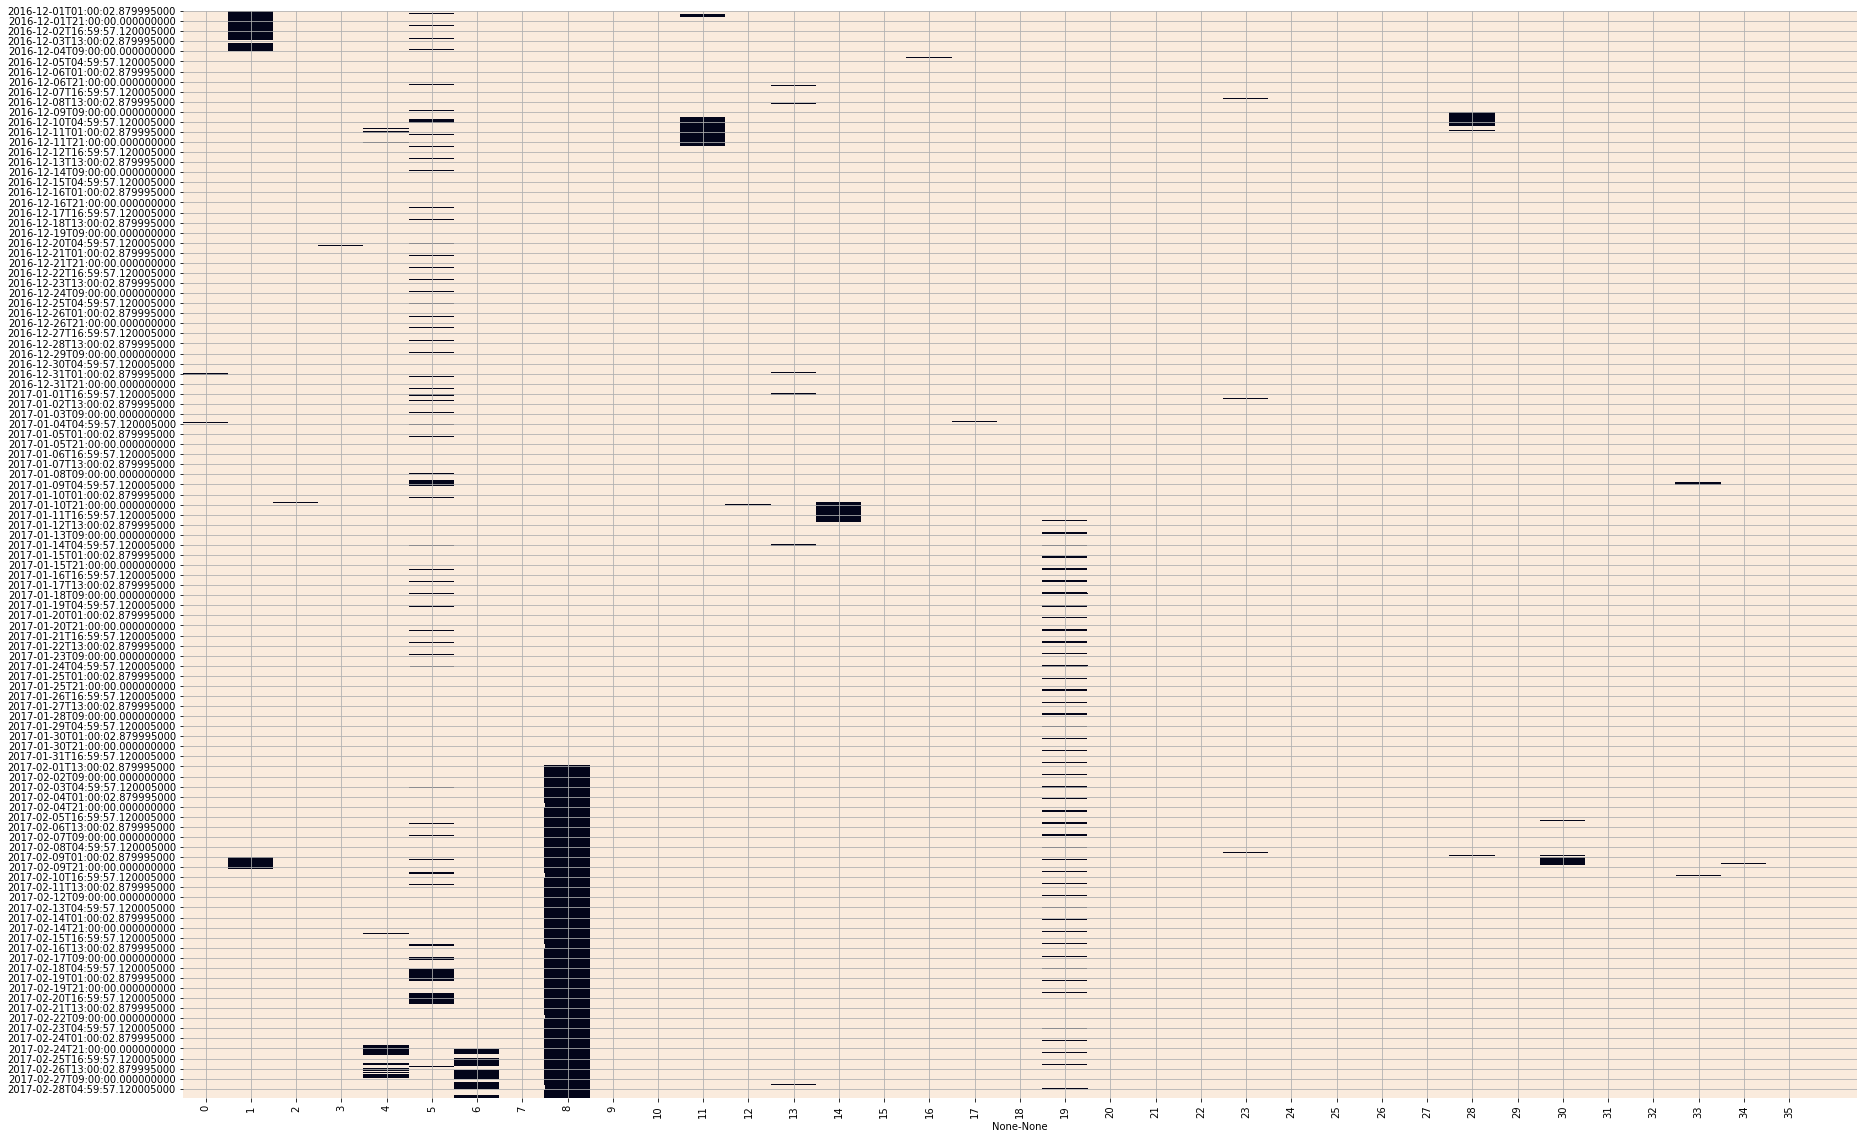

In [8]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

**Summer Data**

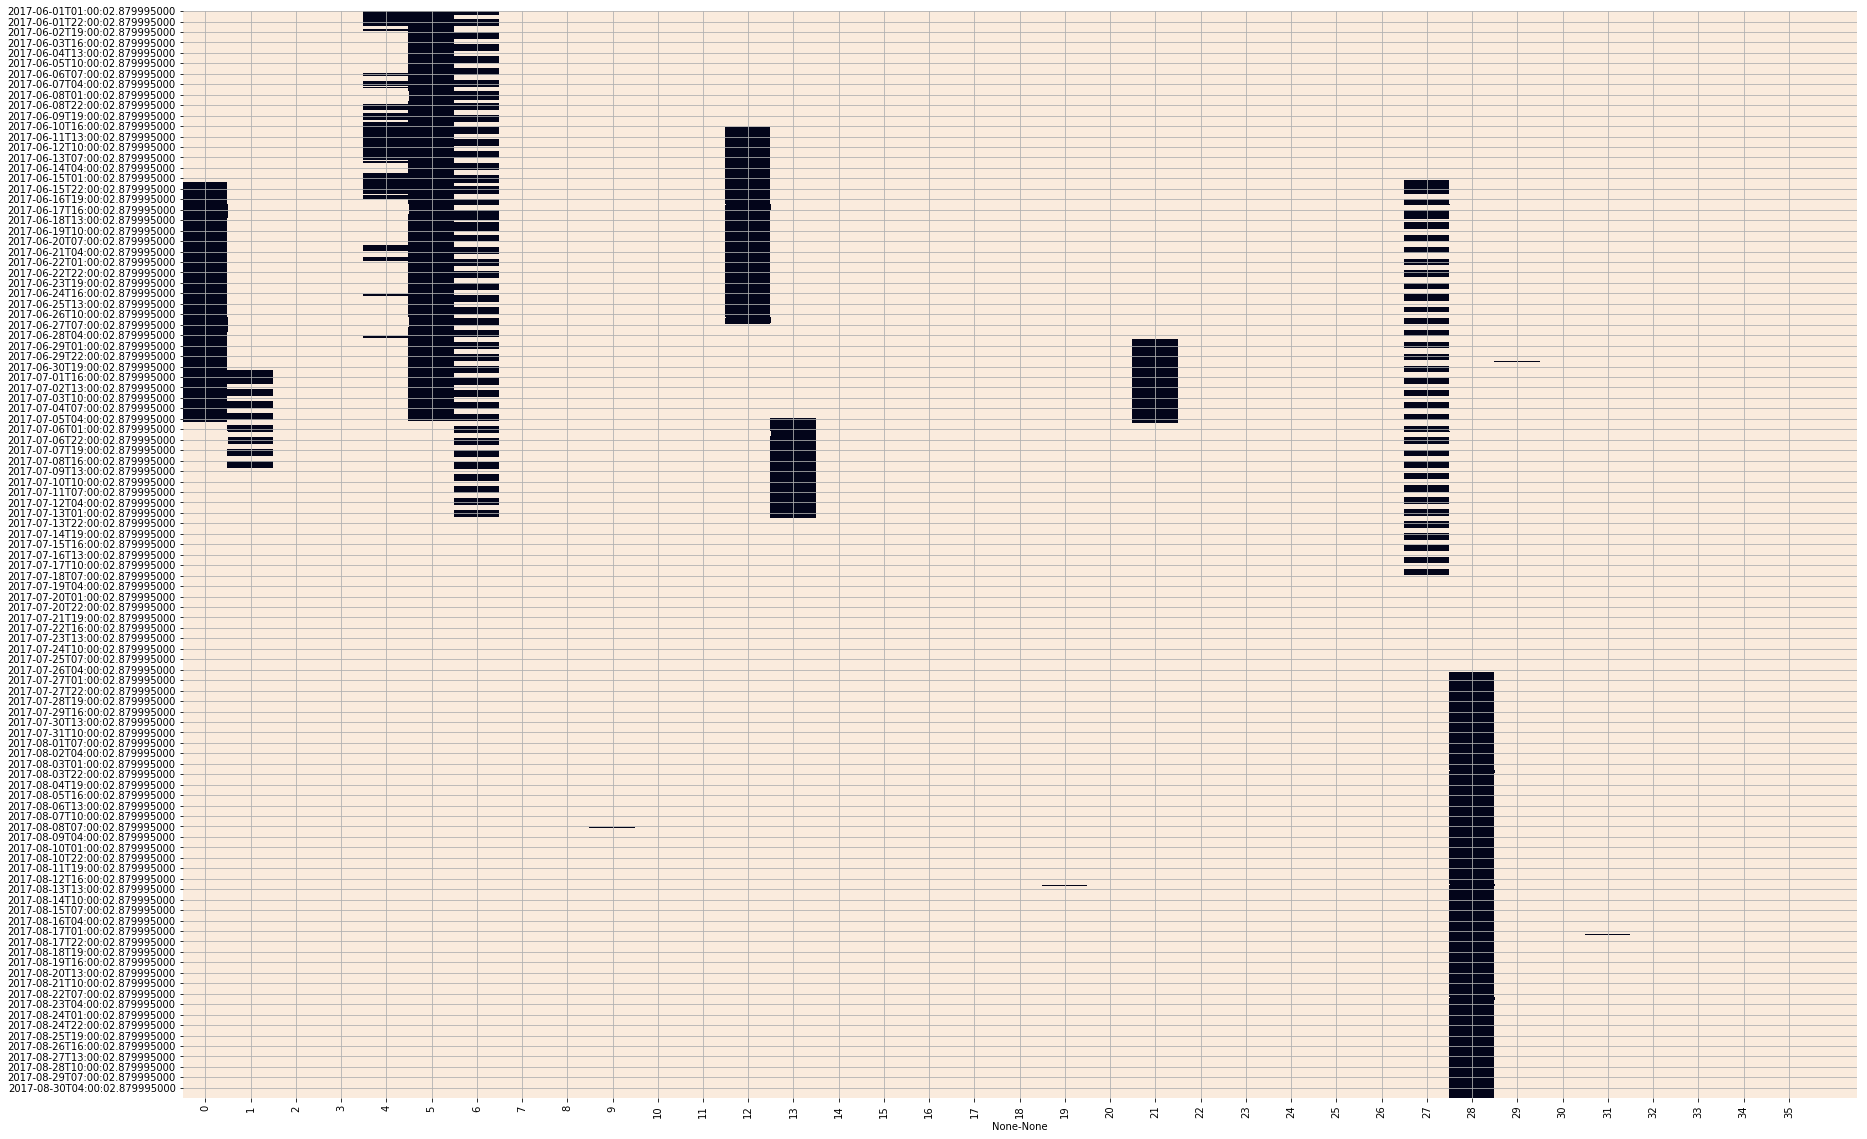

In [9]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Remove the Stations with Lots of Missing Data and Interpolate the Others

In [10]:
winter_removed = [1, 6, 8, 11, 14]
summer_removed = [0, 4, 5, 6, 12, 13, 21, 27, 28]

winter_filt = winter_data.drop(winter_data.columns[winter_removed],axis=1)
summer_filt = summer_data.drop(summer_data.columns[summer_removed],axis=1)

Plot the new missing data.

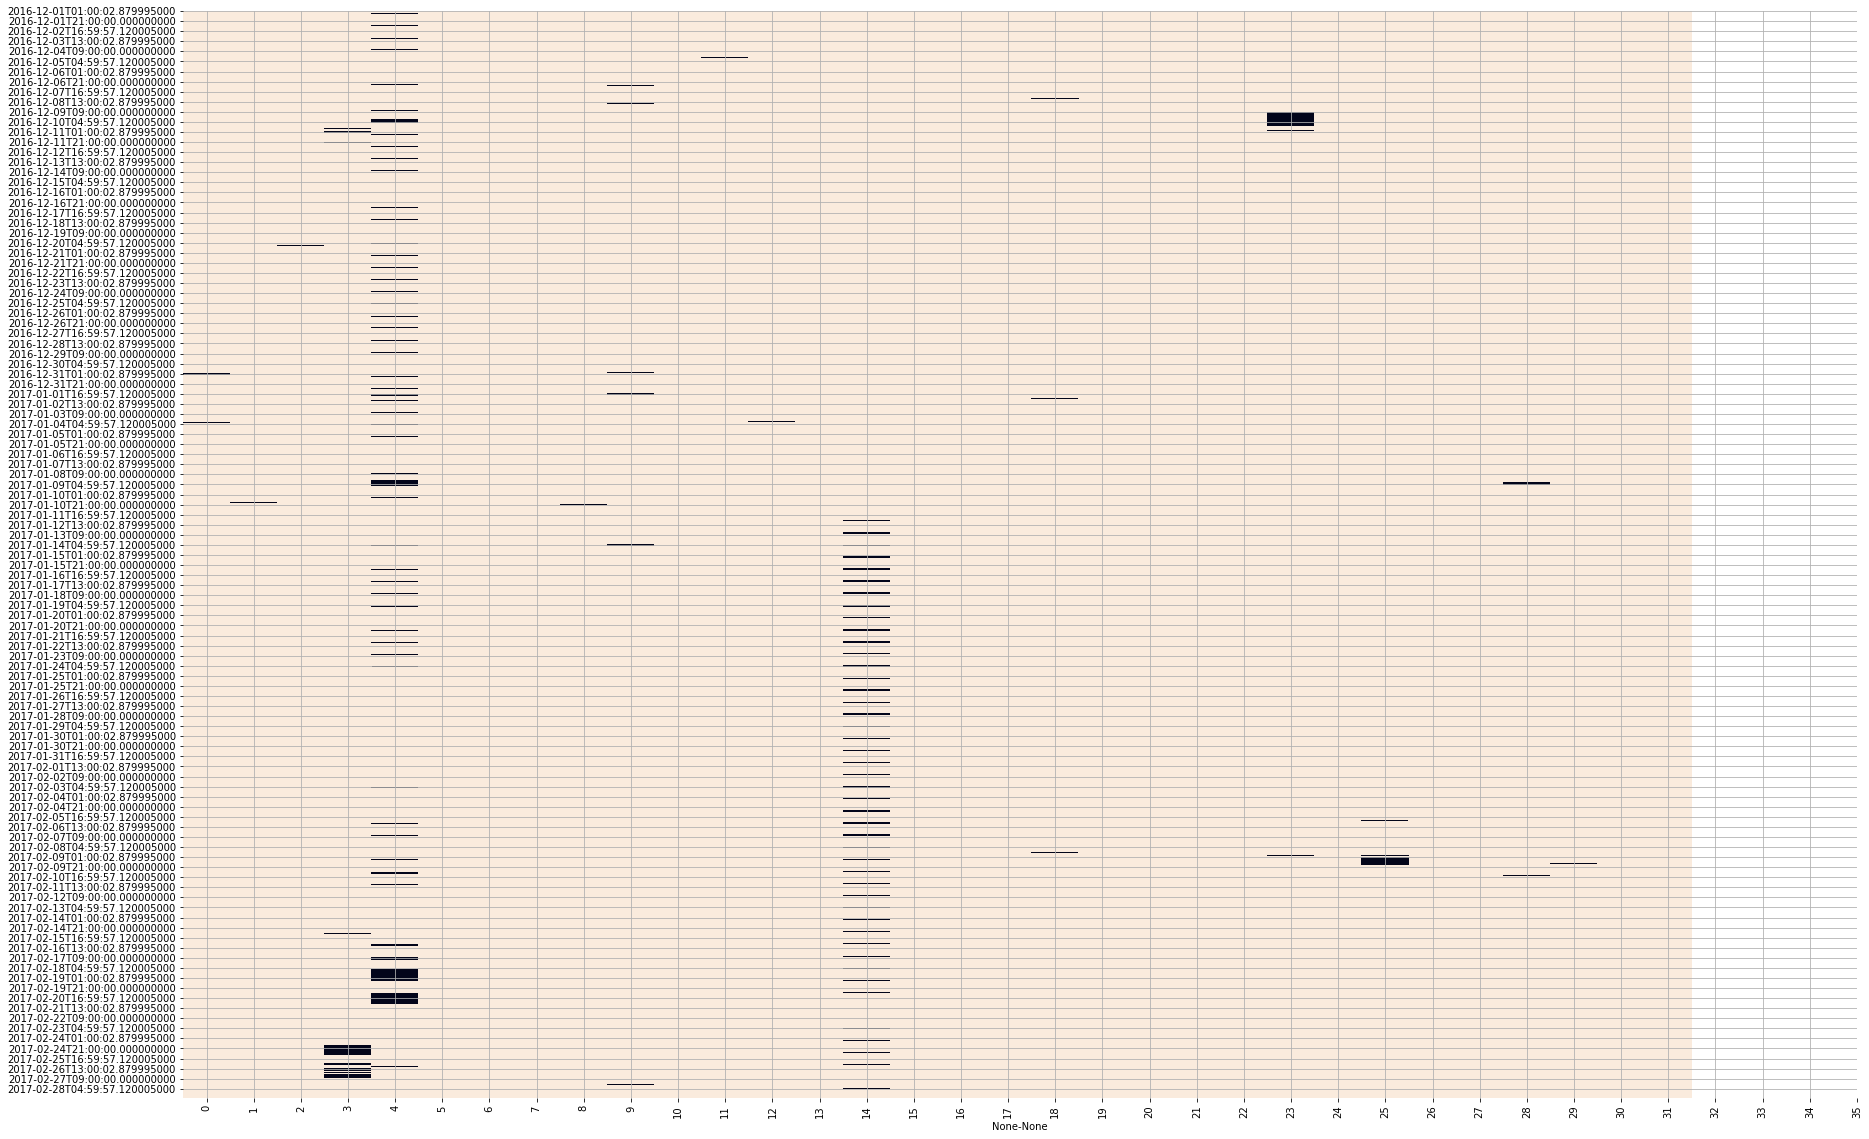

In [11]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

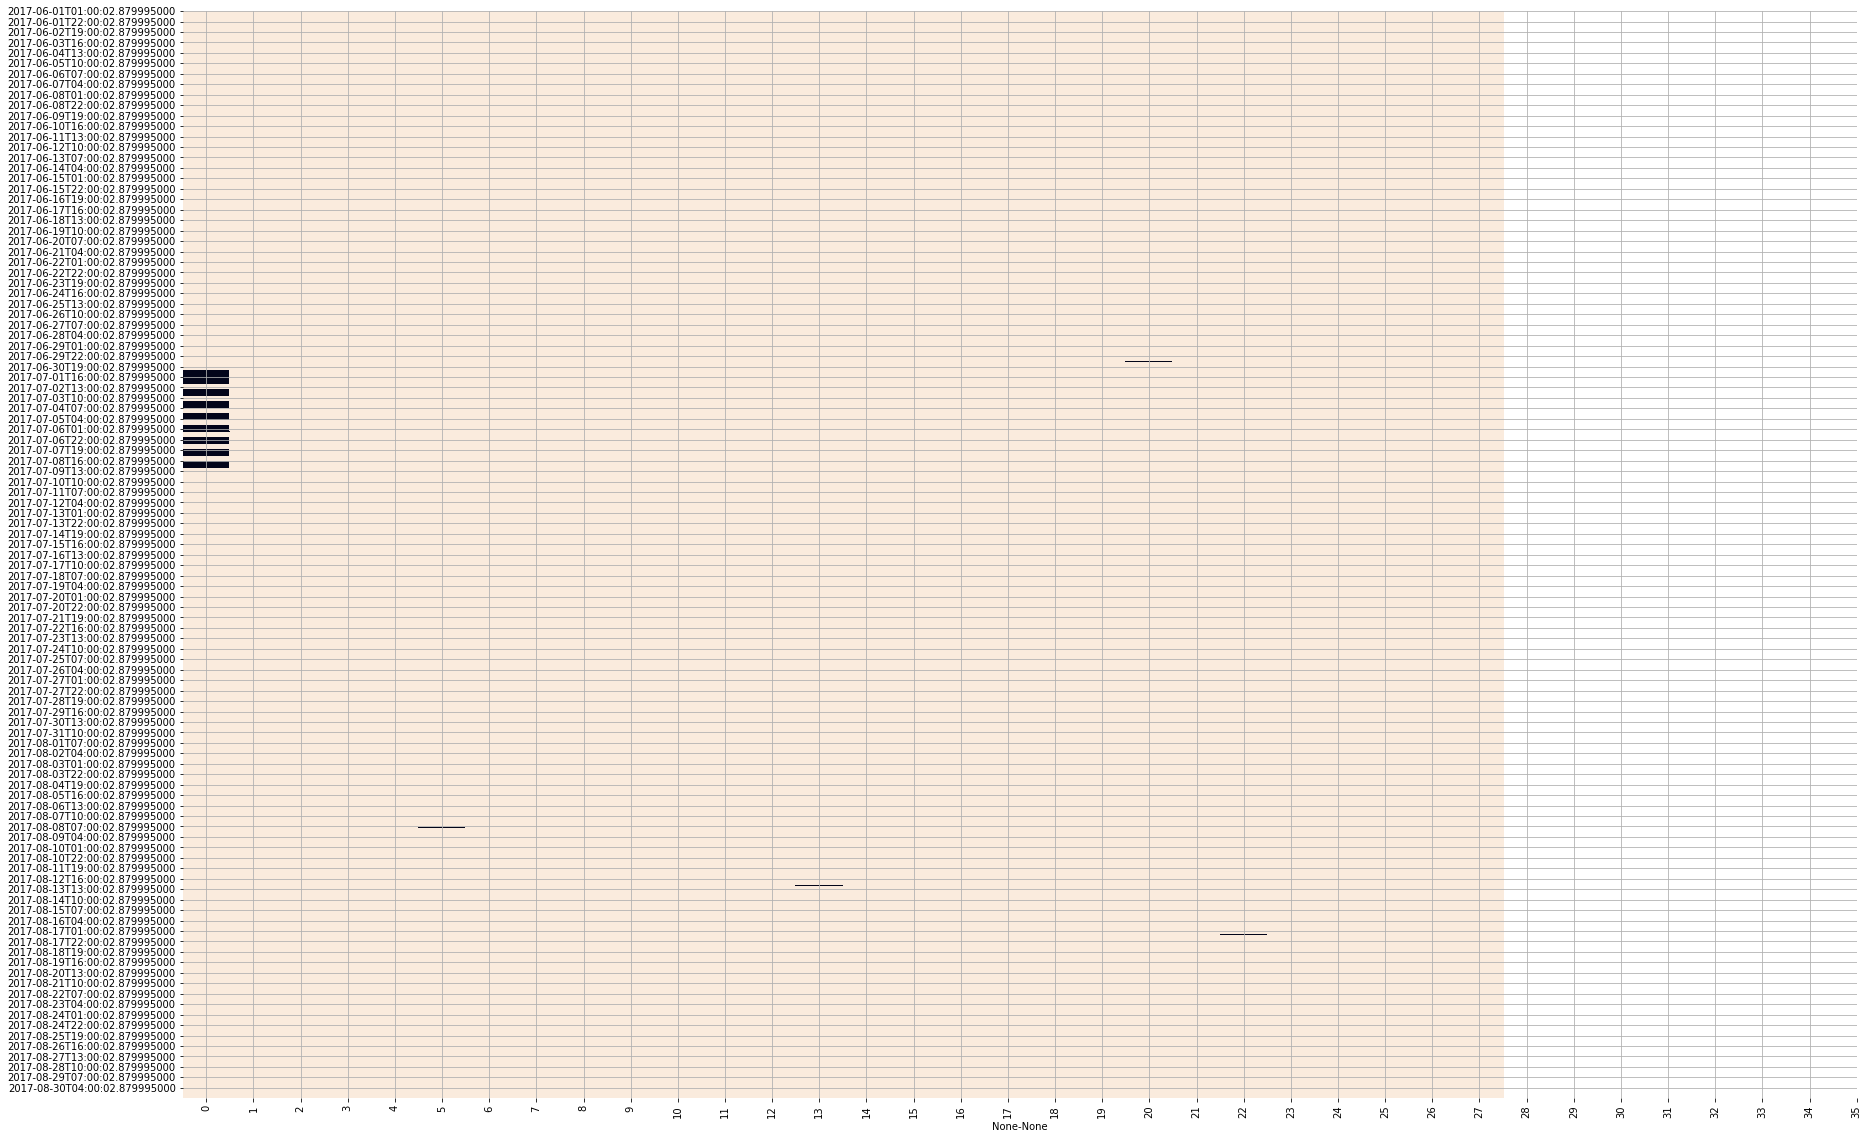

In [12]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Now Interpolate the DataFrames

In [13]:
winter_df = winter_filt.interpolate(method='cubic', axis=0)
summer_df = summer_filt.interpolate(method='cubic', axis=0)

## Save to CSV File

In [14]:
winter_df.to_pickle('Dataframes/winter_2017.pkl')
summer_df.to_pickle('Dataframes/summer_2017.pkl')

# 2015-2016

## Look at Missing Data

### Obtain Winter and Summer Data

In [15]:
winter_start = pd.Timestamp(year=2015, month=12, day=1, hour=0)
winter_end = pd.Timestamp(year=2016, month=3, day=1, hour=0)
summer_start = pd.Timestamp(year=2016, month=6, day=1, hour=0)
summer_end = pd.Timestamp(year=2016, month=9, day=1, hour=0)

winter_data = df[(df.index>winter_start) & (df.index<winter_end)]
summer_data = df[(df.index>summer_start) & (df.index<summer_end)]

**Winter Data**

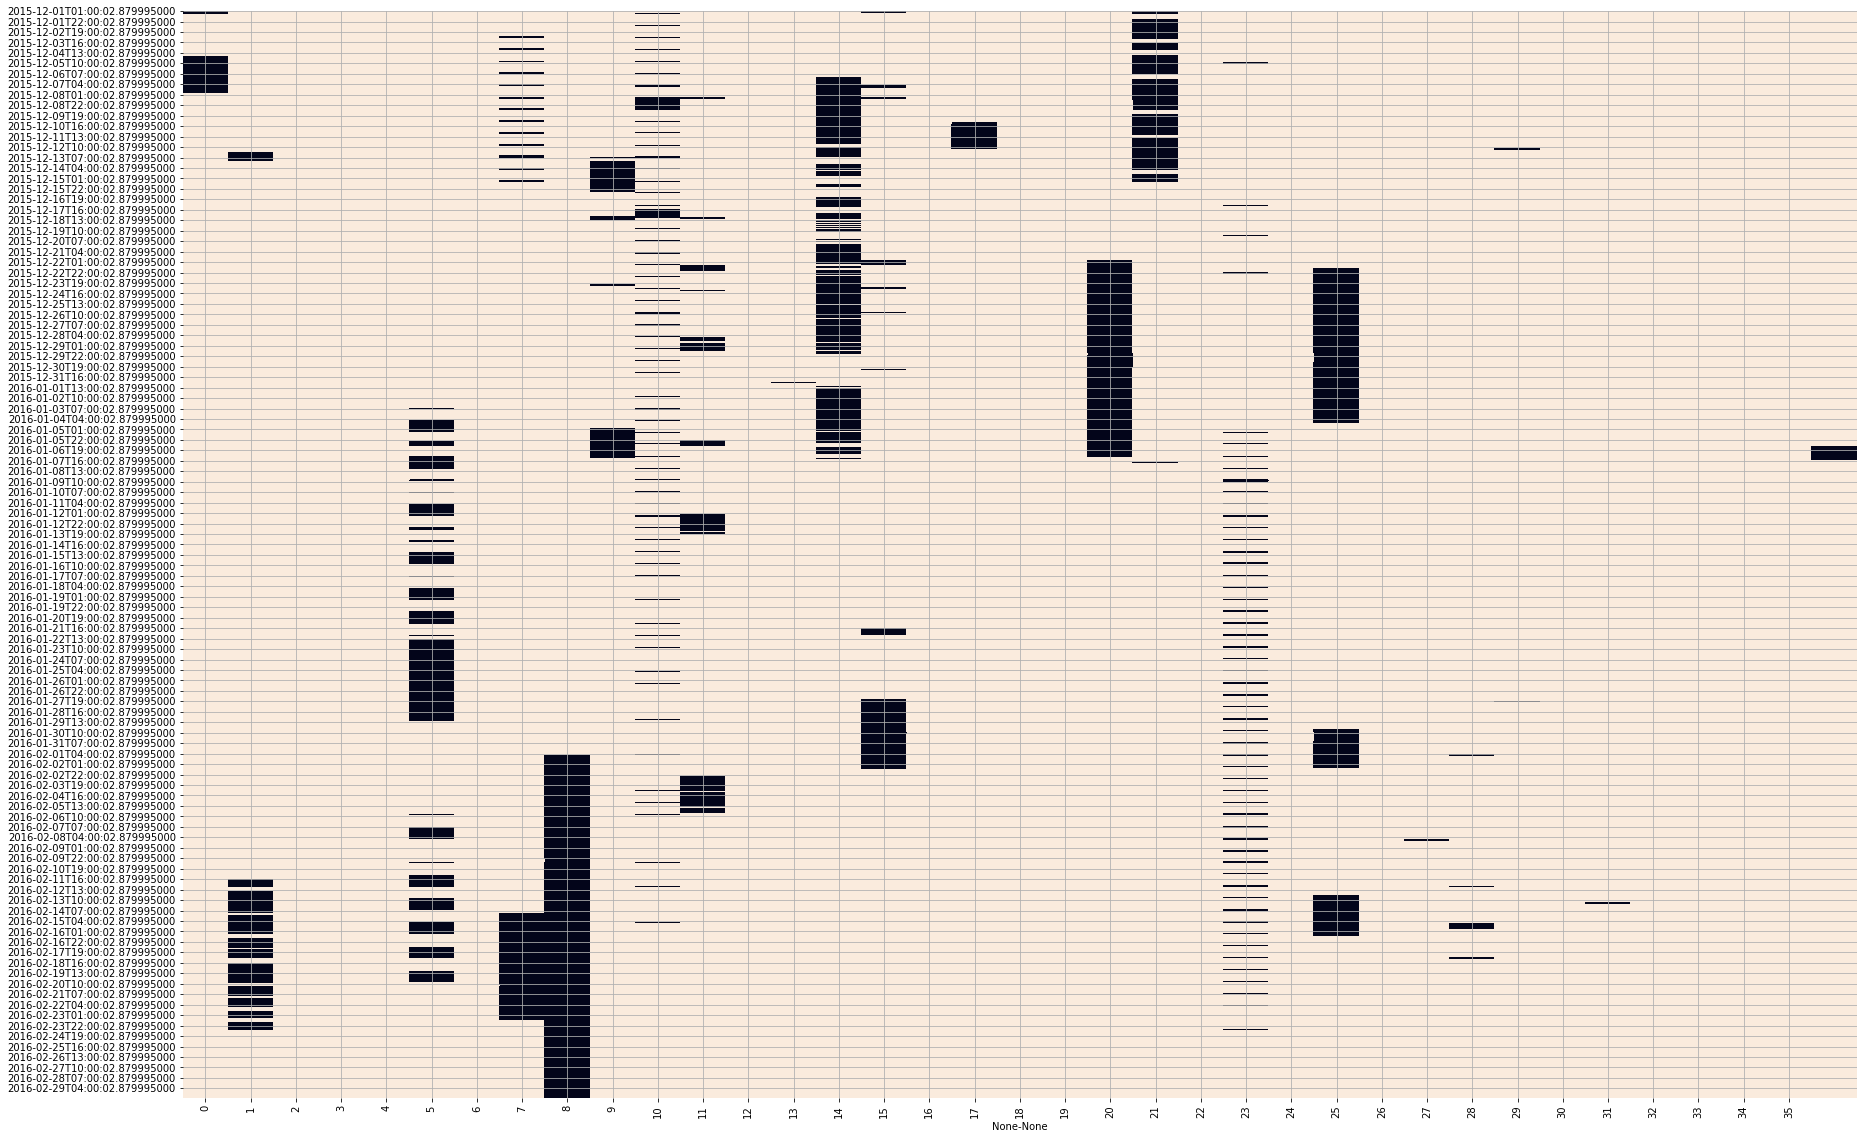

In [16]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

**Summer Data**

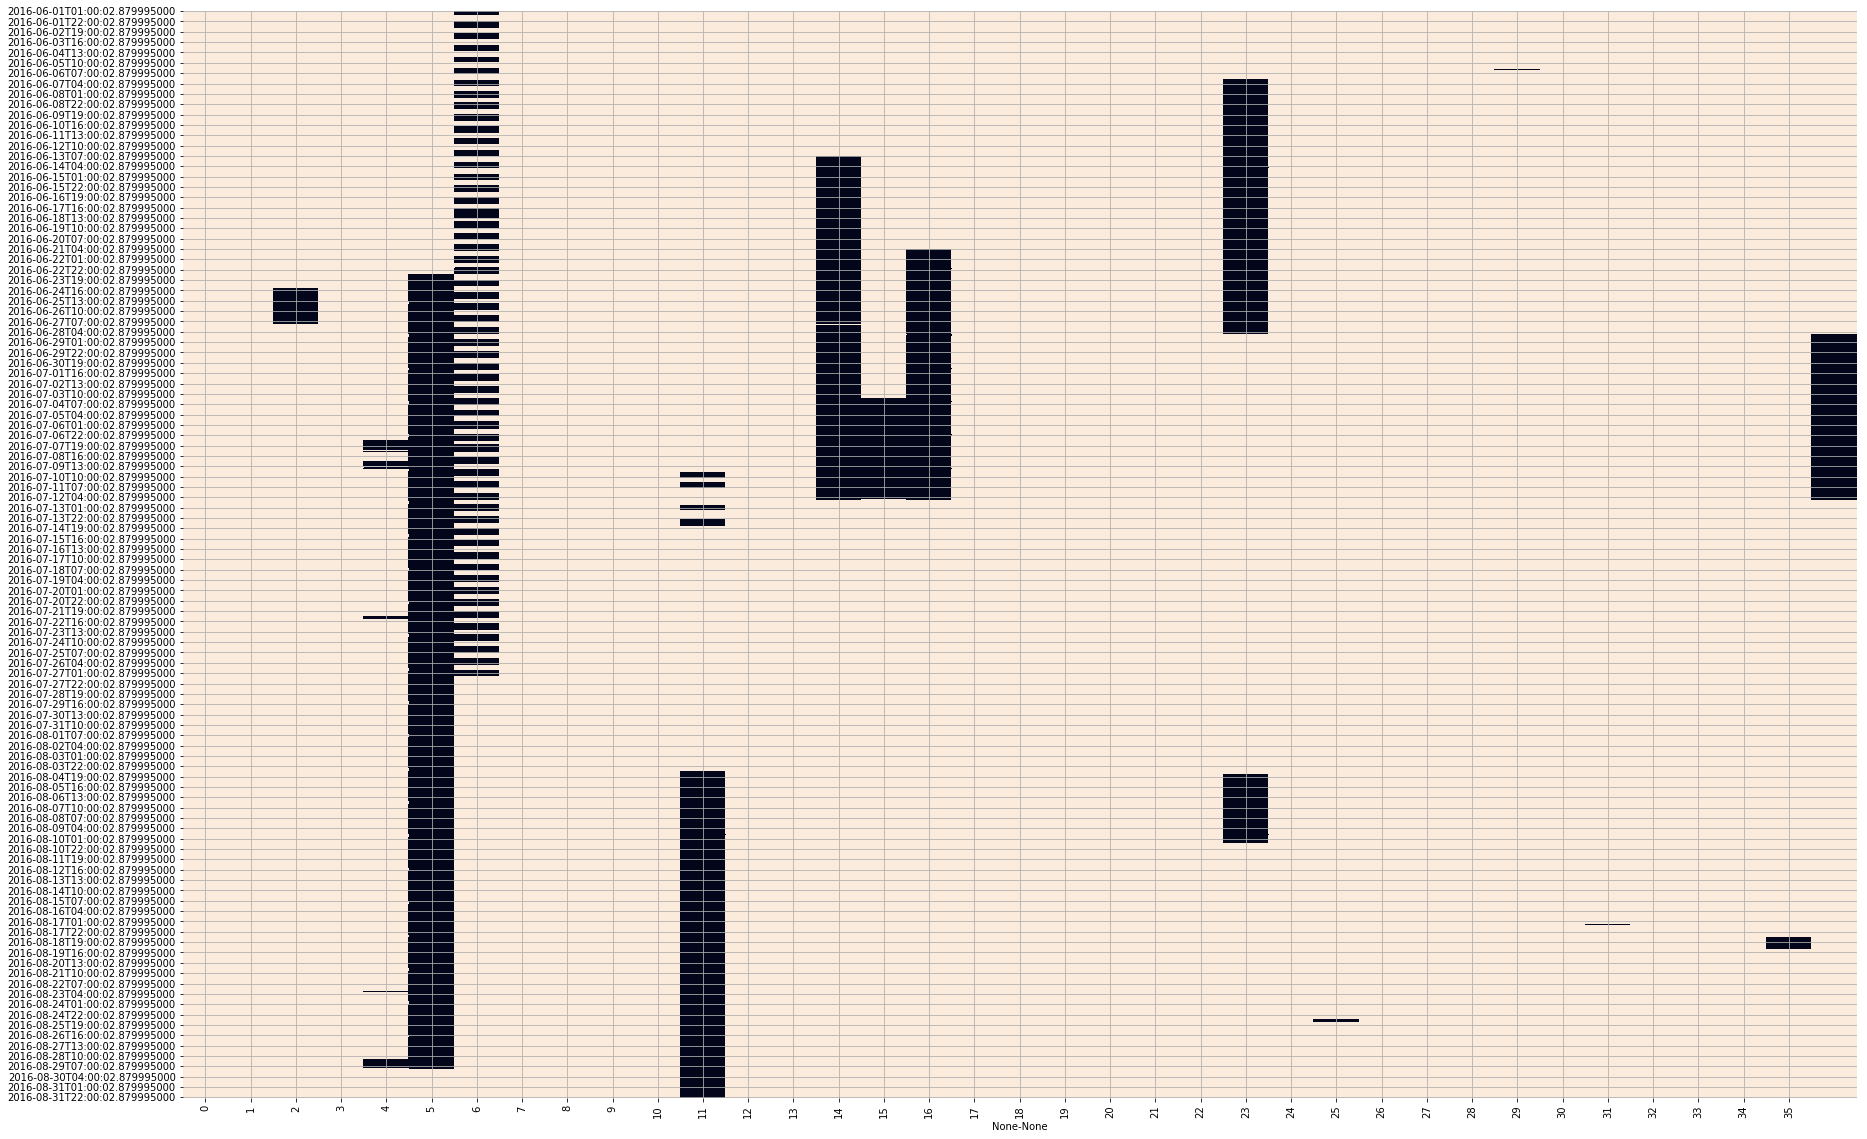

In [17]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Remove the Stations with Lots of Missing Data and Interpolate the Others

In [18]:
winter_removed = [0,1,5,7,8,9,10,11,14,15,17,20,21,23,25,36]
summer_removed = [2,4,5,6,11,14,15,16,23,35,36]

winter_filt = winter_data.drop(winter_data.columns[winter_removed],axis=1)
summer_filt = summer_data.drop(summer_data.columns[summer_removed],axis=1)

Plot the new missing data.

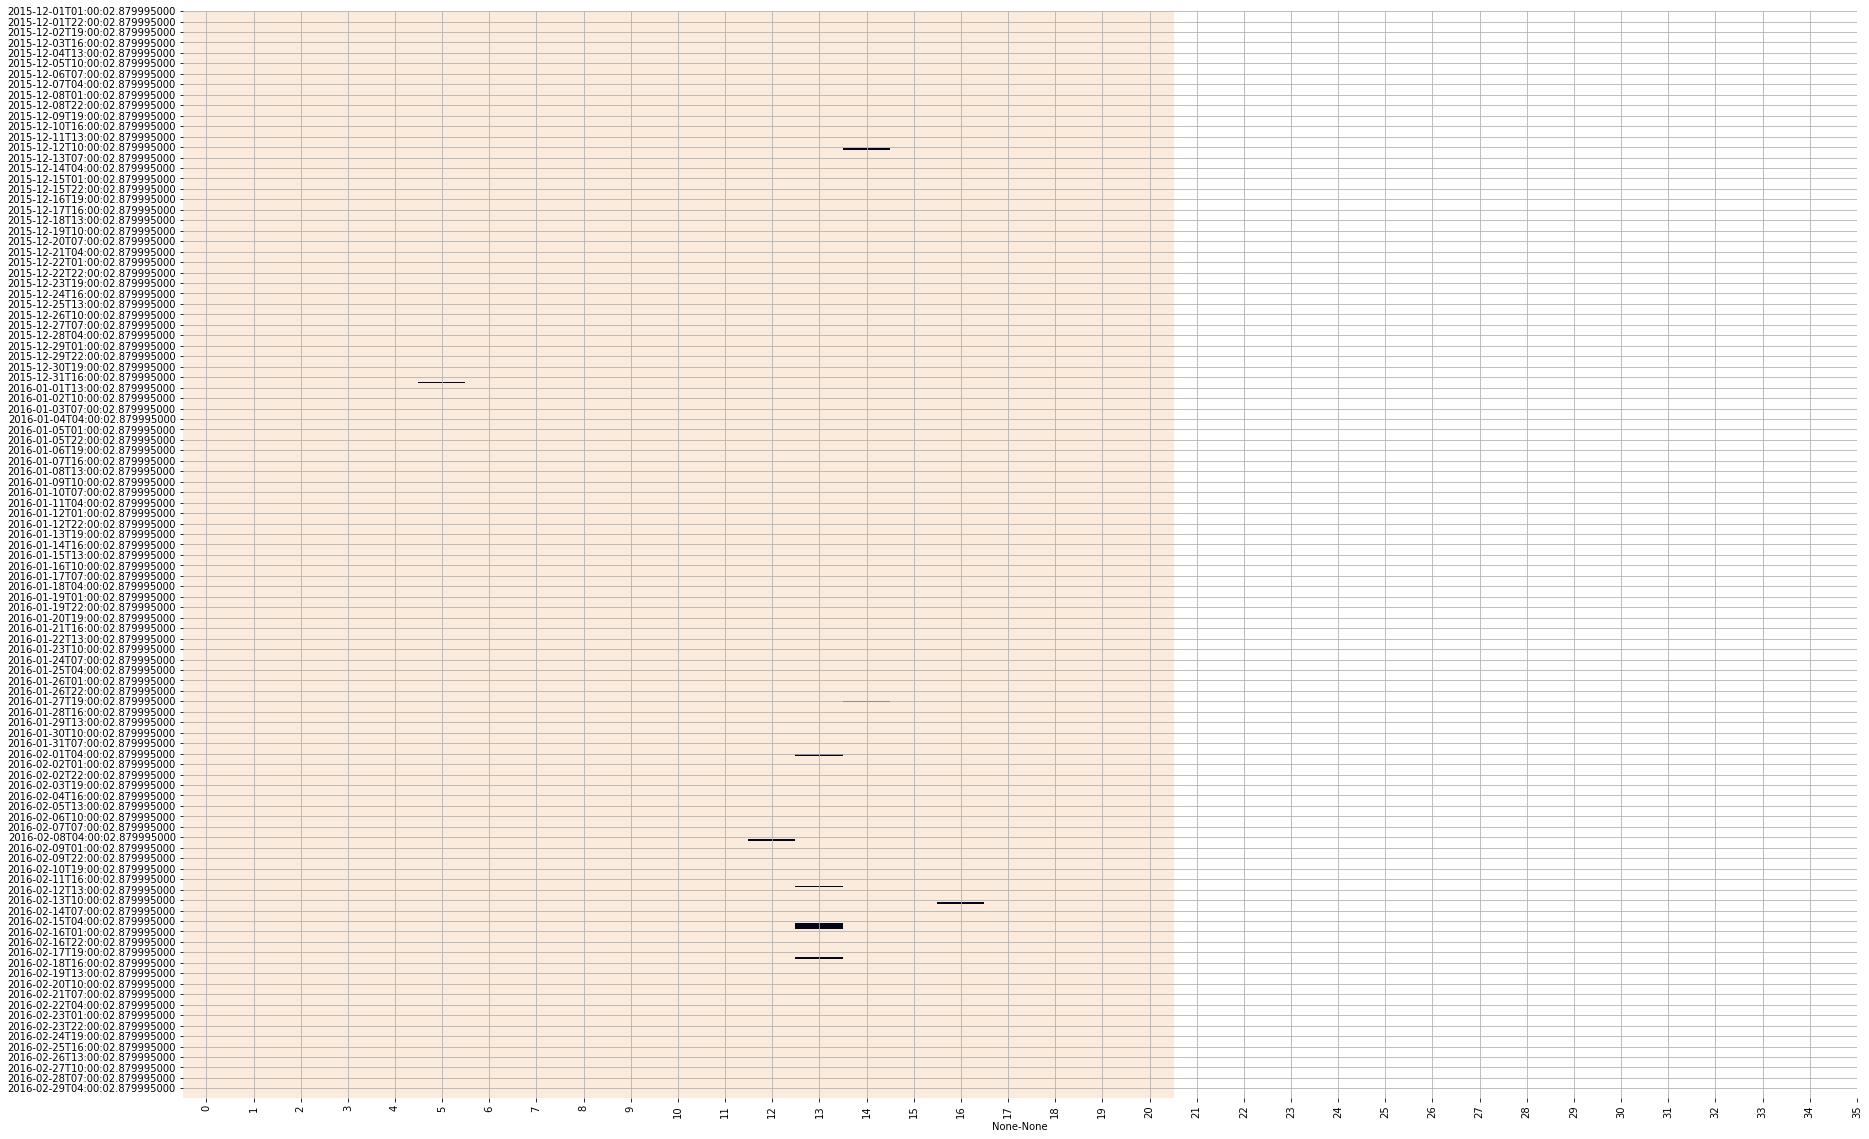

In [19]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

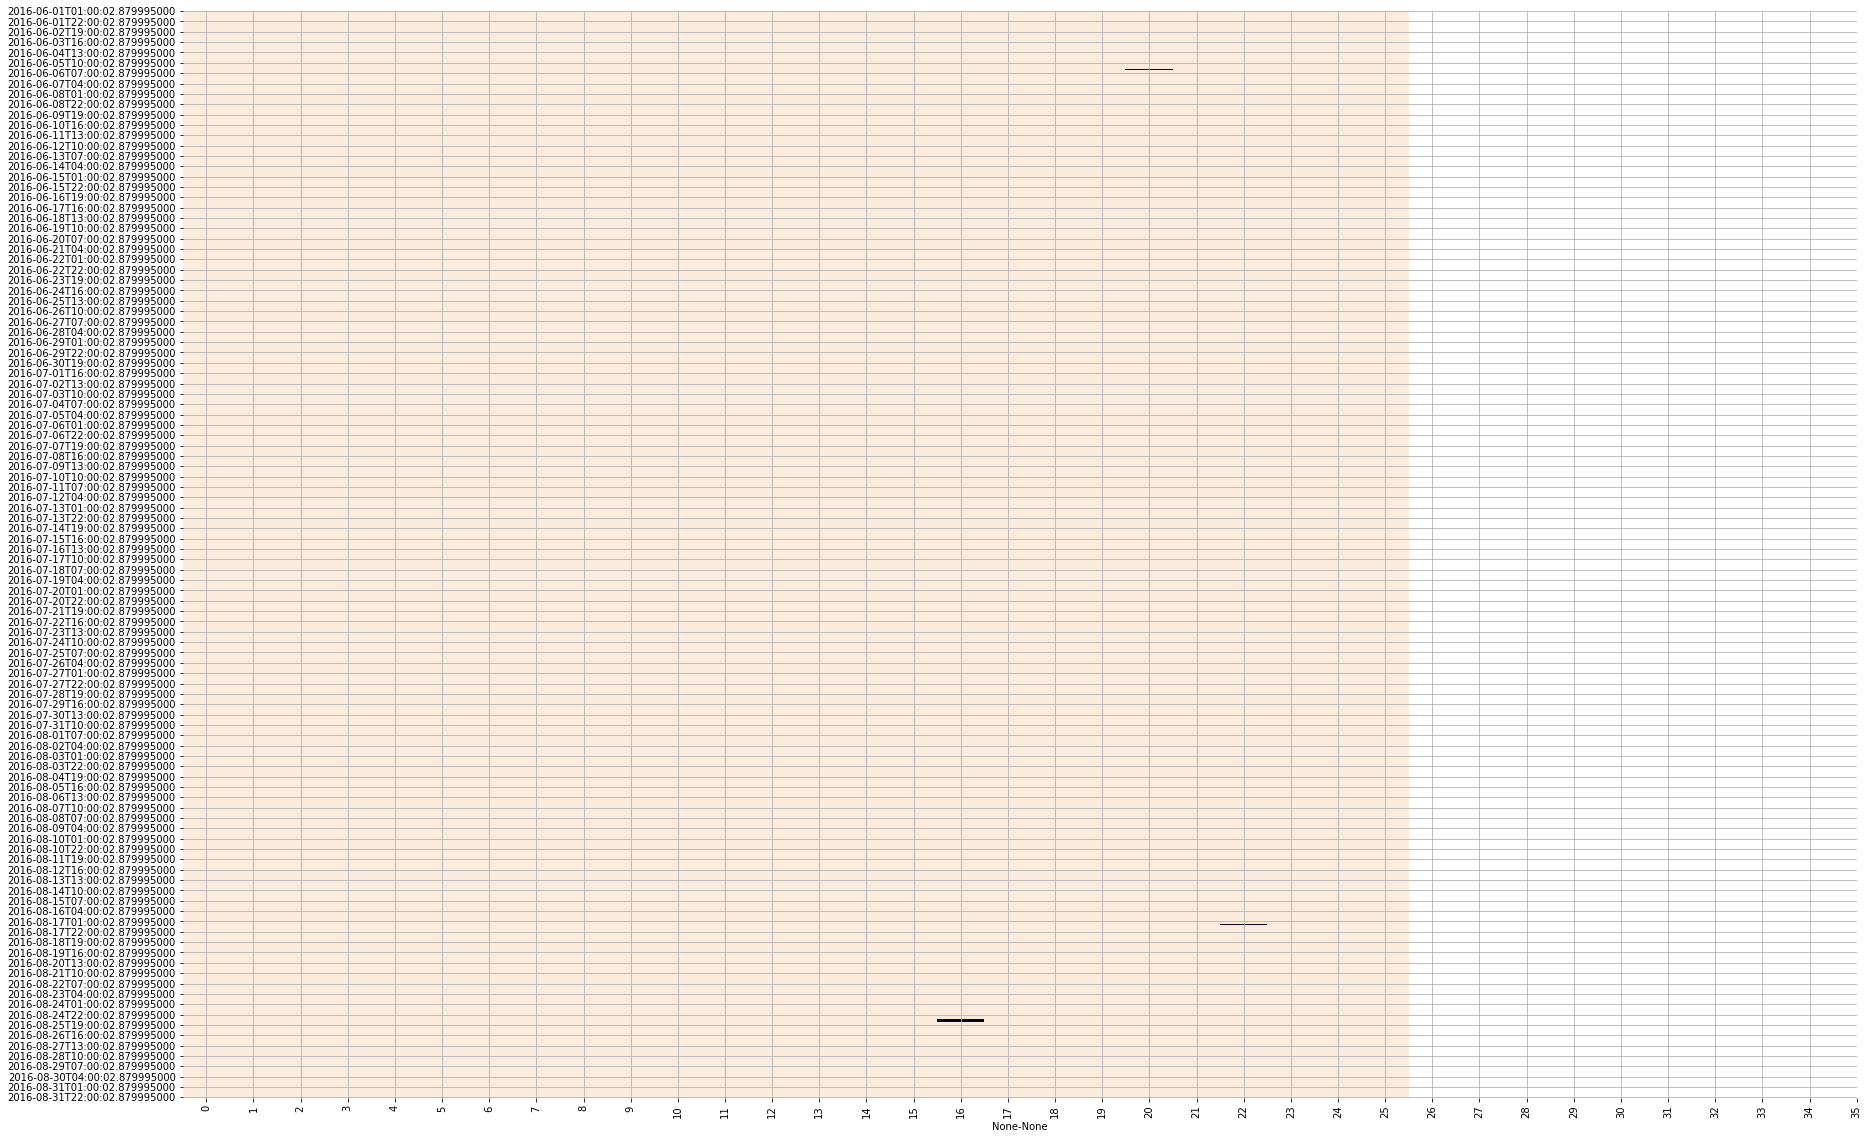

In [20]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Now Interpolate the DataFrames

In [21]:
winter_df = winter_filt.interpolate(method='cubic', axis=0)
summer_df = summer_filt.interpolate(method='cubic', axis=0)

## Save to CSV File

In [22]:
winter_df.to_pickle('Dataframes/winter_2016.pkl')
summer_df.to_pickle('Dataframes/summer_2016.pkl')

# 2014-2015

## Look at Missing Data

### Obtain Winter and Summer Data

In [16]:
winter_start = pd.Timestamp(year=2014, month=12, day=1, hour=0)
winter_end = pd.Timestamp(year=2015, month=3, day=1, hour=0)
summer_start = pd.Timestamp(year=2015, month=6, day=1, hour=0)
summer_end = pd.Timestamp(year=2015, month=9, day=1, hour=0)

winter_data = df[(df.index>winter_start) & (df.index<winter_end)]
summer_data = df[(df.index>summer_start) & (df.index<summer_end)]

**Winter Data**

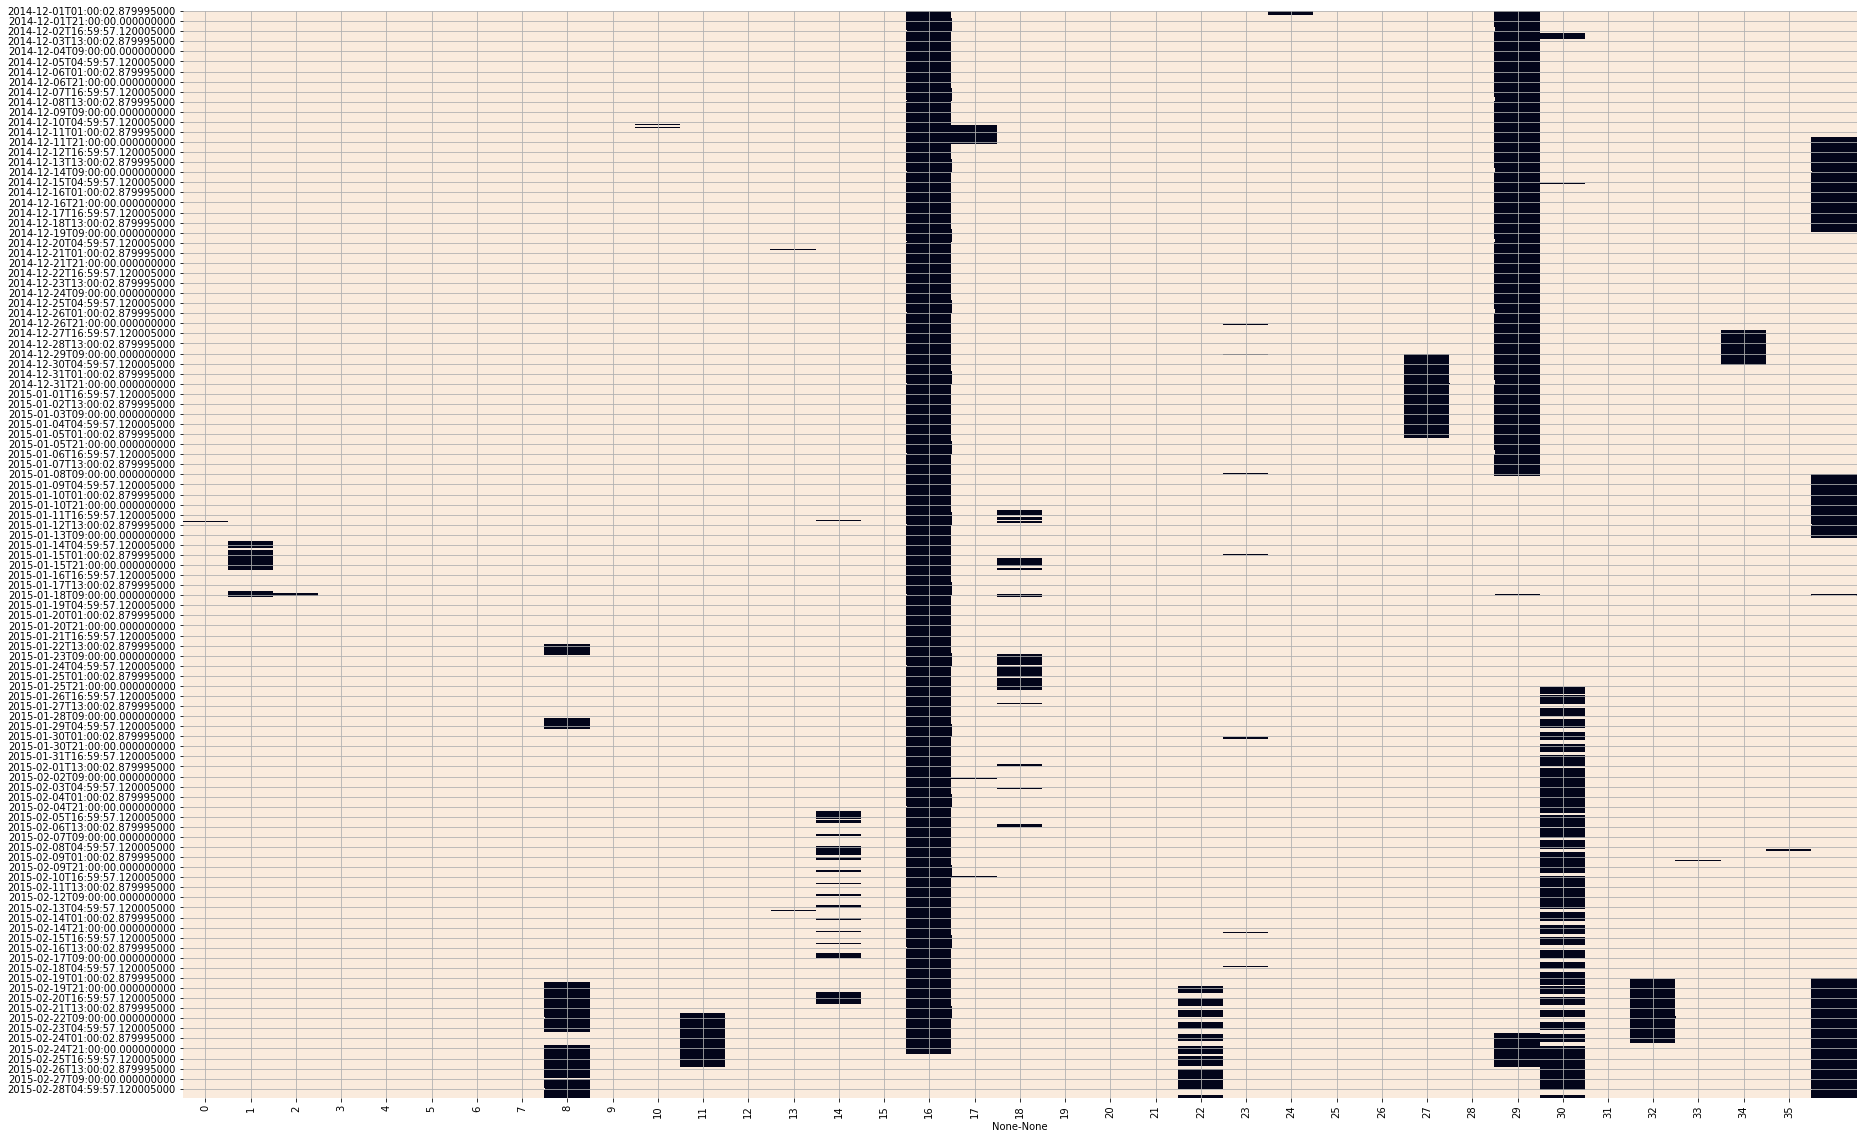

In [17]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

**Summer Data**

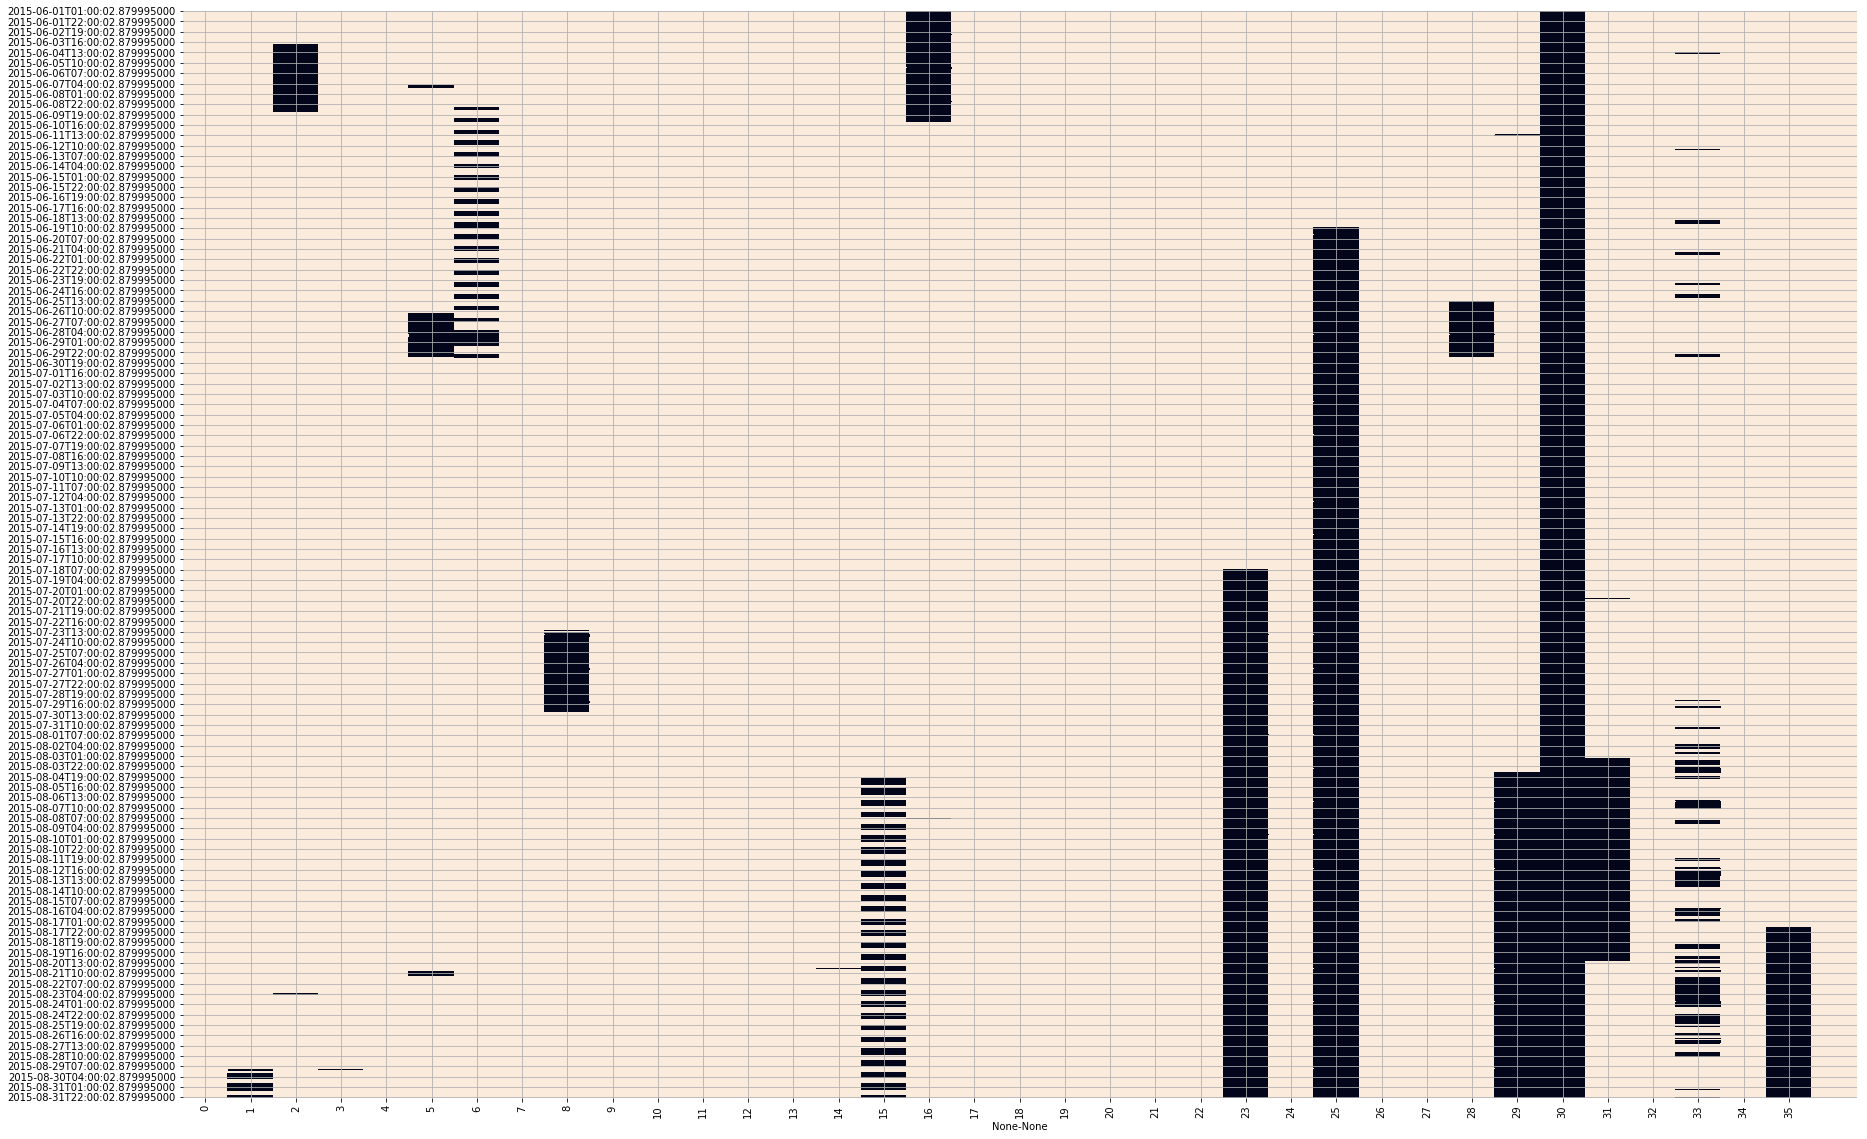

In [18]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Remove the Stations with Lots of Missing Data and Interpolate the Others

In [19]:
winter_removed = [1,8,11,14,16,17,18,22,24,27,29,30,32,34,36]
summer_removed = [1,2,5,6,8,15,16,23,25,28,29,30,31,33,35]

winter_filt = winter_data.drop(winter_data.columns[winter_removed],axis=1)
summer_filt = summer_data.drop(summer_data.columns[summer_removed],axis=1)

Plot the new missing data.

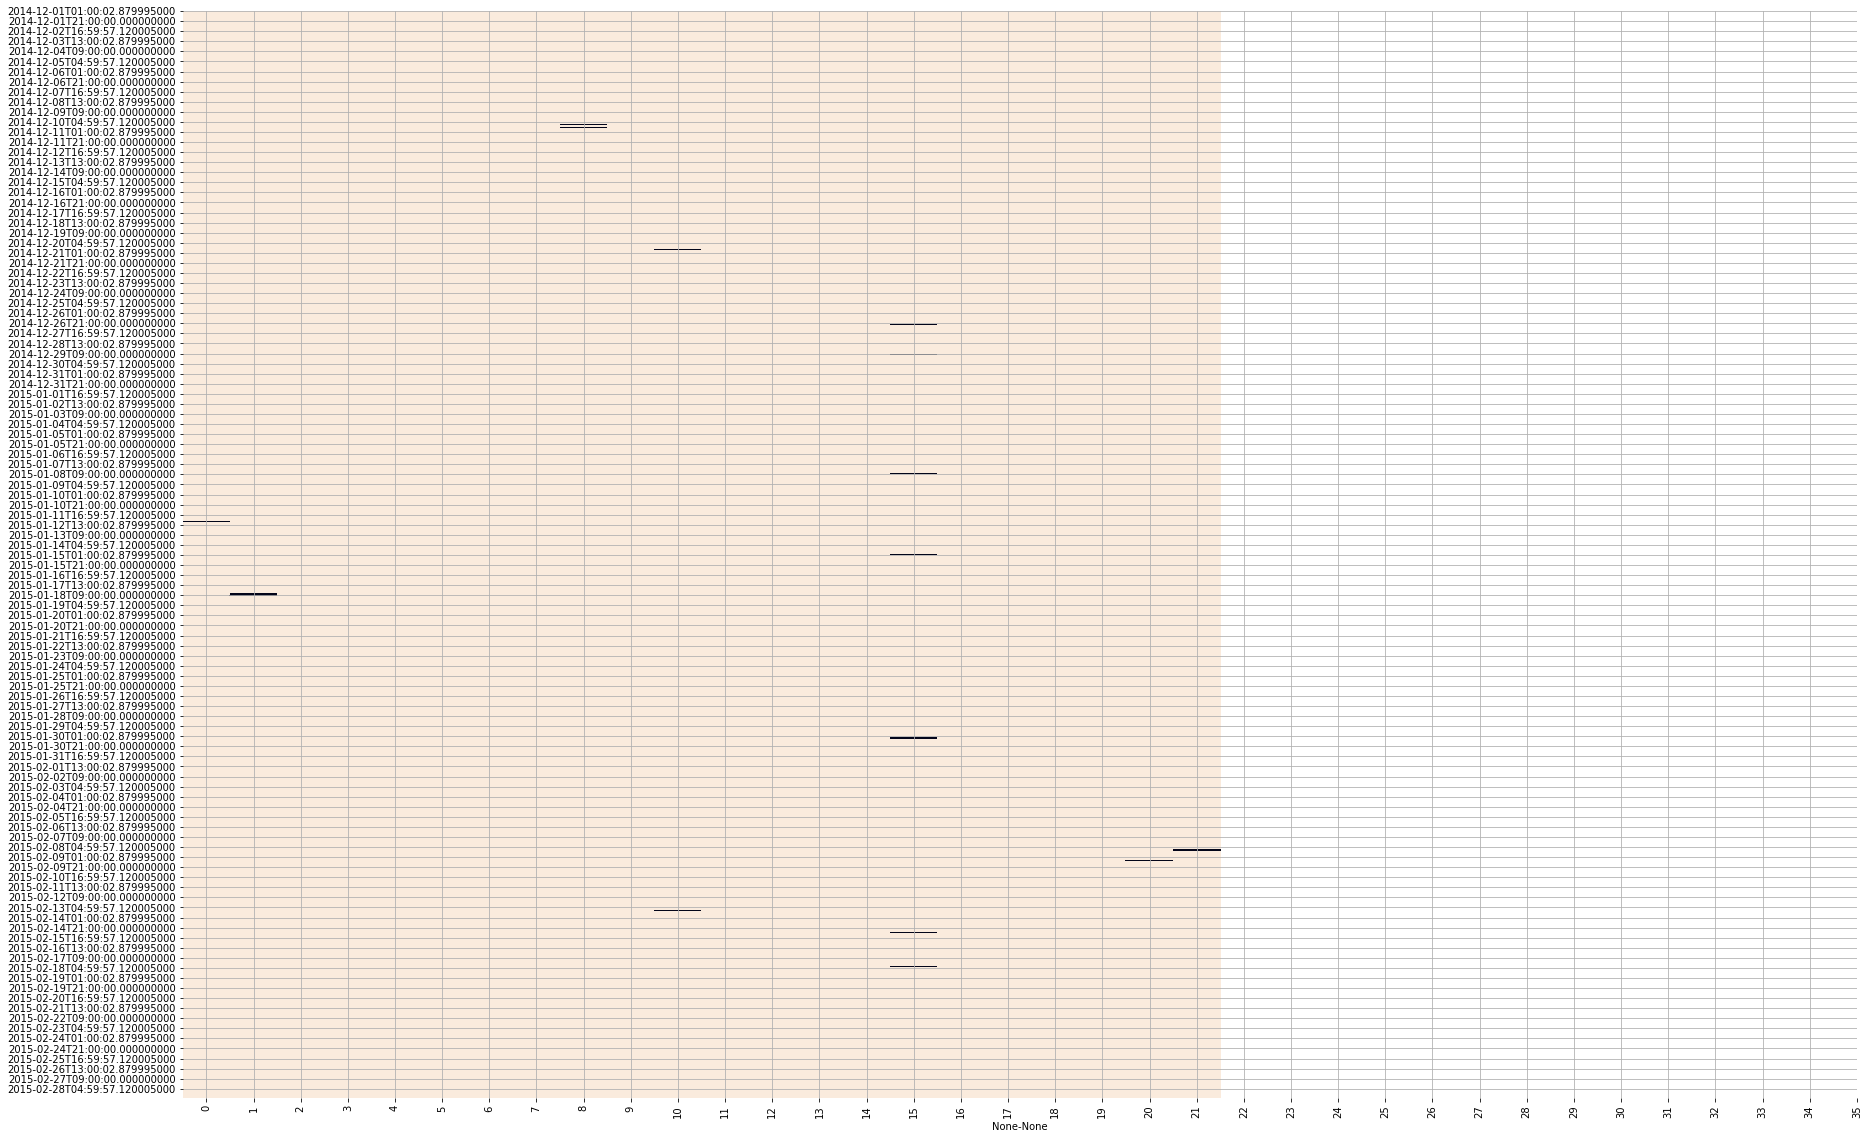

In [20]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

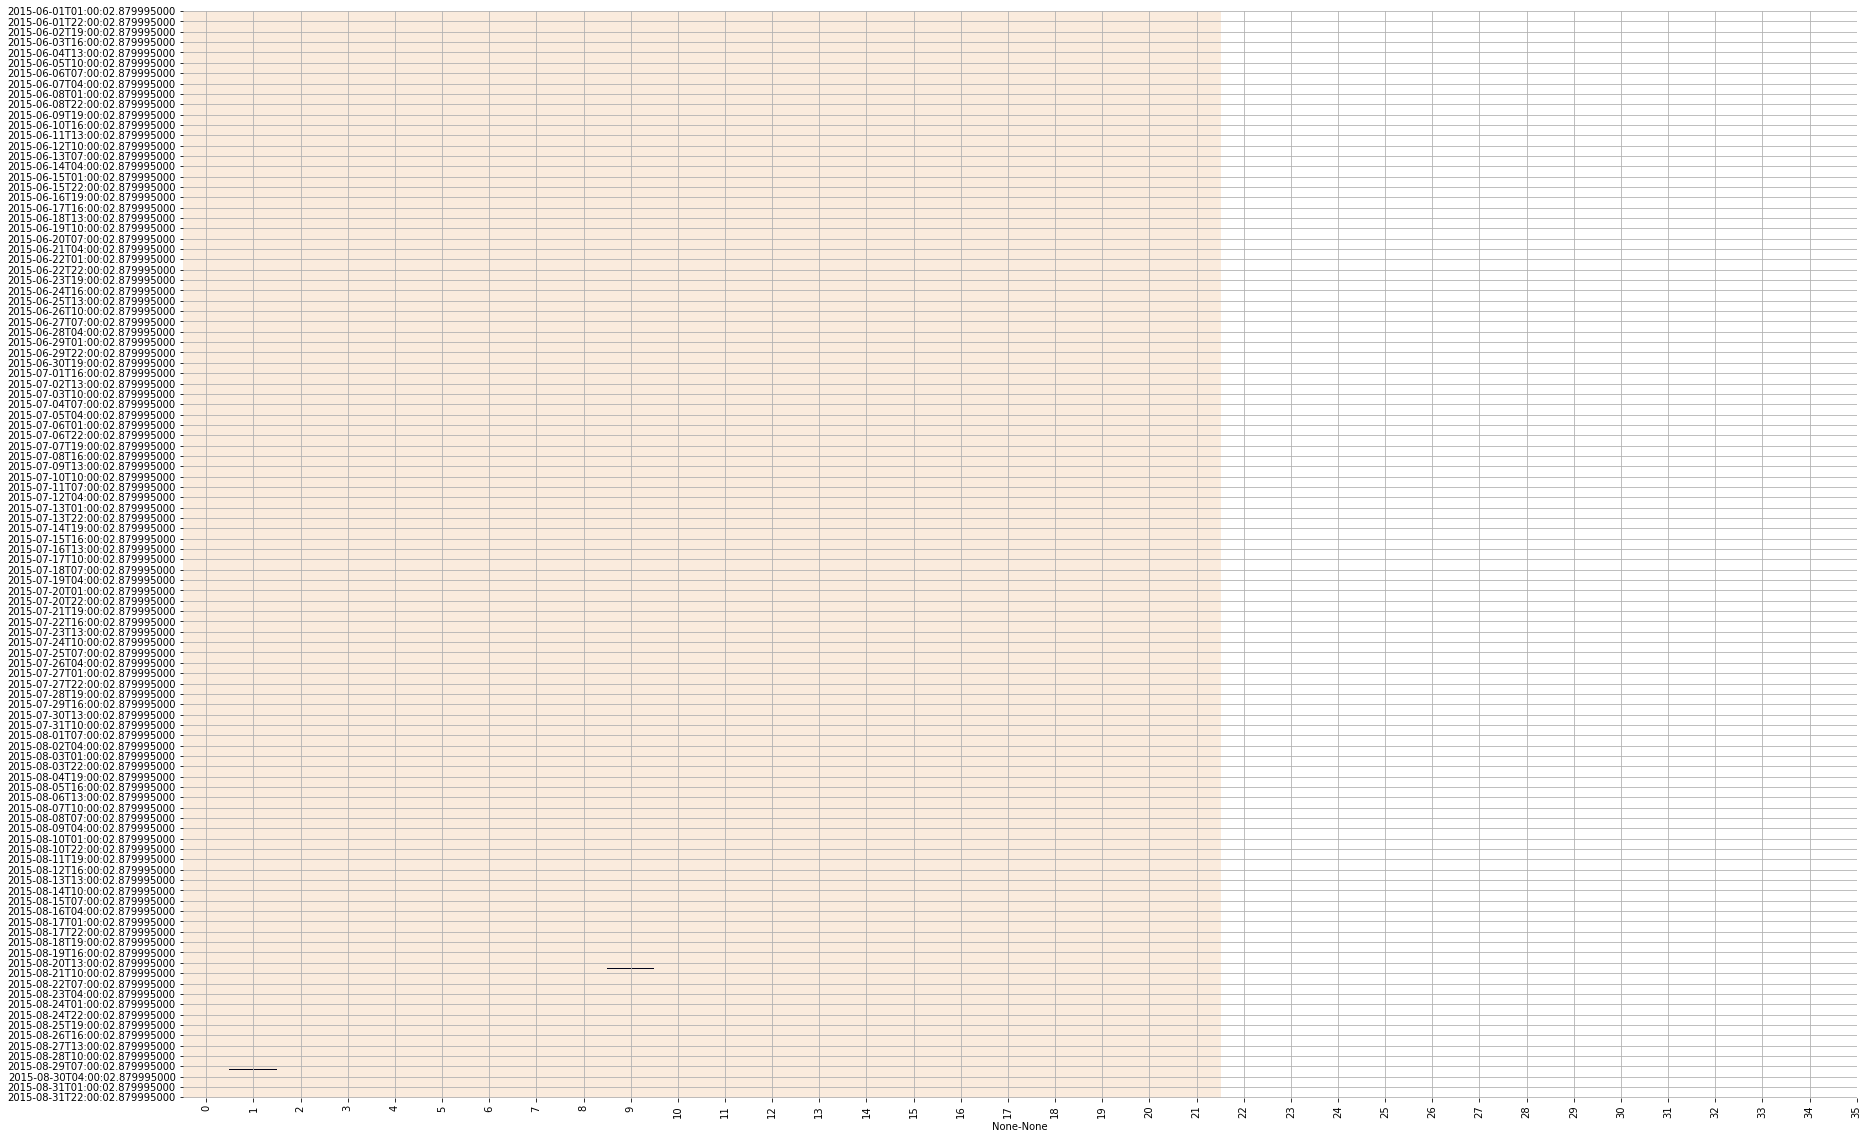

In [21]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Now Interpolate the DataFrames

In [22]:
winter_df = winter_filt.interpolate(method='cubic', axis=0)
summer_df = summer_filt.interpolate(method='cubic', axis=0)

## Save to CSV File

In [24]:
winter_df.to_pickle('Dataframes/winter_2015.pkl')
summer_df.to_pickle('Dataframes/summer_2015.pkl')

# 2013-2014

## Look at Missing Data

### Obtain Winter and Summer Data

In [31]:
winter_start = pd.Timestamp(year=2013, month=12, day=1, hour=0)
winter_end = pd.Timestamp(year=2014, month=3, day=1, hour=0)
summer_start = pd.Timestamp(year=2014, month=6, day=1, hour=0)
summer_end = pd.Timestamp(year=2014, month=9, day=1, hour=0)

winter_data = df[(df.index>winter_start) & (df.index<winter_end)]
summer_data = df[(df.index>summer_start) & (df.index<summer_end)]

**Winter Data**

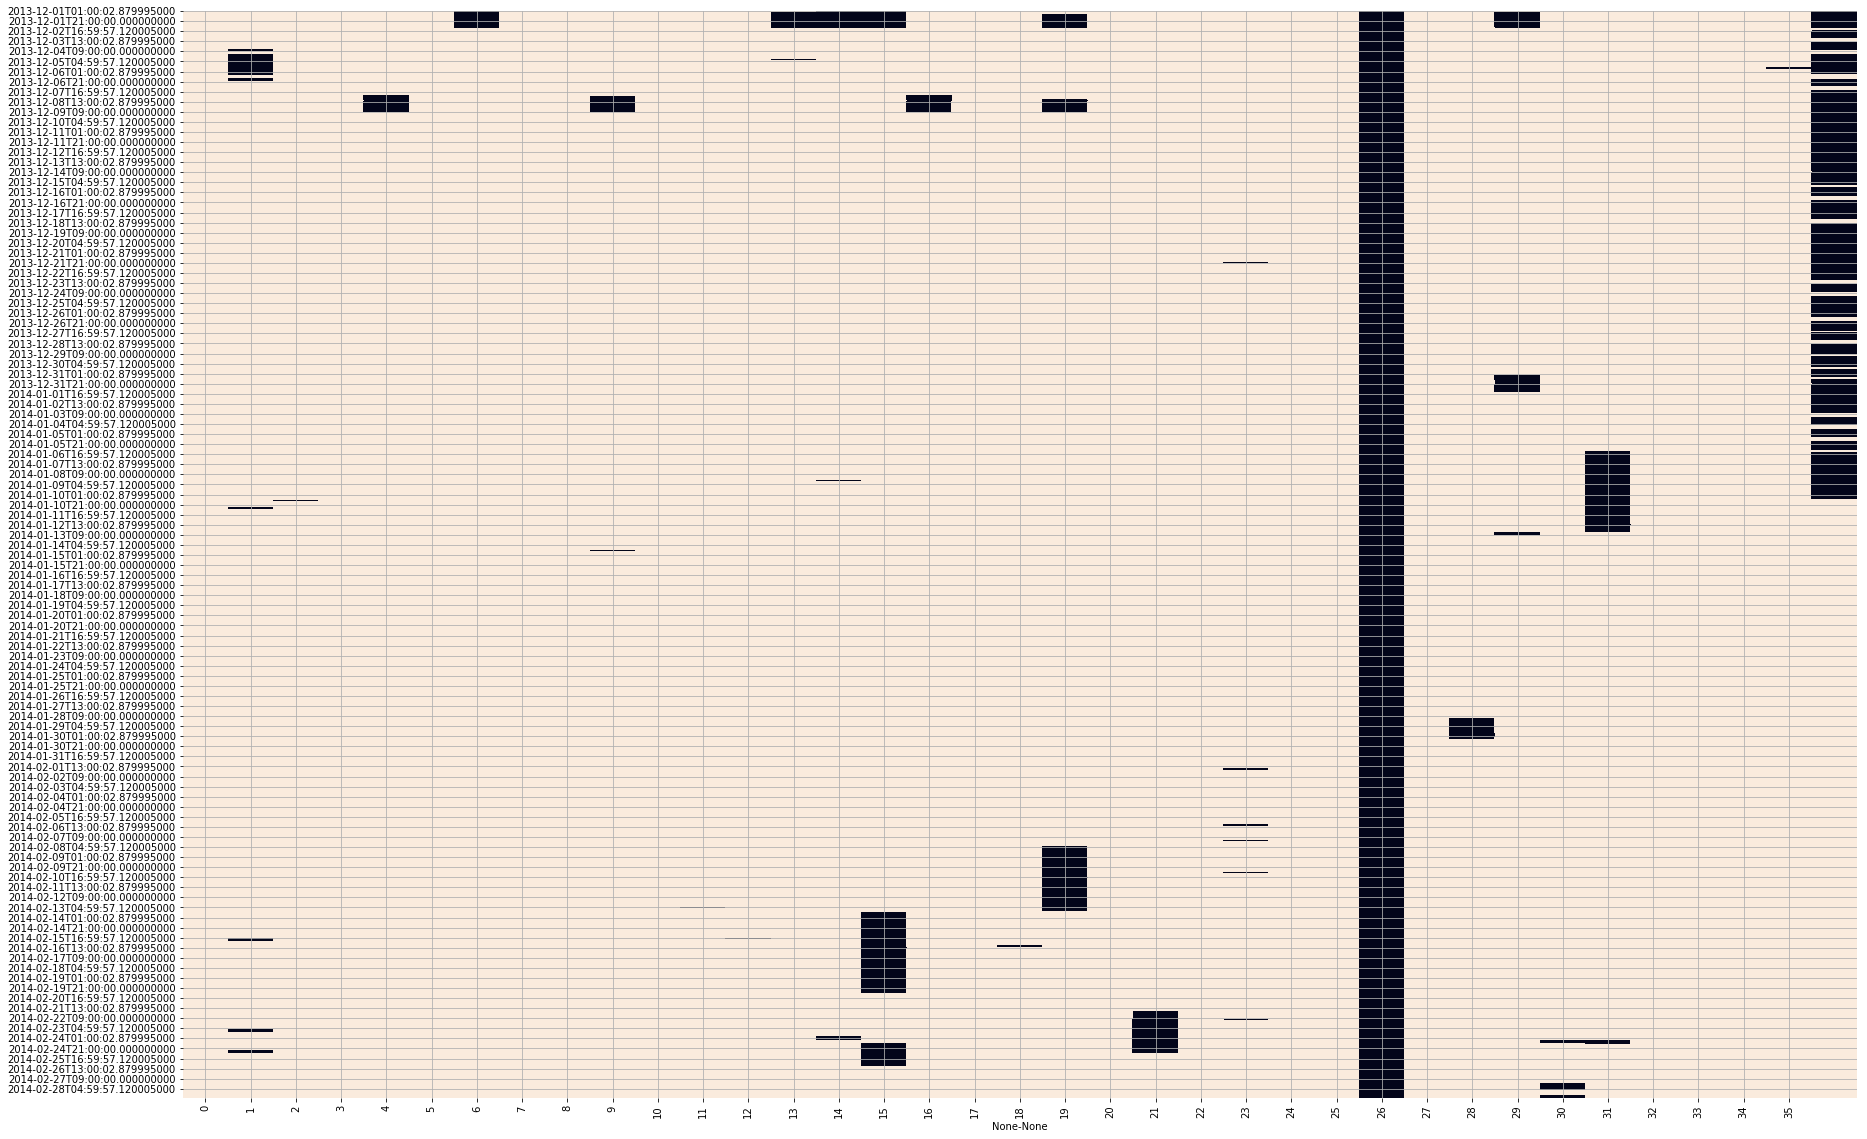

In [32]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

**Summer Data**

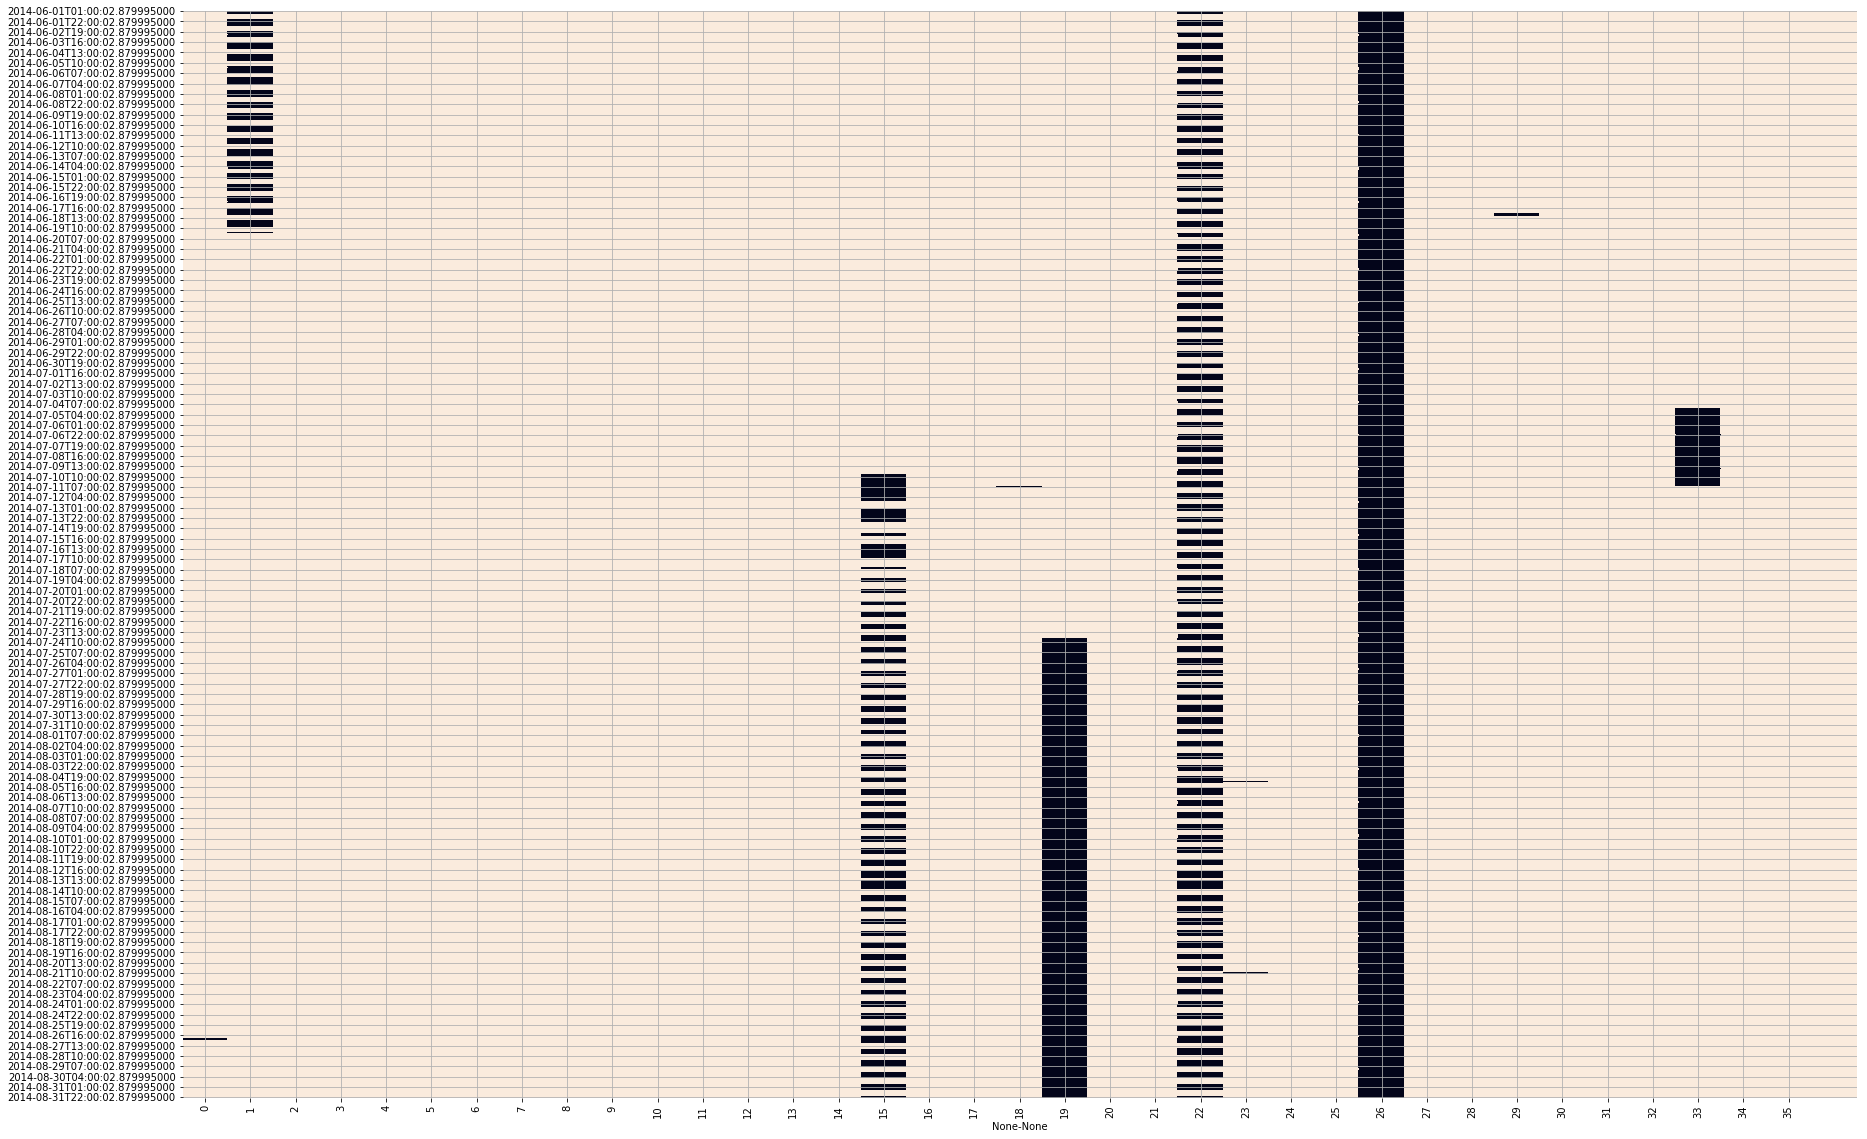

In [33]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Remove the Stations with Lots of Missing Data and Interpolate the Others

In [34]:
winter_removed = [1,4,6,9,13,14,15,16,19,21,26,28,29,31,36]
summer_removed = [0,1,15,19,22,26,33]

winter_filt = winter_data.drop(winter_data.columns[winter_removed],axis=1)
summer_filt = summer_data.drop(summer_data.columns[summer_removed],axis=1)

Plot the new missing data.

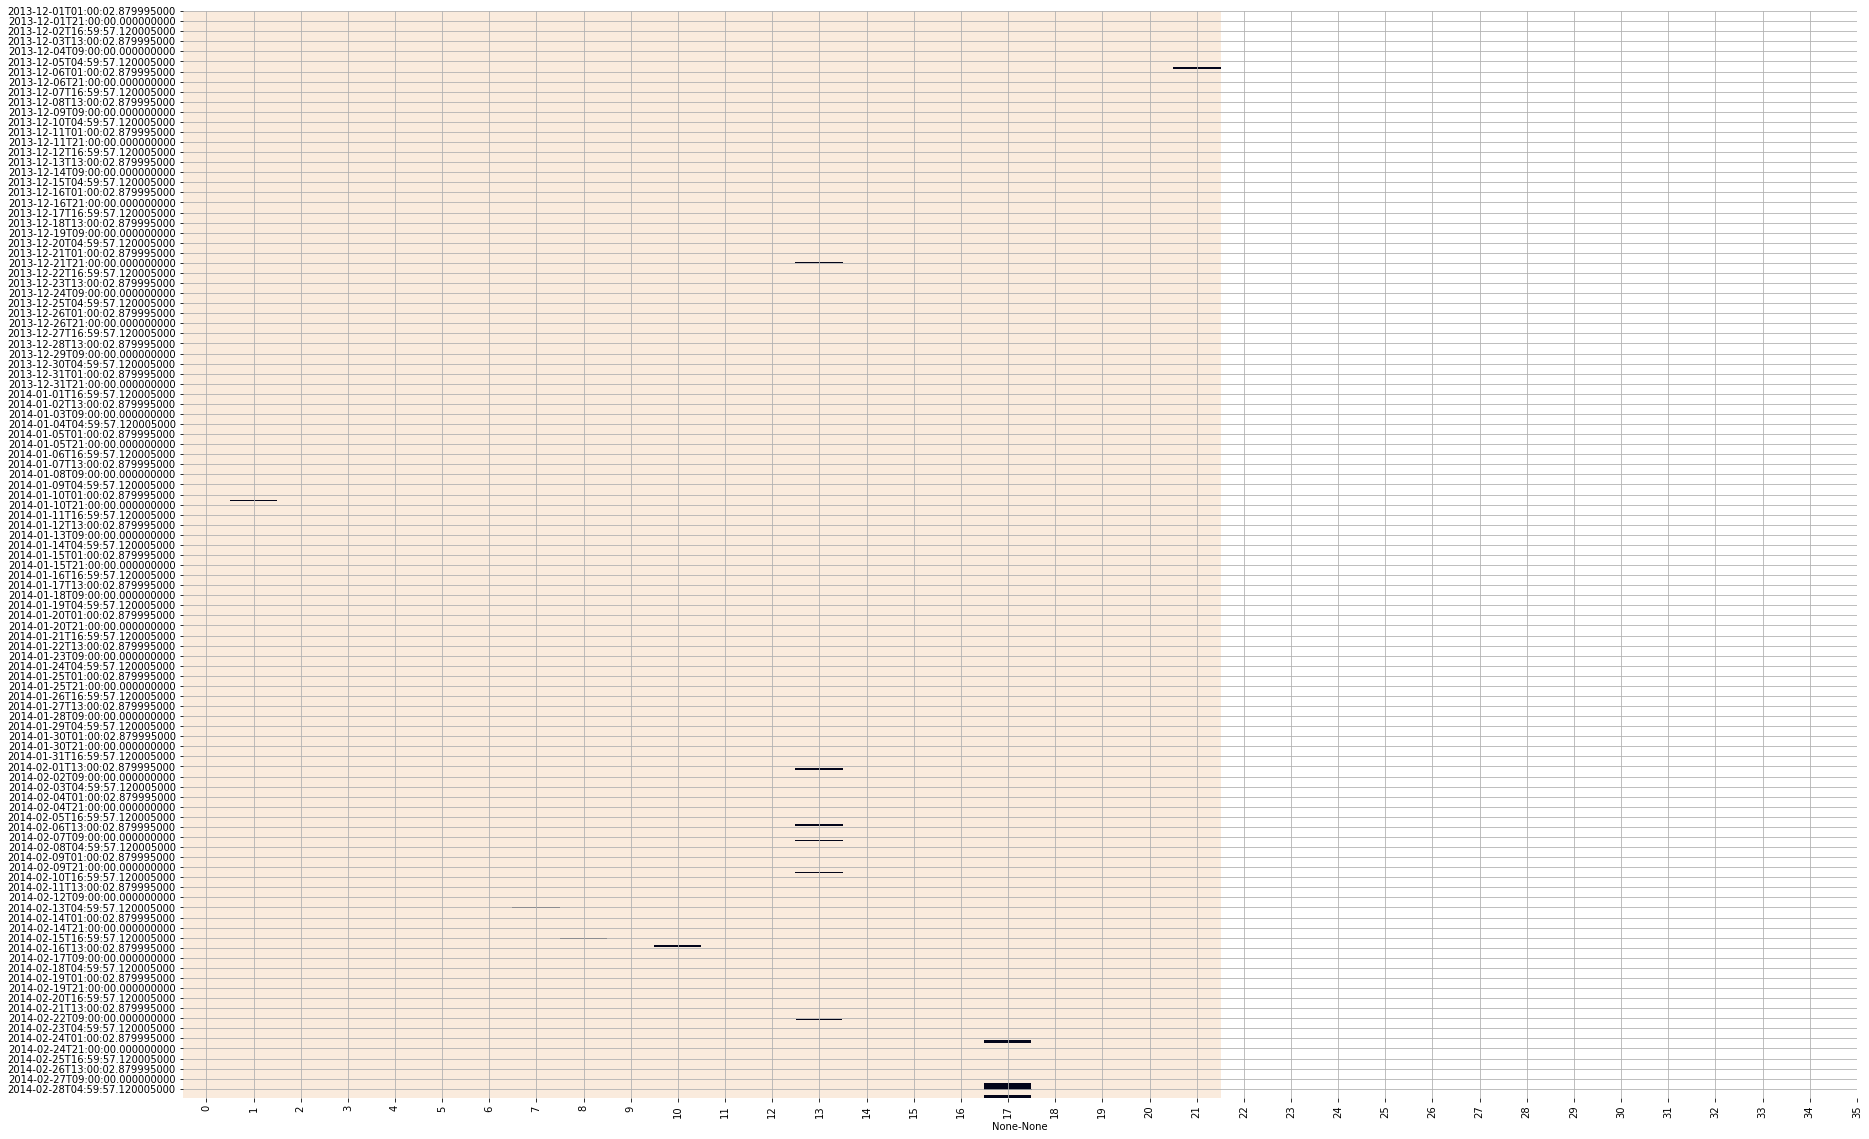

In [35]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

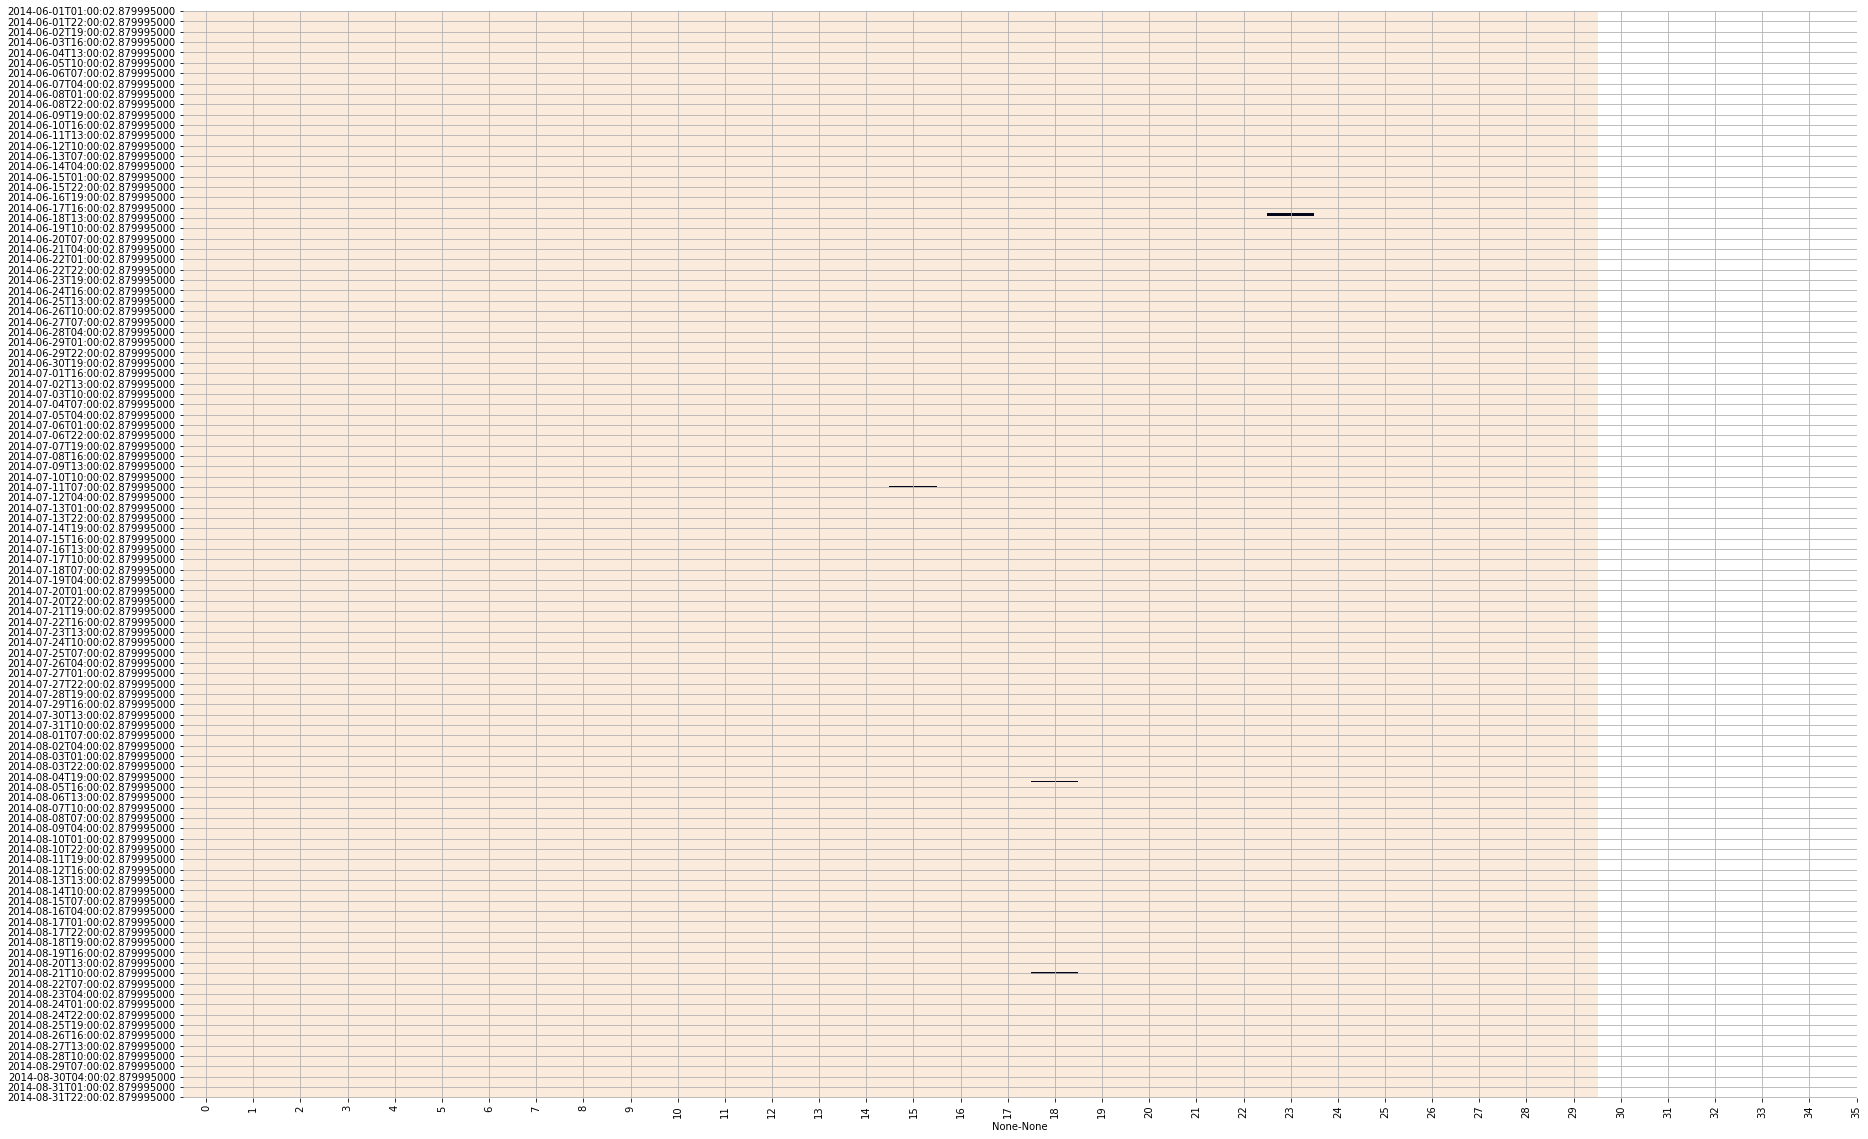

In [36]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Now Interpolate the DataFrames

In [37]:
winter_df = winter_filt.interpolate(method='cubic', axis=0)
summer_df = summer_filt.interpolate(method='cubic', axis=0)

## Save to CSV File

In [38]:
winter_df.to_pickle('Dataframes/winter_2014.pkl')
summer_df.to_pickle('Dataframes/summer_2014.pkl')

# 2012-2013

## Look at Missing Data

### Obtain Winter and Summer Data

In [39]:
winter_start = pd.Timestamp(year=2012, month=12, day=1, hour=0)
winter_end = pd.Timestamp(year=2013, month=3, day=1, hour=0)
summer_start = pd.Timestamp(year=2013, month=6, day=1, hour=0)
summer_end = pd.Timestamp(year=2013, month=9, day=1, hour=0)

winter_data = df[(df.index>winter_start) & (df.index<winter_end)]
summer_data = df[(df.index>summer_start) & (df.index<summer_end)]

**Winter Data**

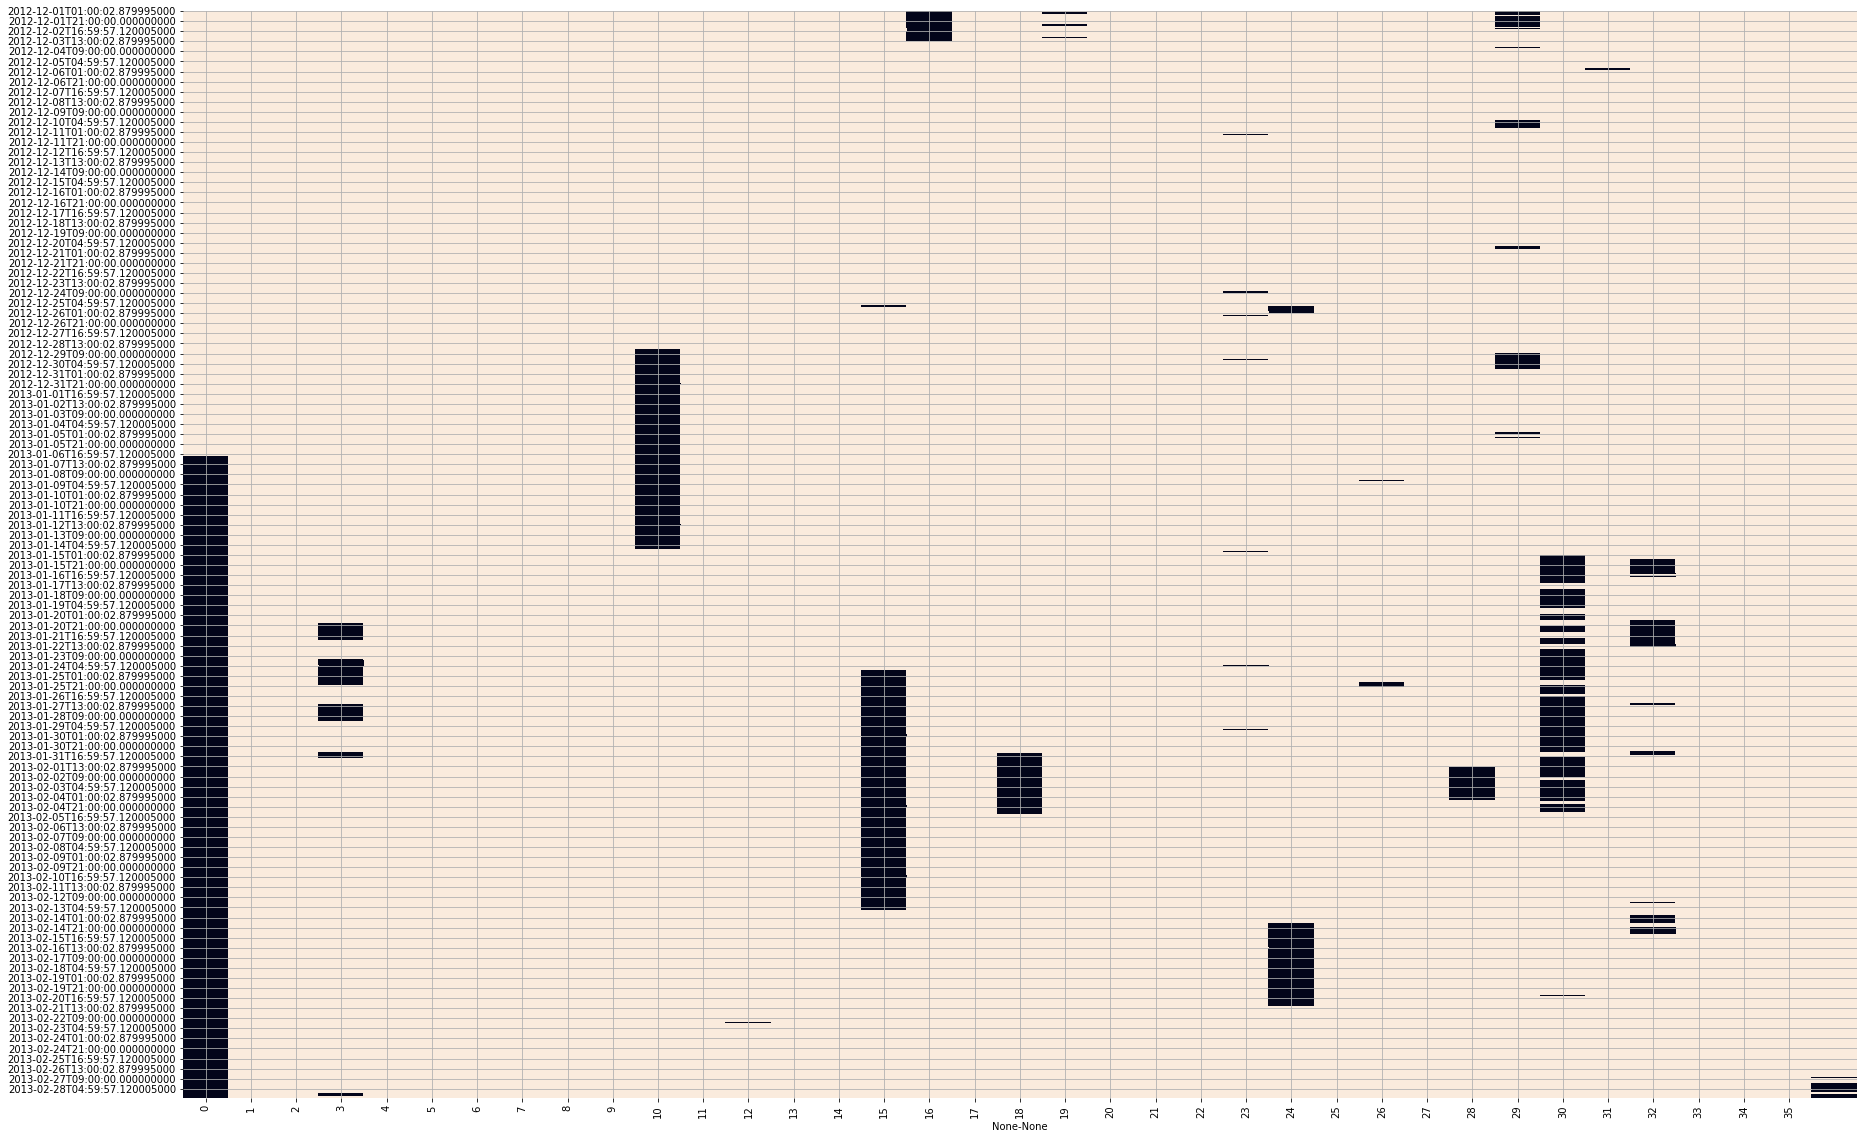

In [40]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

**Summer Data**

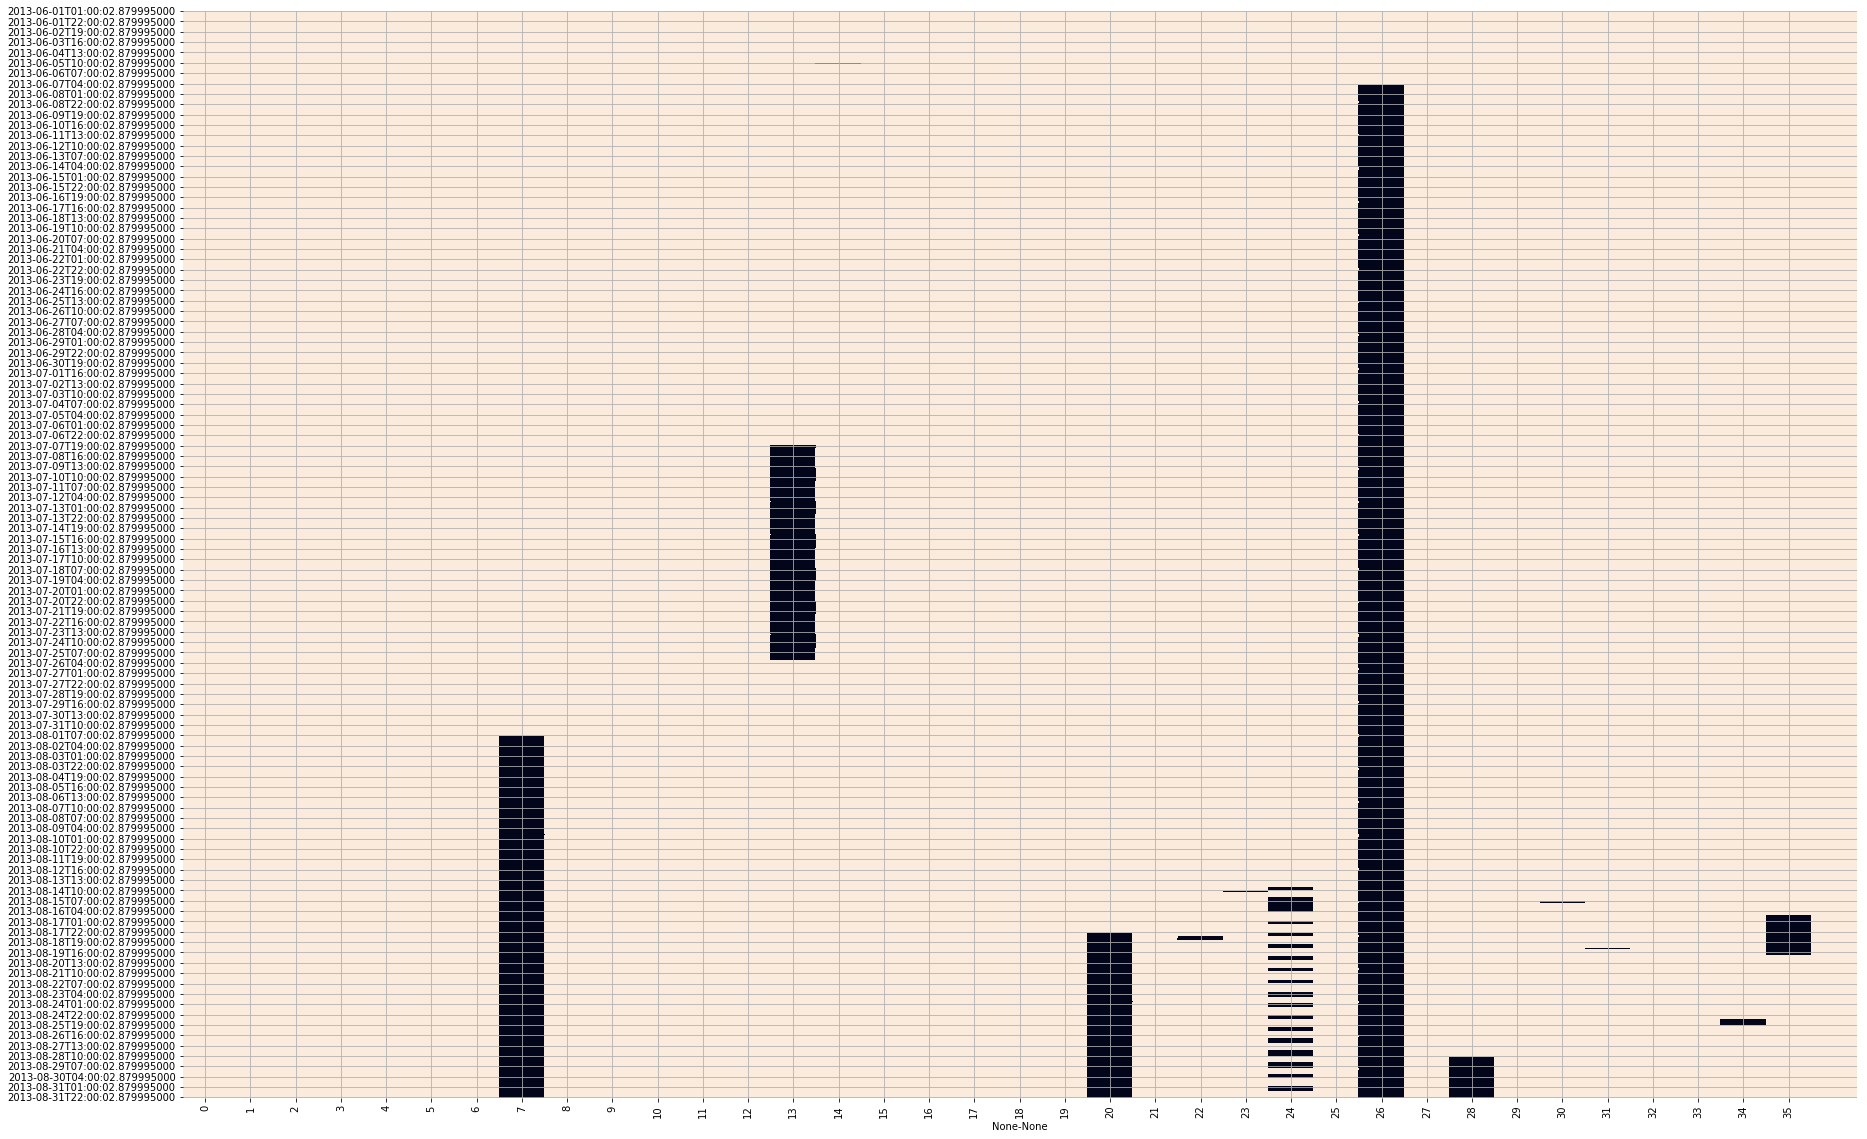

In [41]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Remove the Stations with Lots of Missing Data and Interpolate the Others

In [42]:
winter_removed = [0,3,10,15,16,18,24,28,29,30,32,36]
summer_removed = [7,13,20,24,26,28,35]

winter_filt = winter_data.drop(winter_data.columns[winter_removed],axis=1)
summer_filt = summer_data.drop(summer_data.columns[summer_removed],axis=1)

Plot the new missing data.

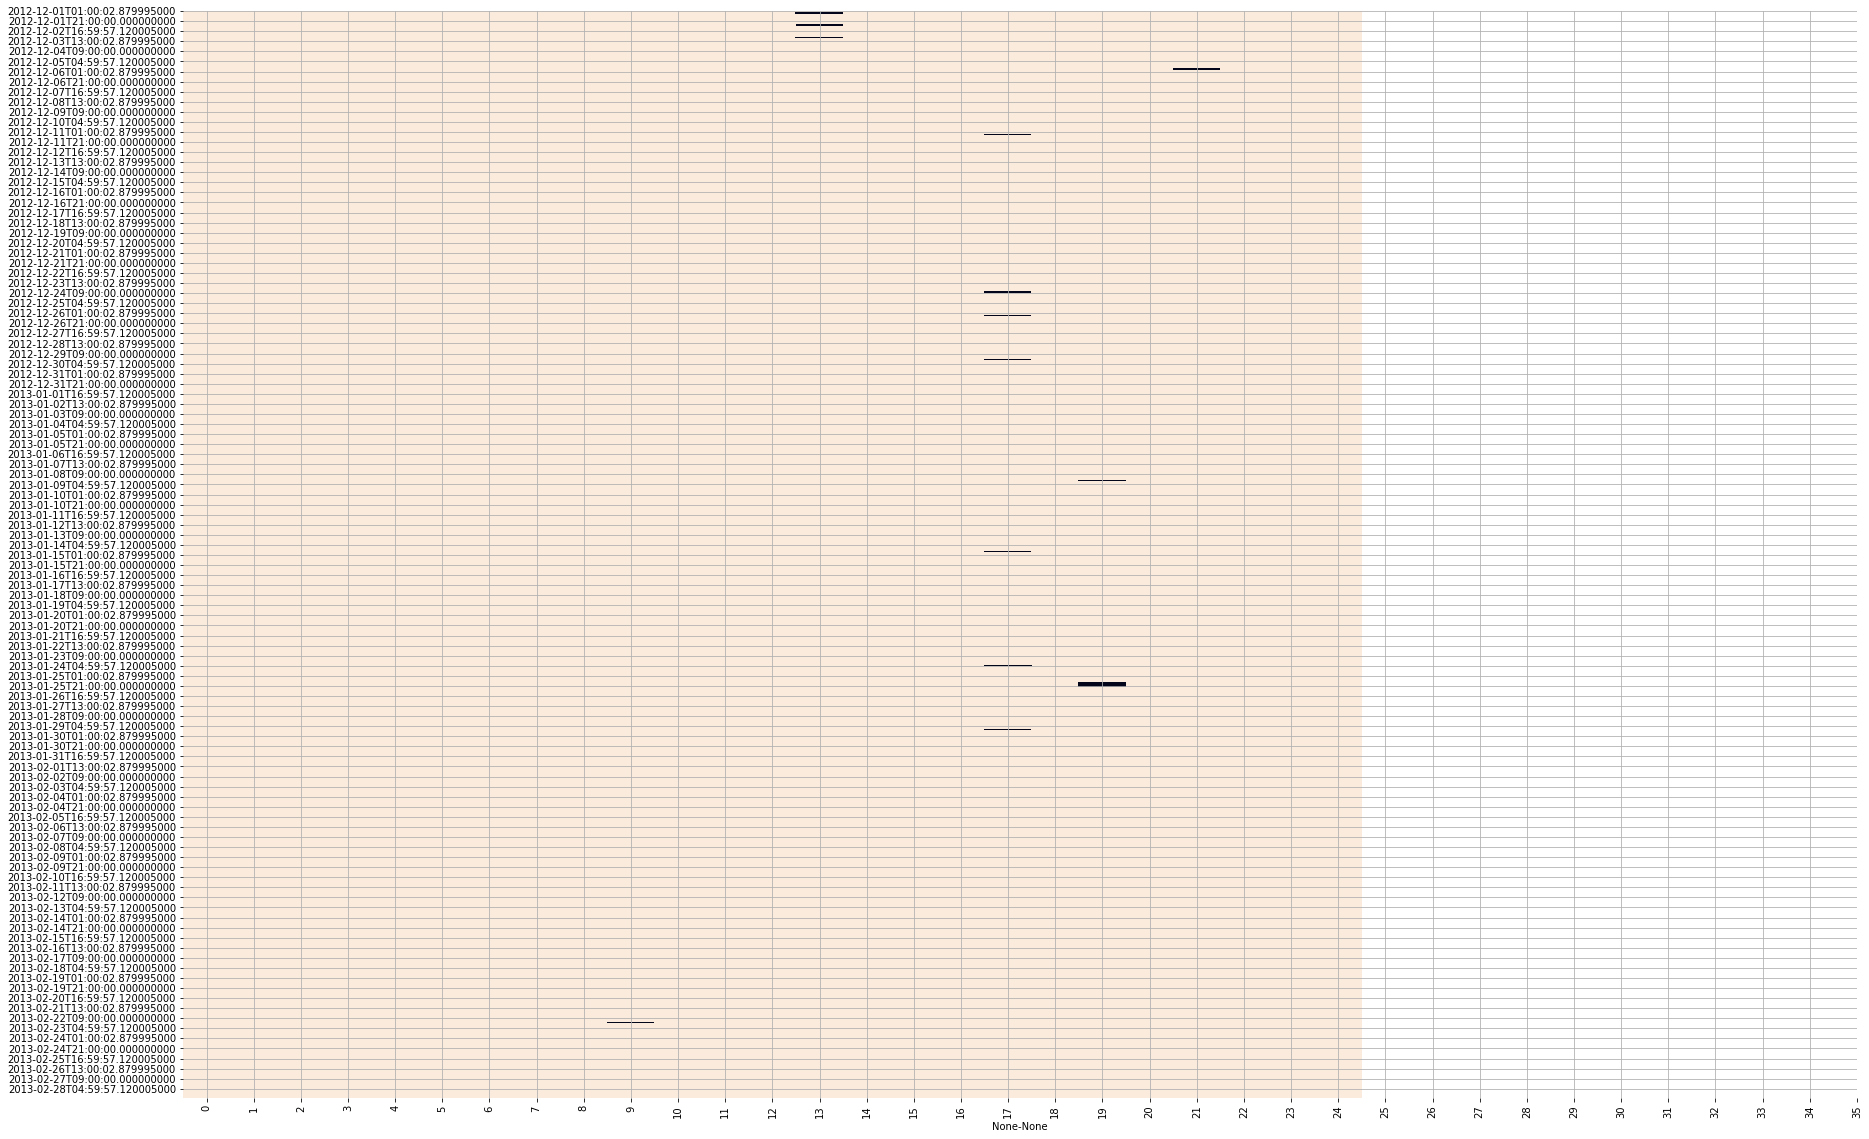

In [43]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

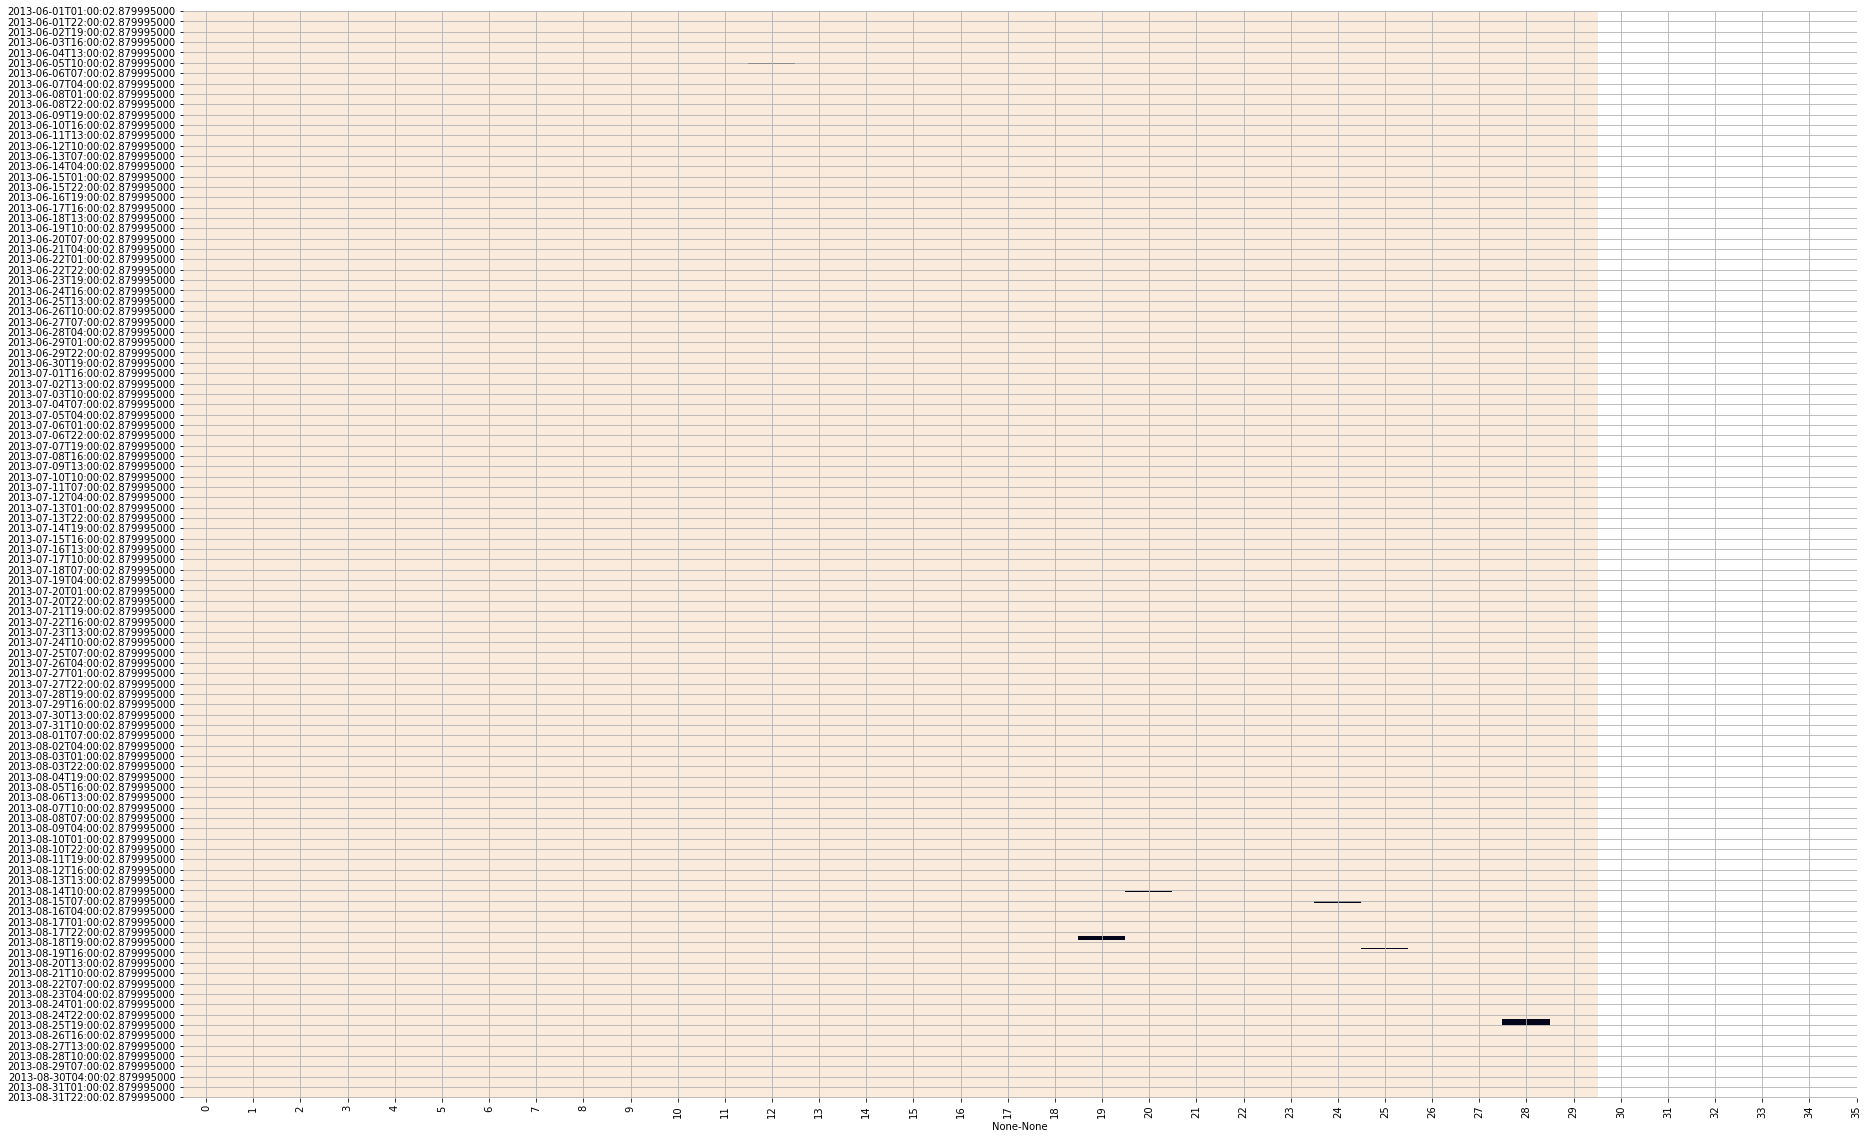

In [44]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Now Interpolate the DataFrames

In [45]:
winter_df = winter_filt.interpolate(method='cubic', axis=0)
summer_df = summer_filt.interpolate(method='cubic', axis=0)

## Save to CSV File

In [46]:
winter_df.to_pickle('Dataframes/winter_2013.pkl')
summer_df.to_pickle('Dataframes/summer_2013.pkl')

# 2011-2012

## Look at Missing Data

### Obtain Winter and Summer Data

In [47]:
winter_start = pd.Timestamp(year=2011, month=12, day=1, hour=0)
winter_end = pd.Timestamp(year=2012, month=3, day=1, hour=0)
summer_start = pd.Timestamp(year=2012, month=6, day=1, hour=0)
summer_end = pd.Timestamp(year=2012, month=9, day=1, hour=0)

winter_data = df[(df.index>winter_start) & (df.index<winter_end)]
summer_data = df[(df.index>summer_start) & (df.index<summer_end)]

**Winter Data**

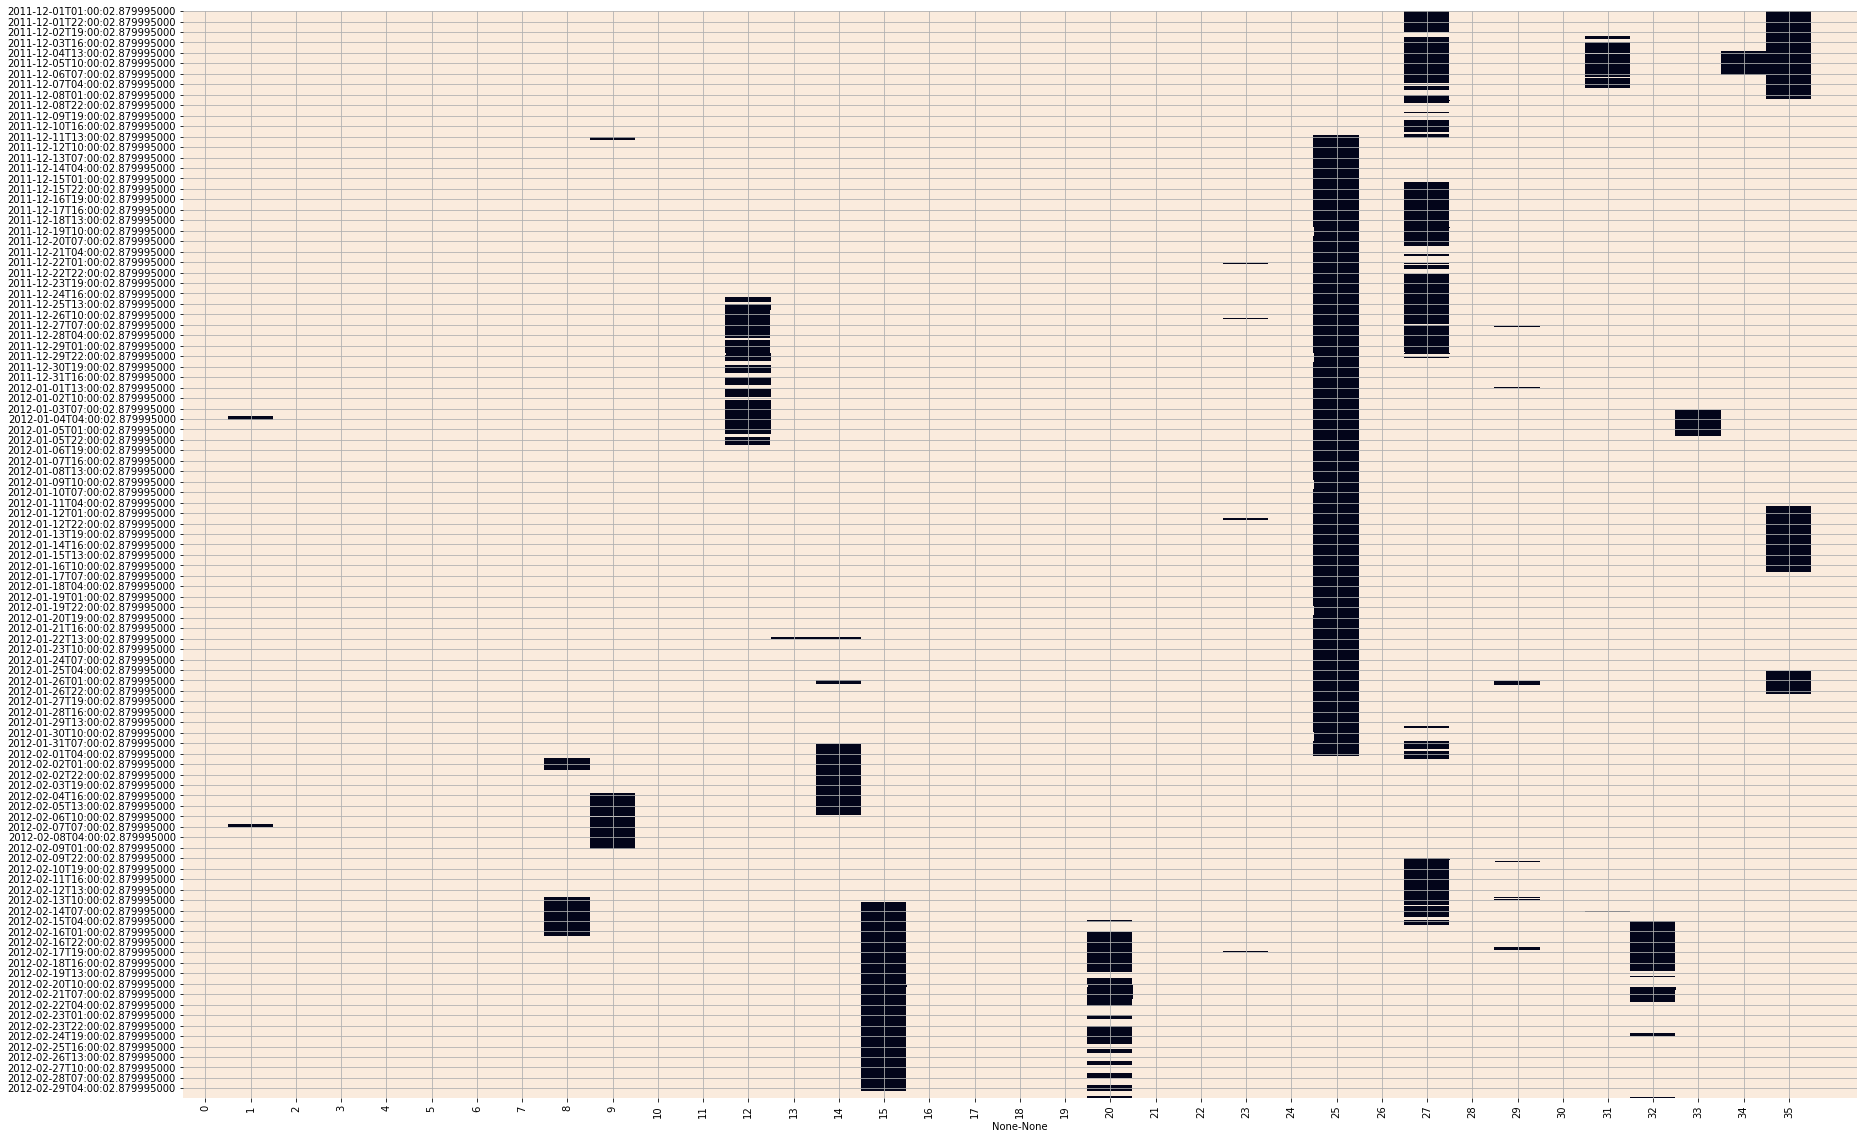

In [48]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

**Summer Data**

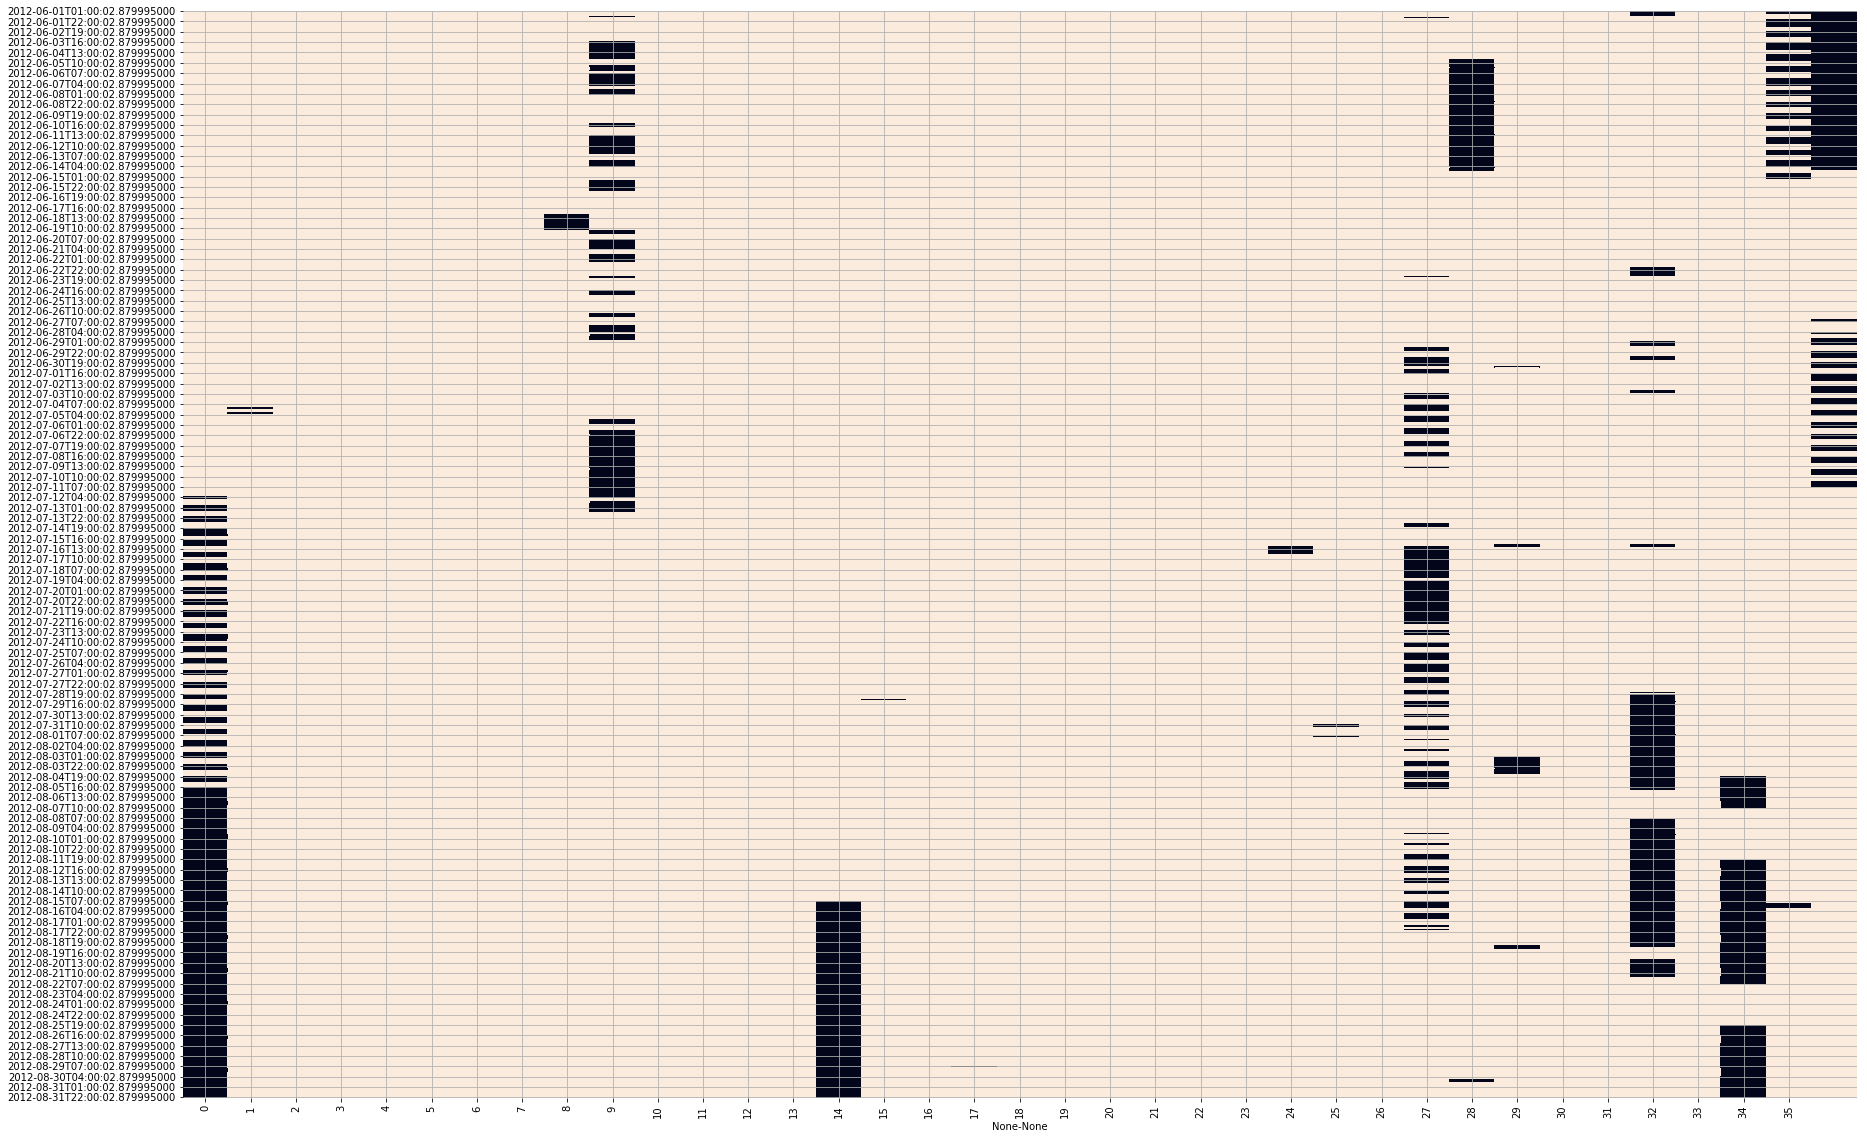

In [49]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Remove the Stations with Lots of Missing Data and Interpolate the Others

In [50]:
winter_removed = [8,9,12,14,15,20,25,27,31,32,33,34,35]
summer_removed = [0,8,9,14,27,28,29,32,34,35,36]

winter_filt = winter_data.drop(winter_data.columns[winter_removed],axis=1)
summer_filt = summer_data.drop(summer_data.columns[summer_removed],axis=1)

Plot the new missing data.

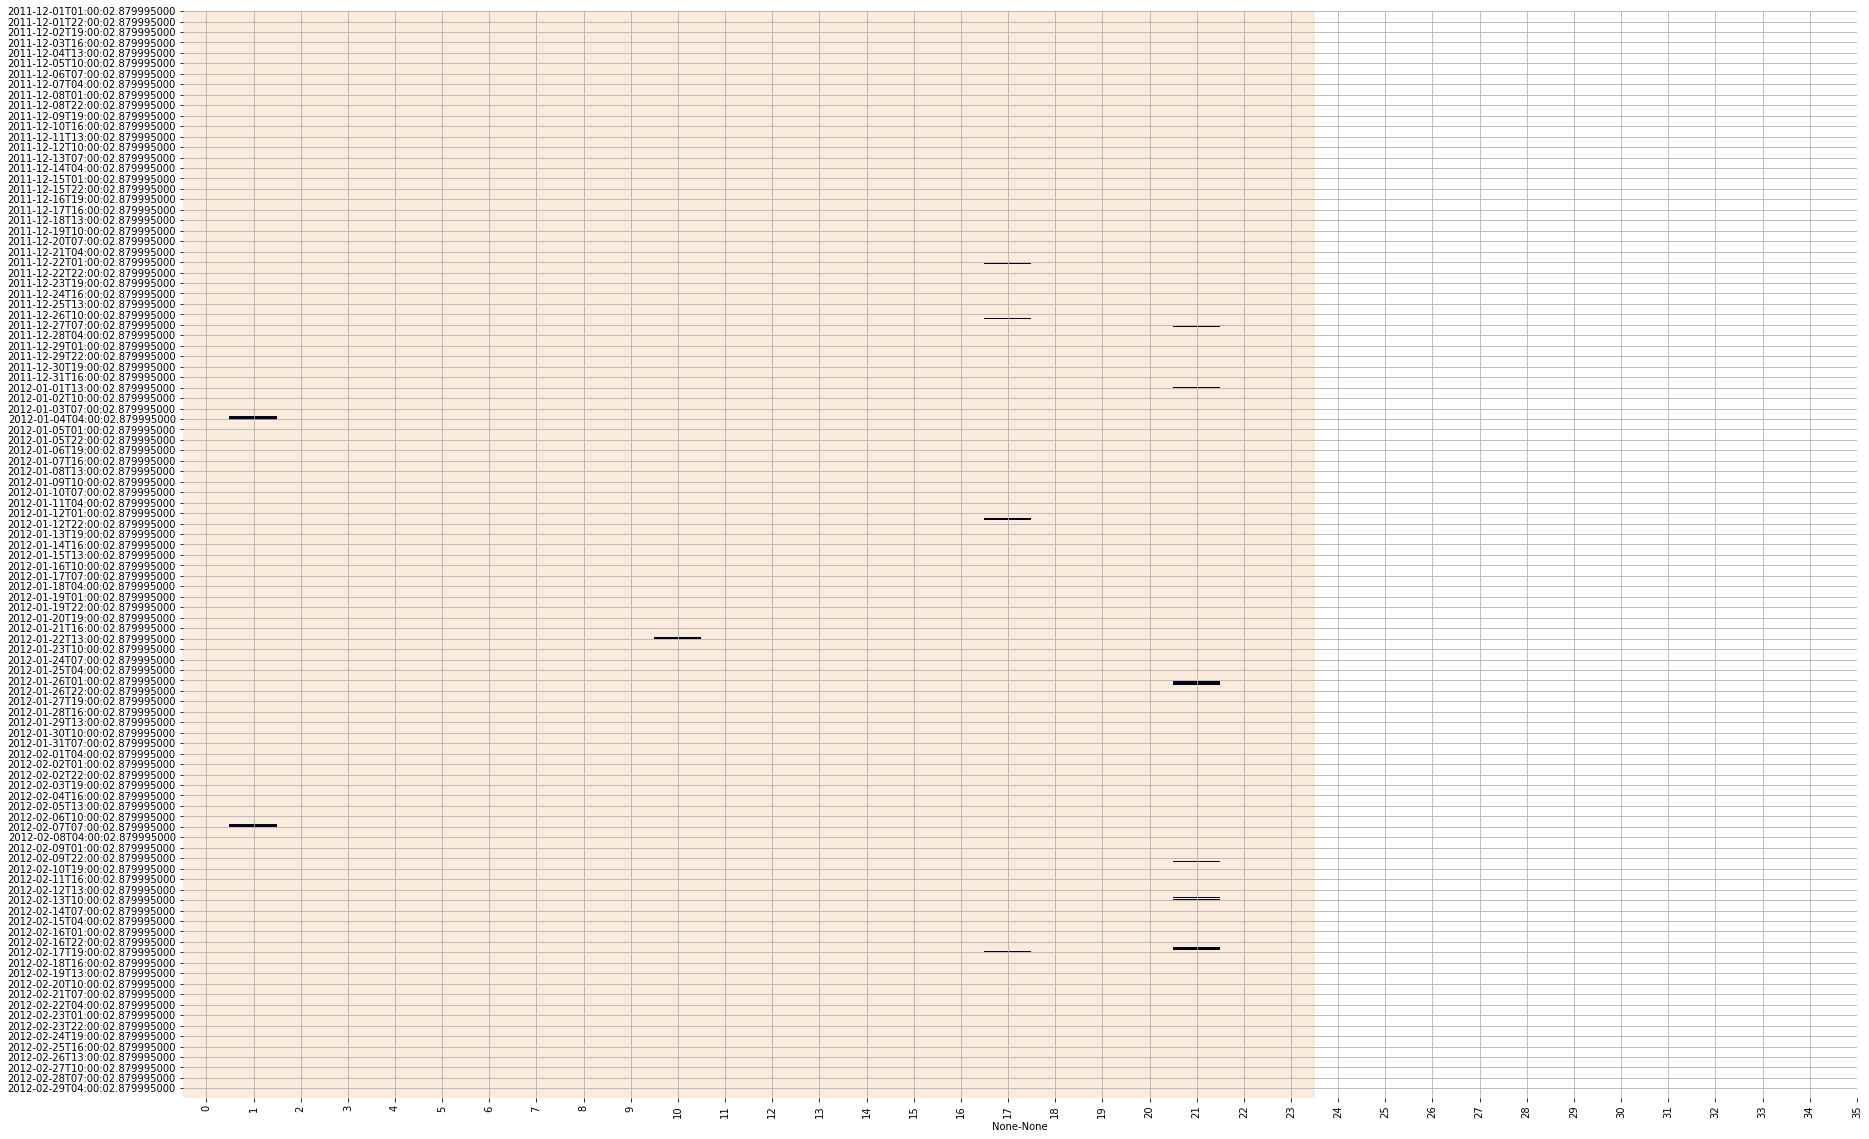

In [51]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

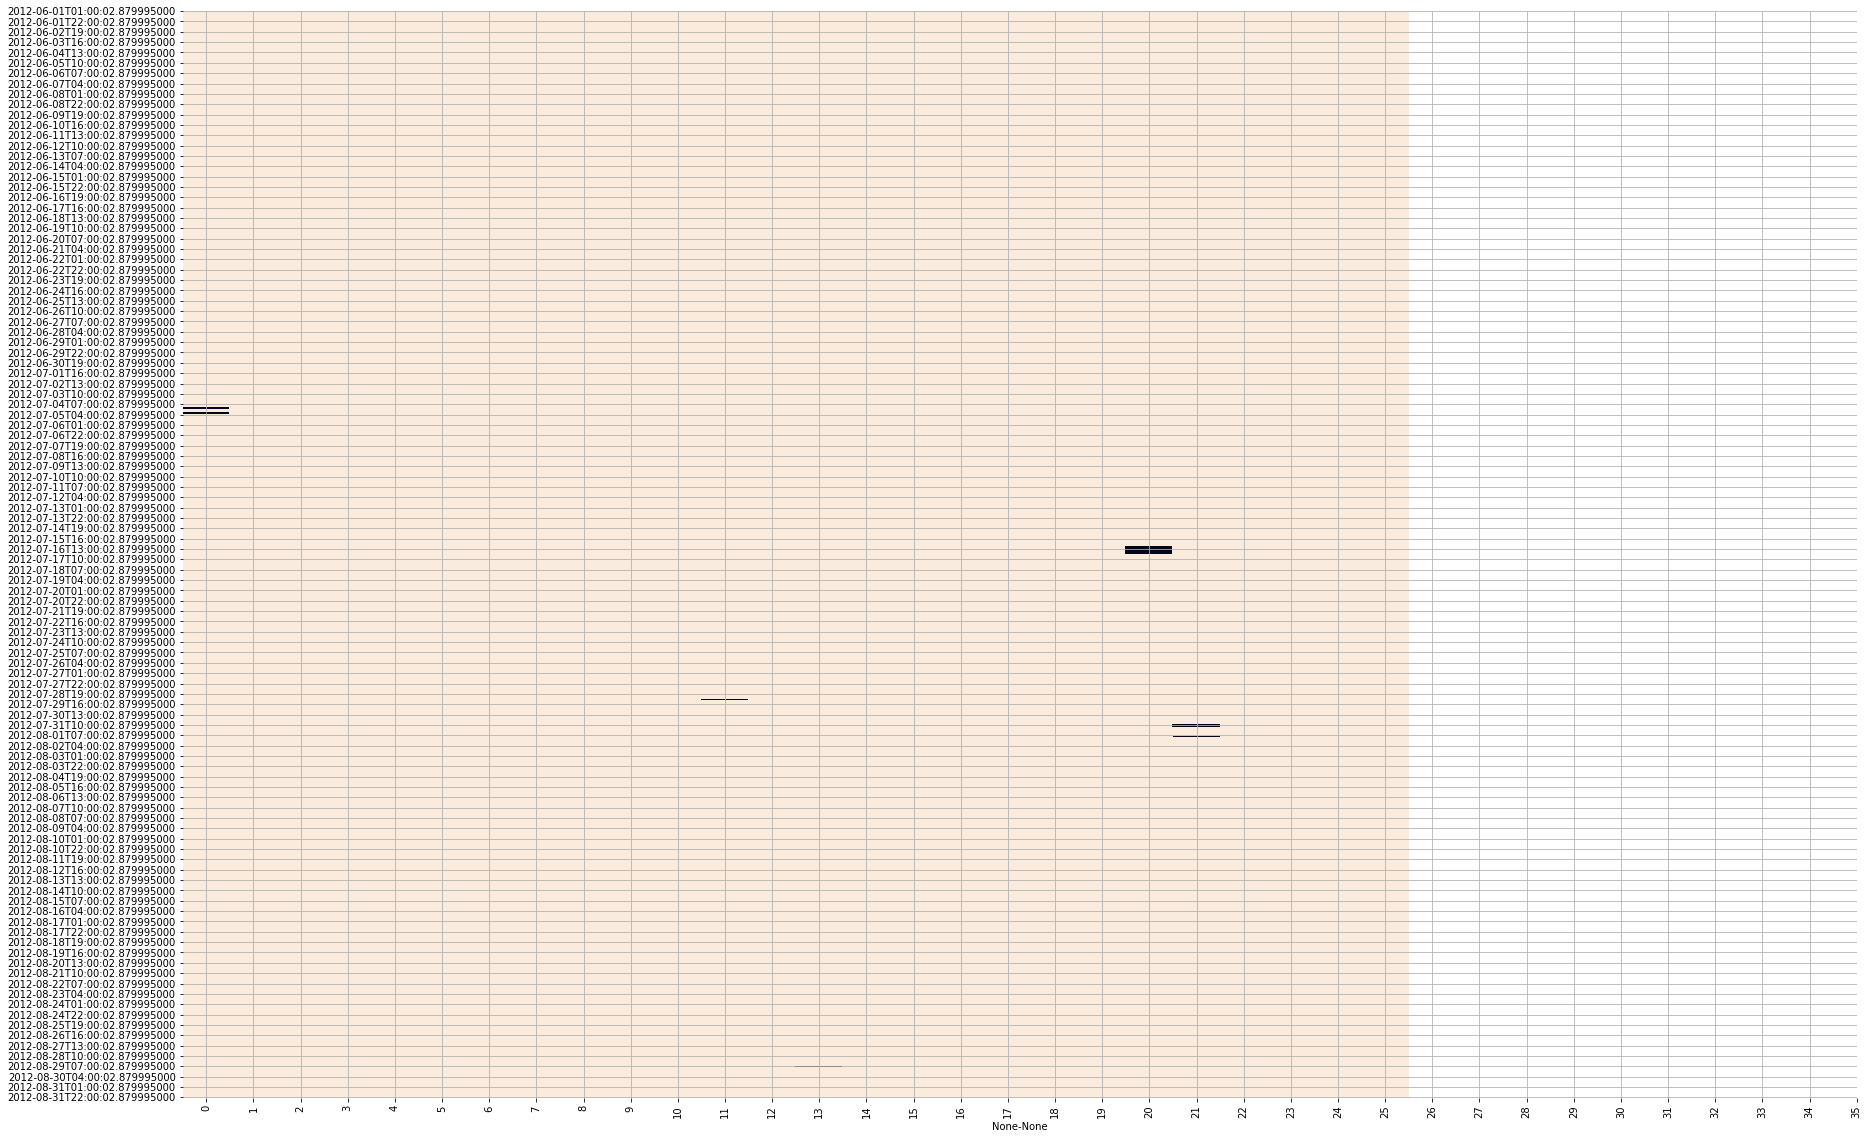

In [52]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Now Interpolate the DataFrames

In [53]:
winter_df = winter_filt.interpolate(method='cubic', axis=0)
summer_df = summer_filt.interpolate(method='cubic', axis=0)

## Save to CSV File

In [54]:
winter_df.to_pickle('Dataframes/winter_2012.pkl')
summer_df.to_pickle('Dataframes/summer_2012.pkl')

# 2010-2011

## Look at Missing Data

### Obtain Winter and Summer Data

In [55]:
winter_start = pd.Timestamp(year=2010, month=12, day=1, hour=0)
winter_end = pd.Timestamp(year=2011, month=3, day=1, hour=0)
summer_start = pd.Timestamp(year=2011, month=6, day=1, hour=0)
summer_end = pd.Timestamp(year=2011, month=9, day=1, hour=0)

winter_data = df[(df.index>winter_start) & (df.index<winter_end)]
summer_data = df[(df.index>summer_start) & (df.index<summer_end)]

**Winter Data**

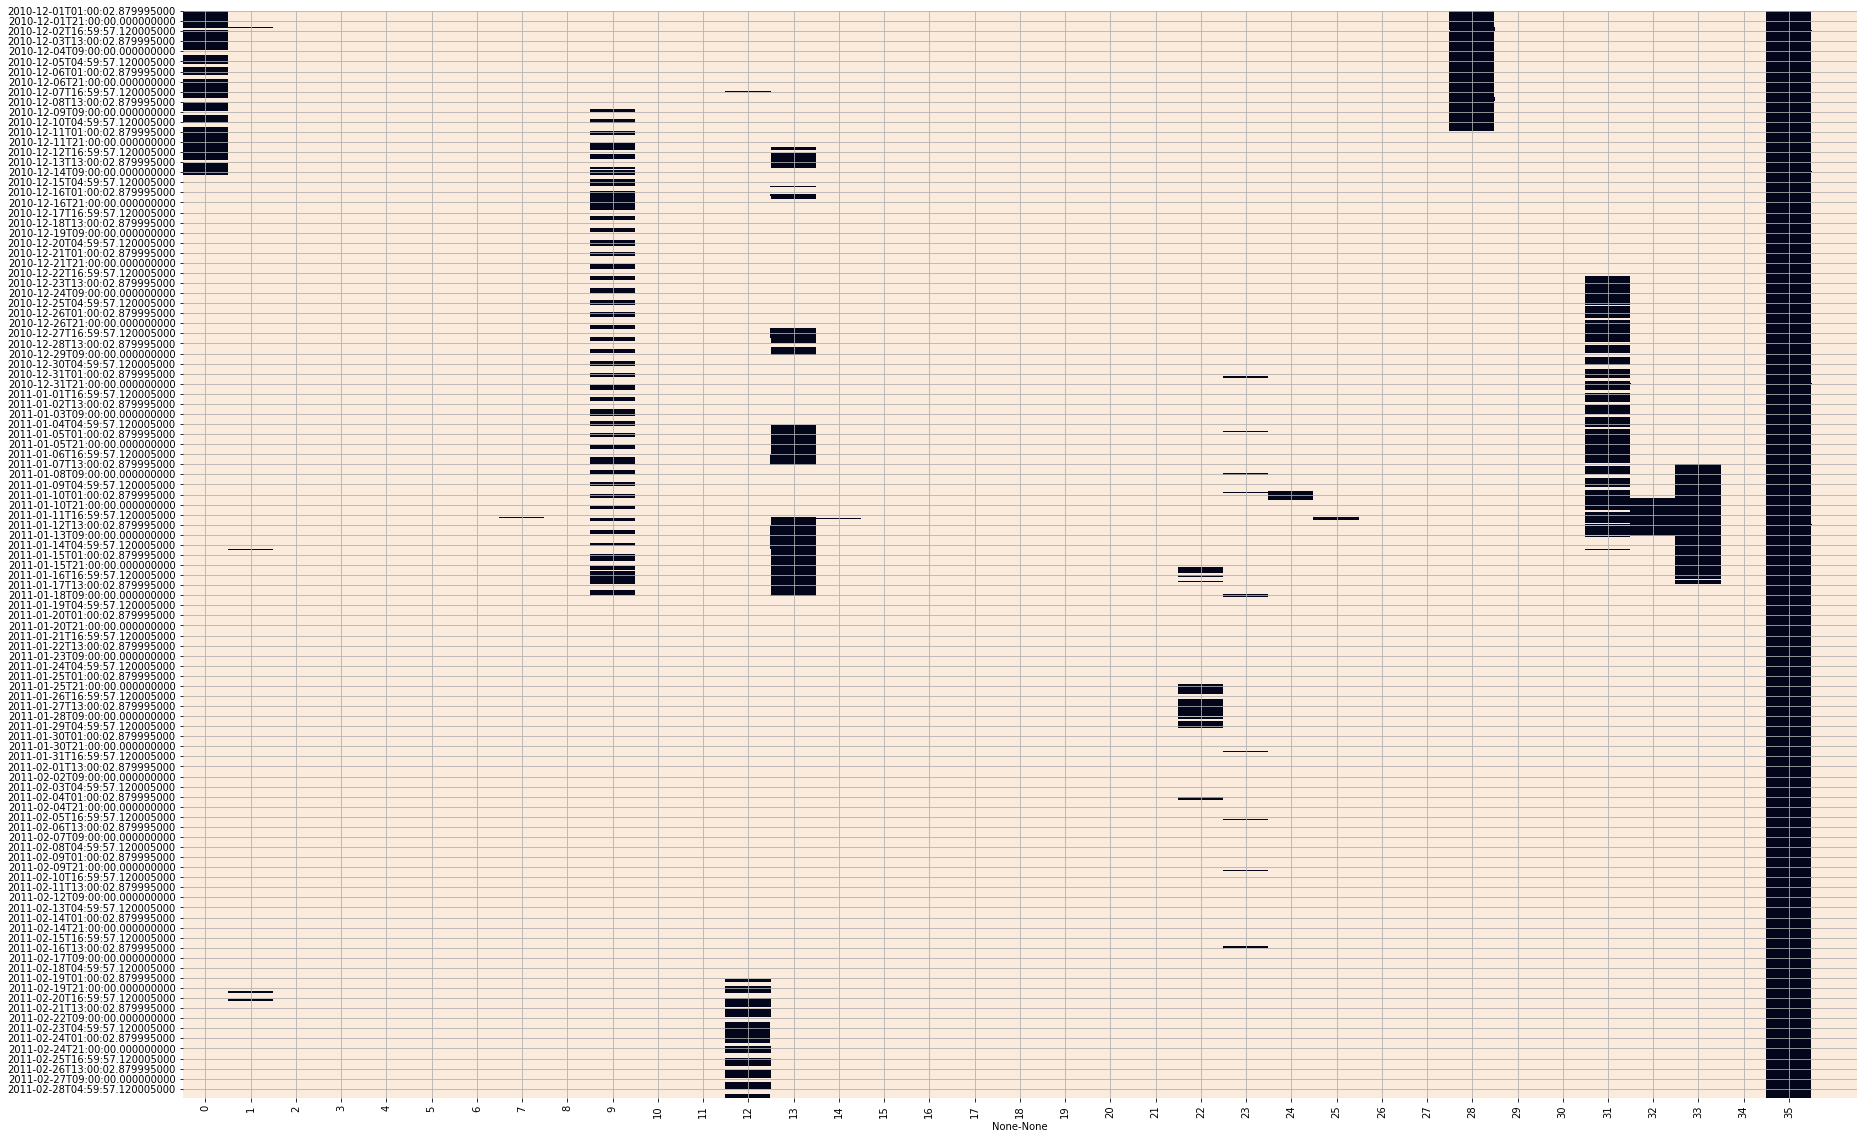

In [56]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

**Summer Data**

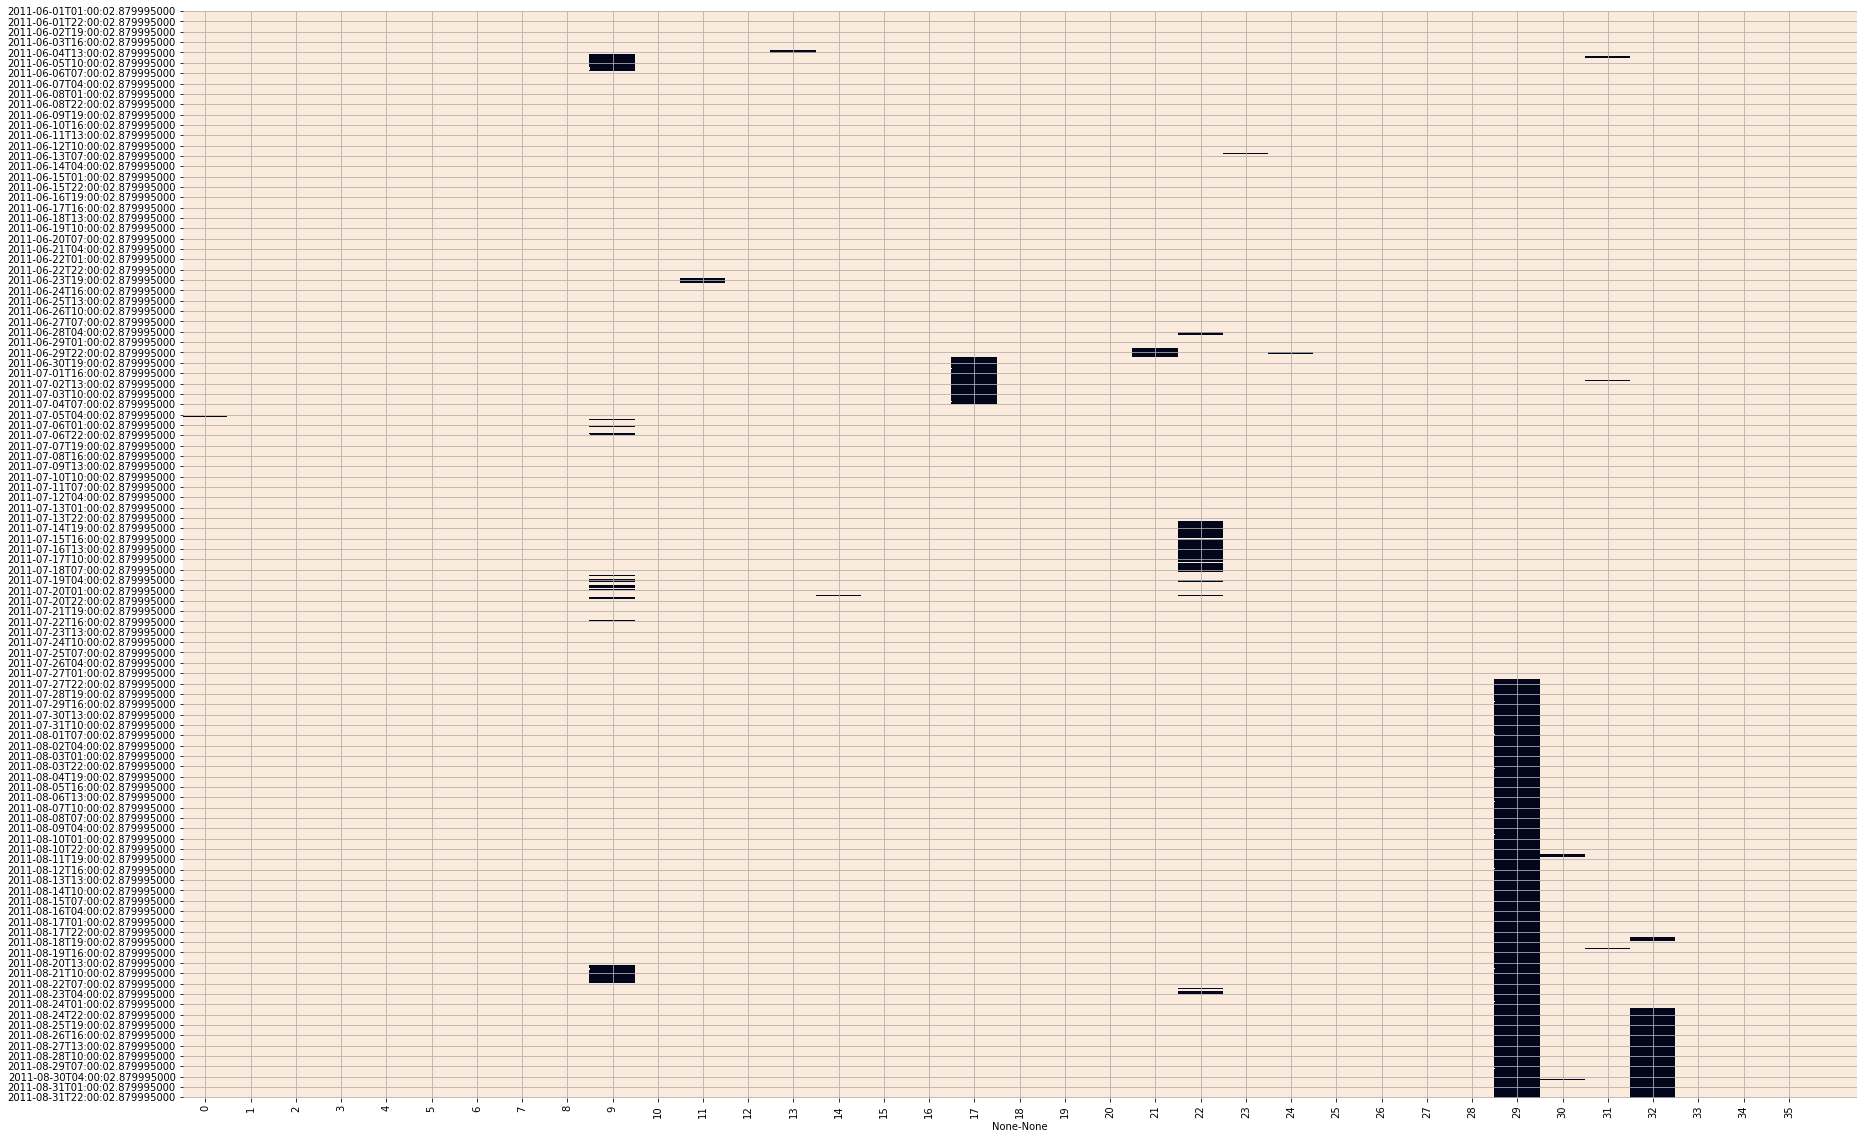

In [57]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Remove the Stations with Lots of Missing Data and Interpolate the Others

In [58]:
winter_removed = [0,9,12,13,22,28,31,32,33,35]
summer_removed = [9,17,22,29,32]

winter_filt = winter_data.drop(winter_data.columns[winter_removed],axis=1)
summer_filt = summer_data.drop(summer_data.columns[summer_removed],axis=1)

Plot the new missing data.

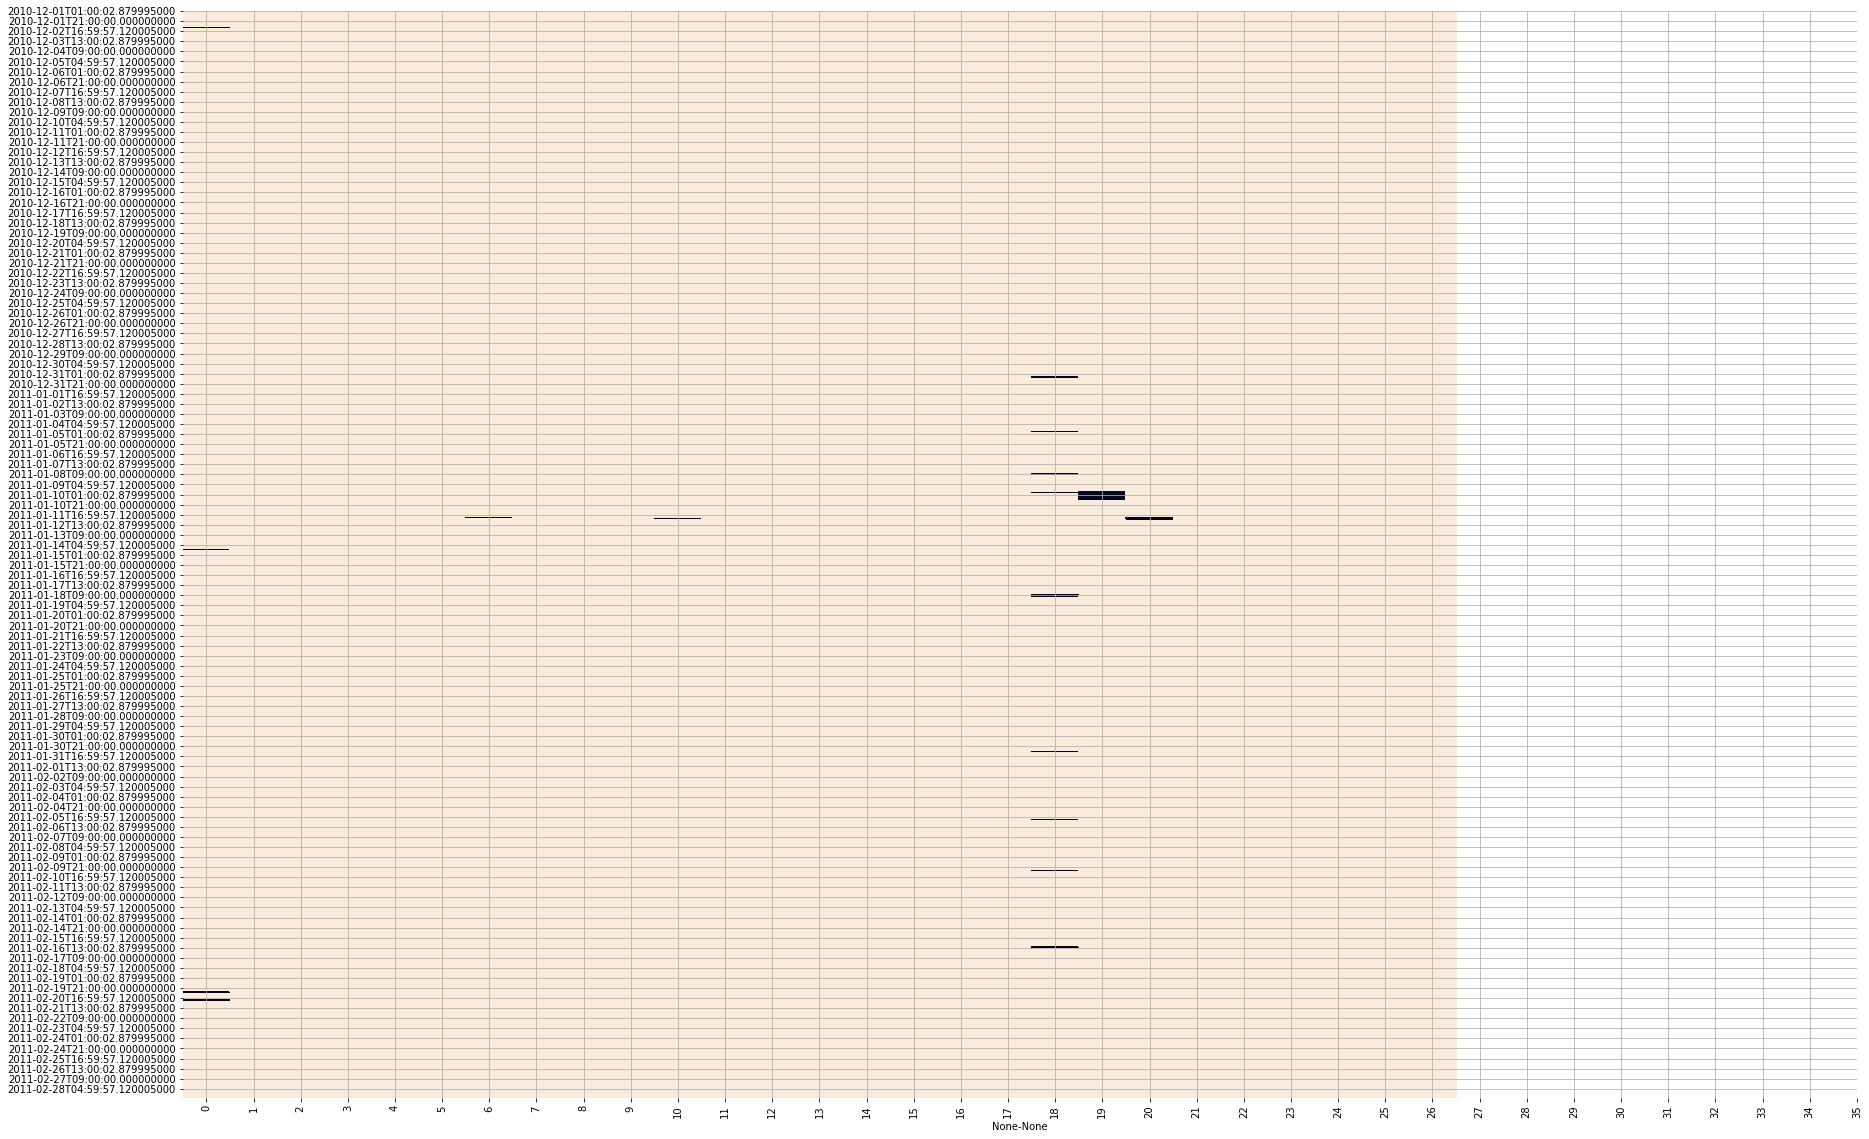

In [59]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

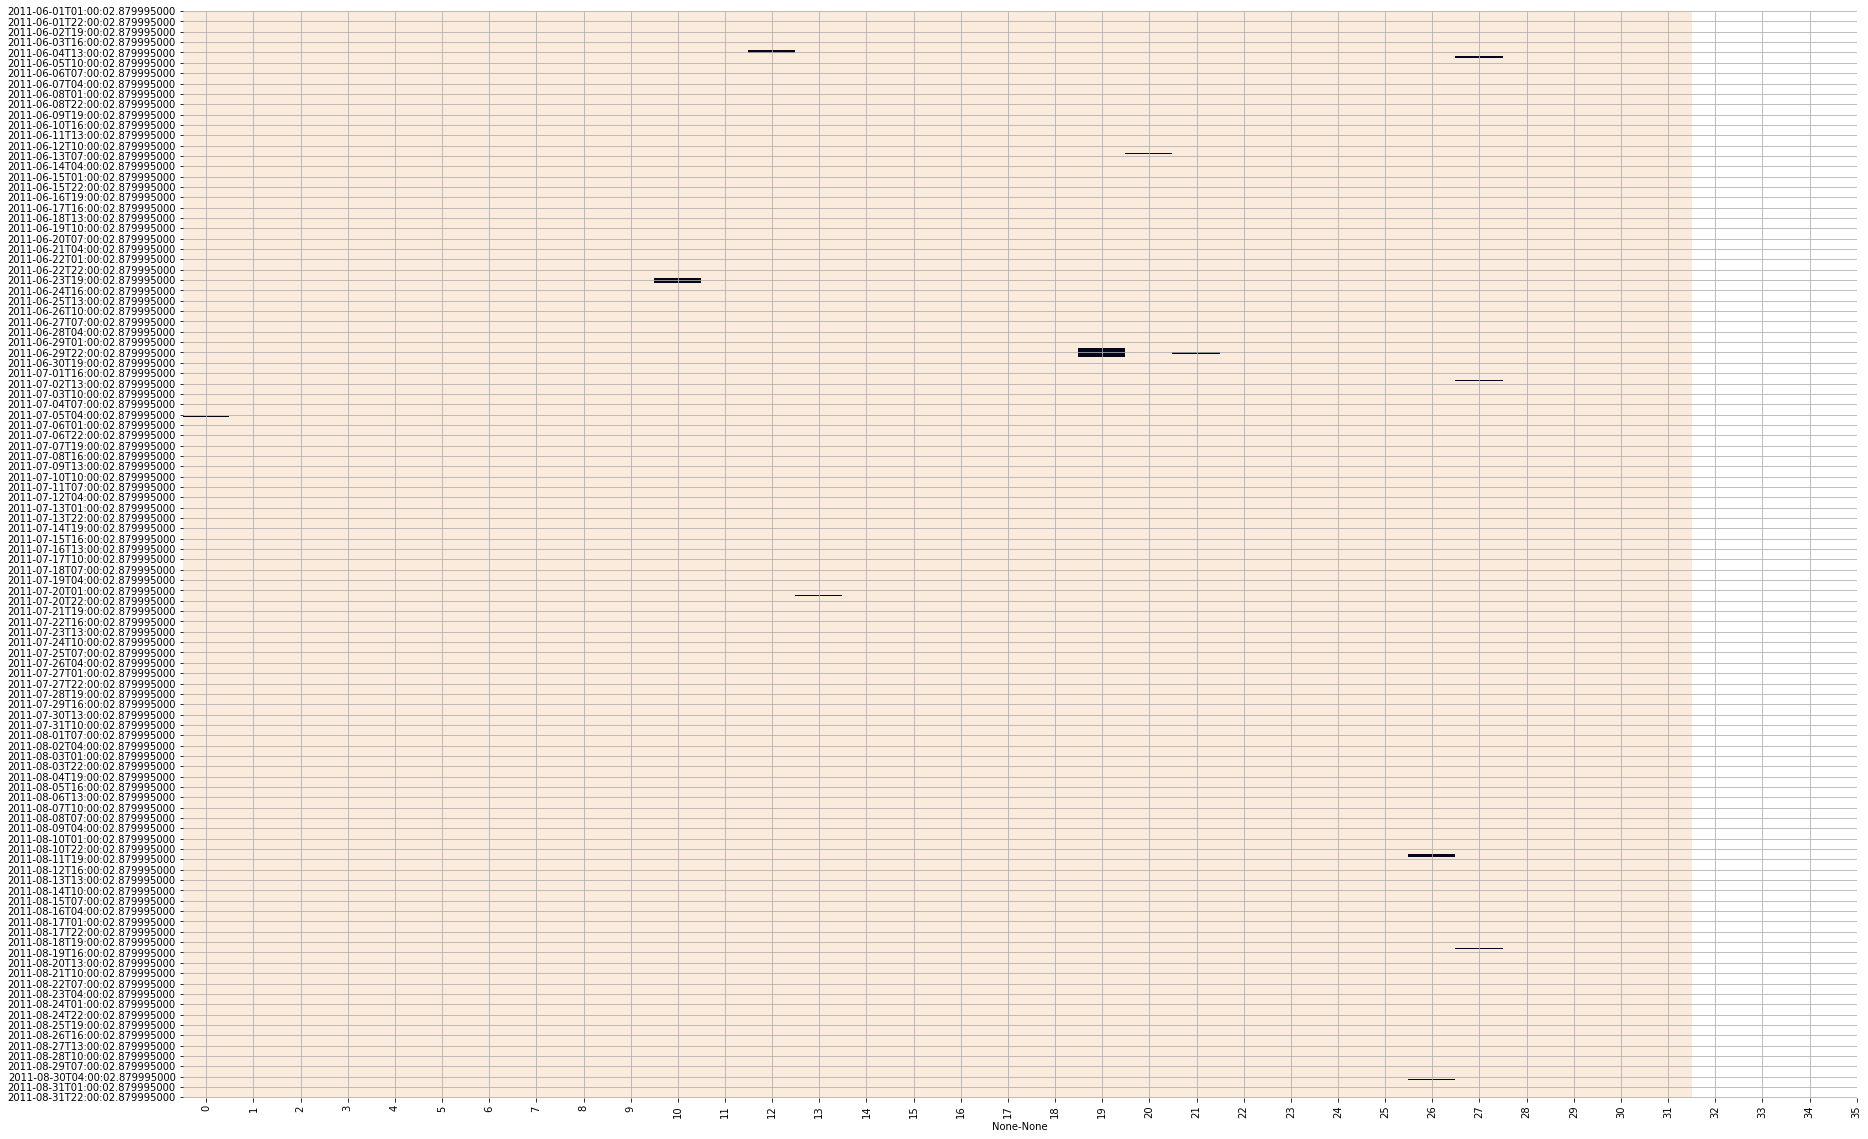

In [60]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Now Interpolate the DataFrames

In [61]:
winter_df = winter_filt.interpolate(method='cubic', axis=0)
summer_df = summer_filt.interpolate(method='cubic', axis=0)

## Save to CSV File

In [62]:
winter_df.to_pickle('Dataframes/winter_2011.pkl')
summer_df.to_pickle('Dataframes/summer_2011.pkl')

# 2009-2010

## Look at Missing Data

### Obtain Winter and Summer Data

In [63]:
winter_start = pd.Timestamp(year=2009, month=12, day=1, hour=0)
winter_end = pd.Timestamp(year=2010, month=3, day=1, hour=0)
summer_start = pd.Timestamp(year=2010, month=6, day=1, hour=0)
summer_end = pd.Timestamp(year=2010, month=9, day=1, hour=0)

winter_data = df[(df.index>winter_start) & (df.index<winter_end)]
summer_data = df[(df.index>summer_start) & (df.index<summer_end)]

**Winter Data**

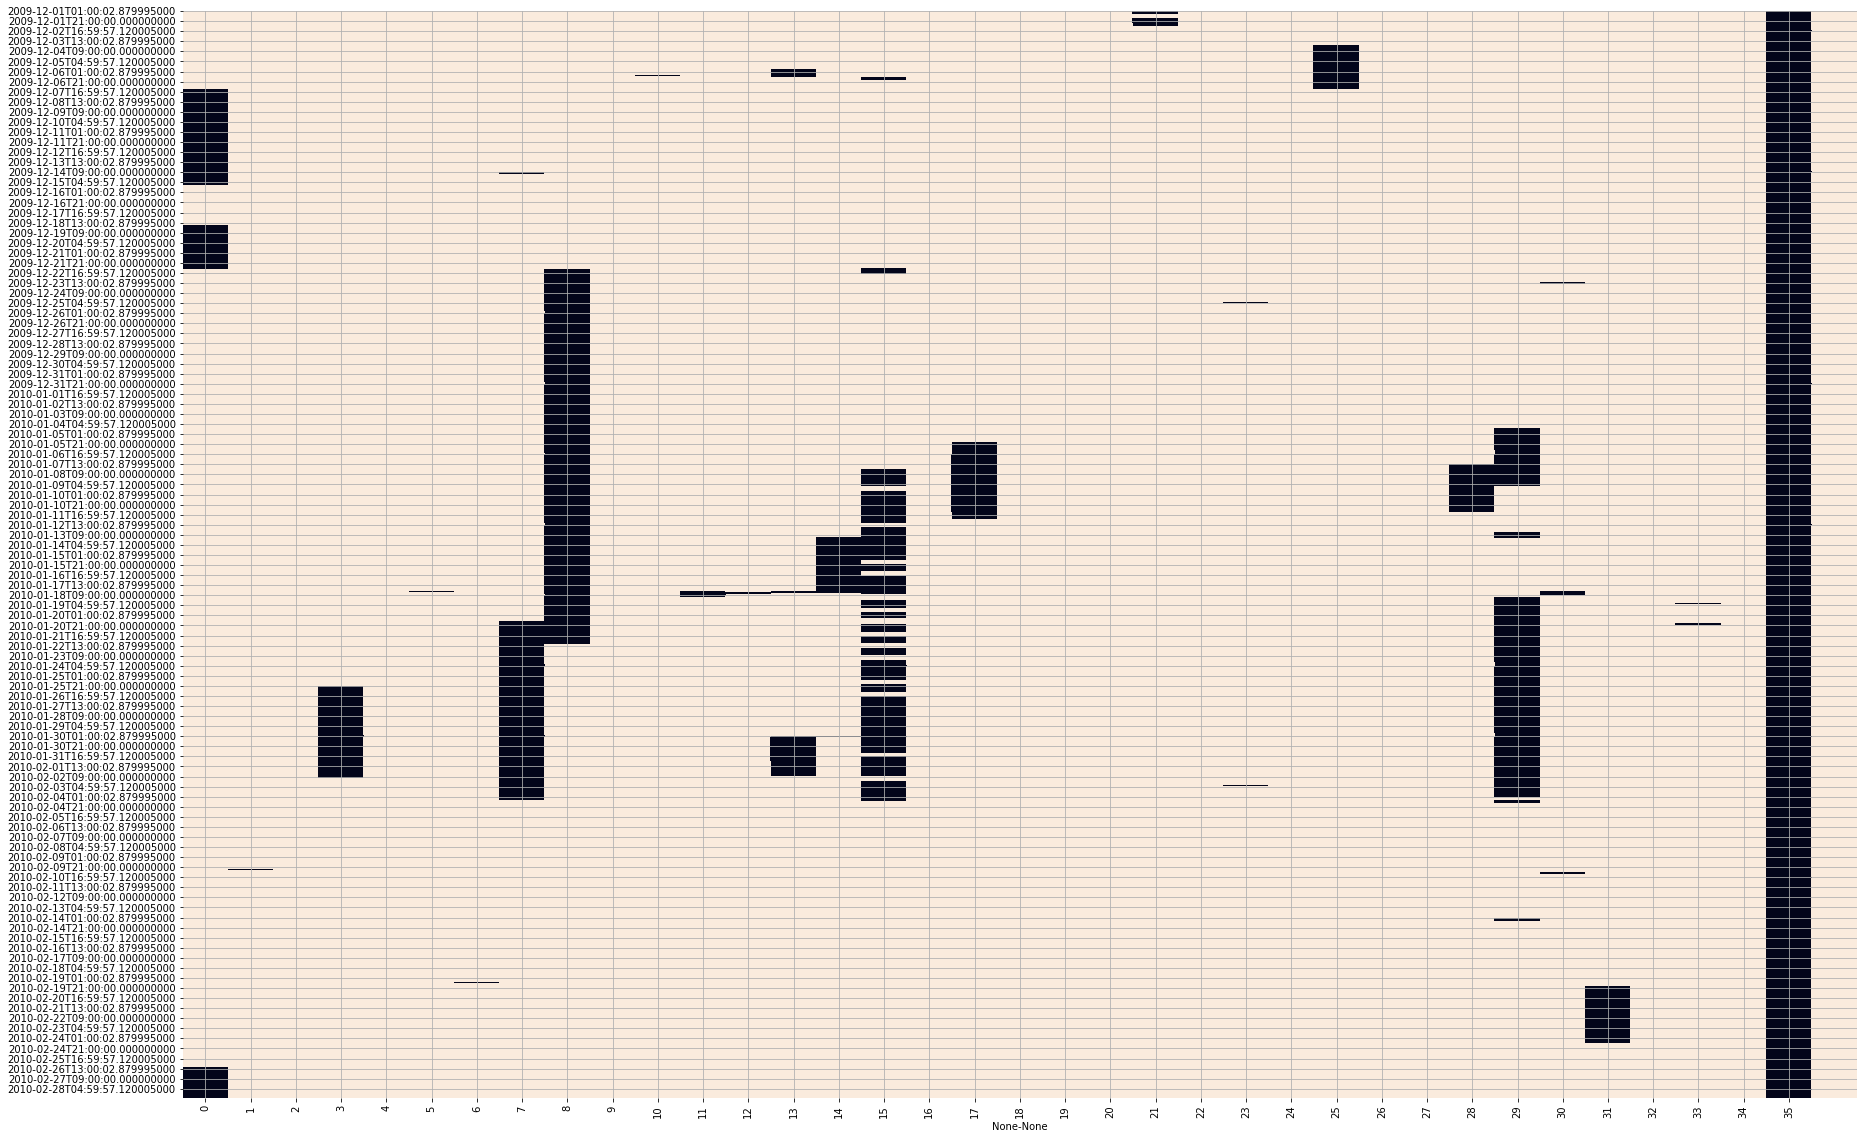

In [64]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

**Summer Data**

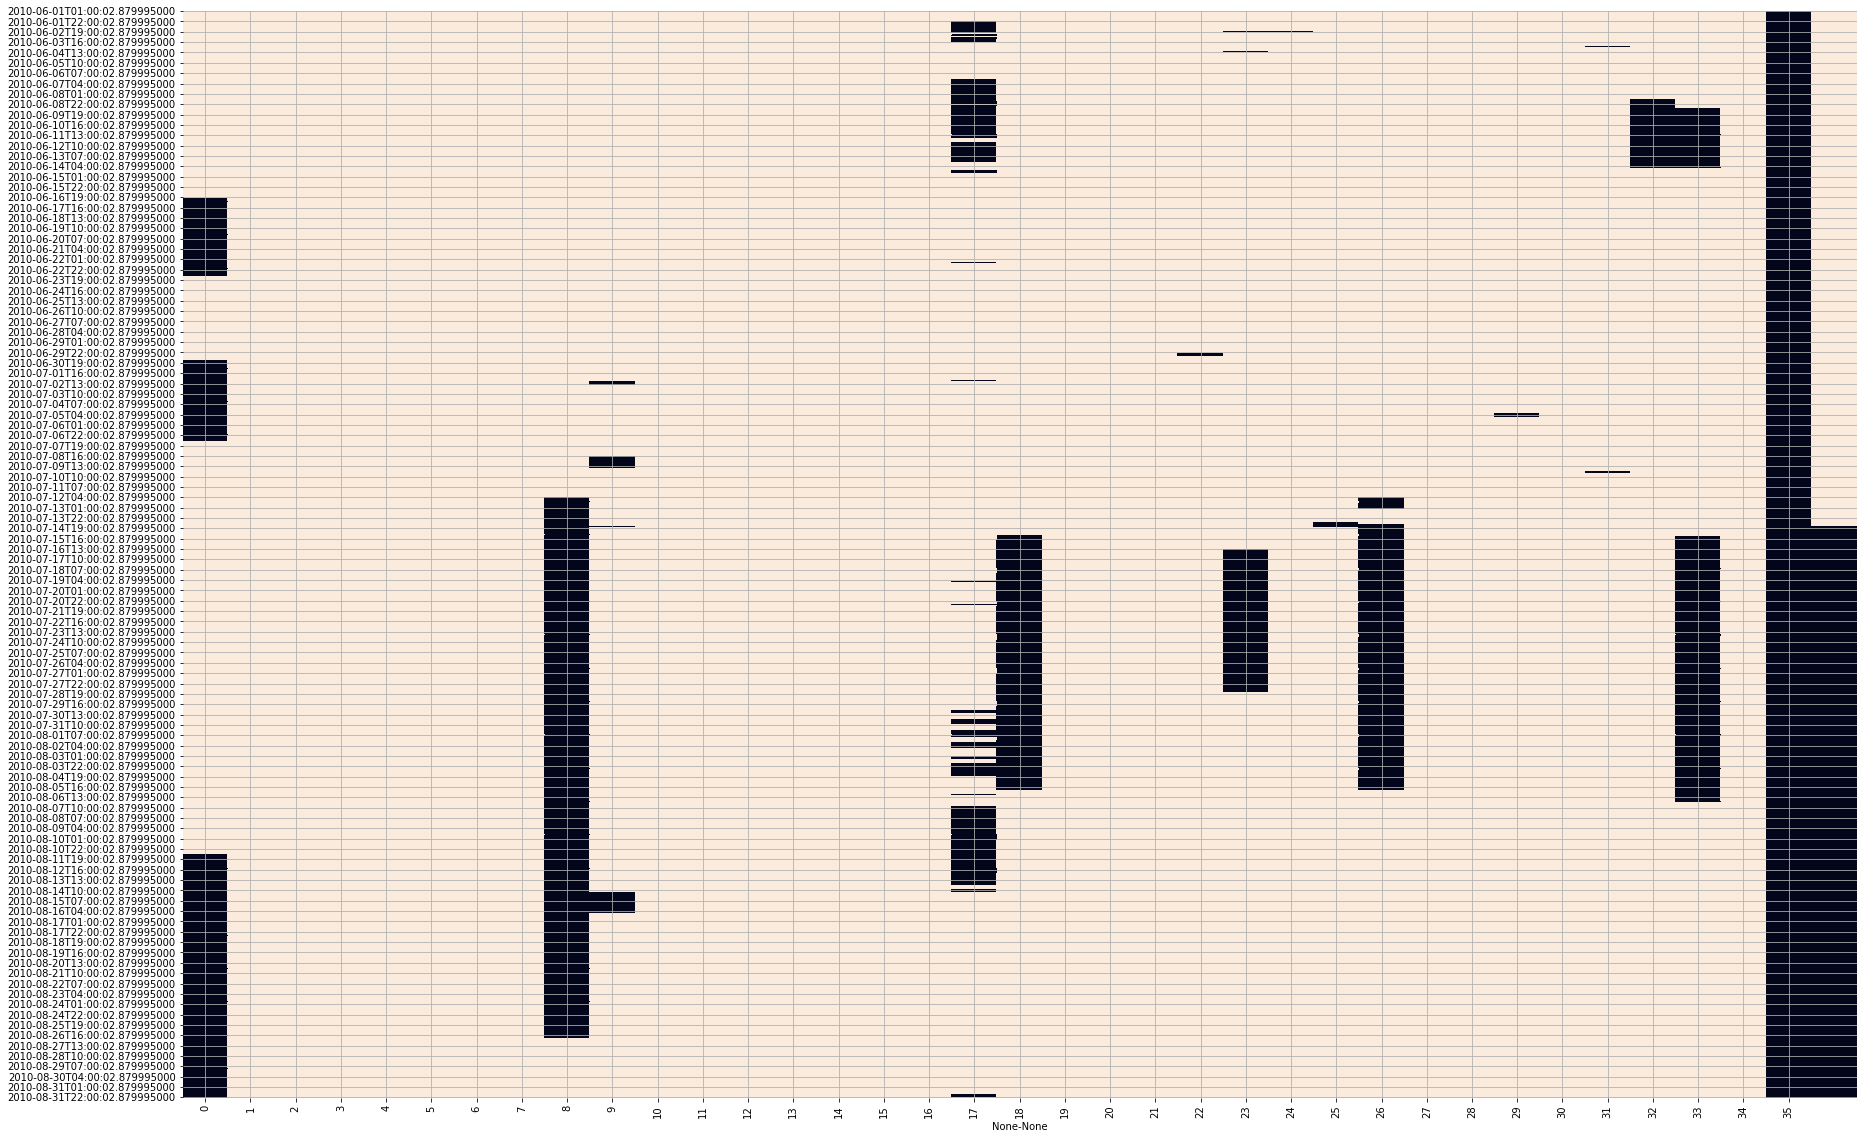

In [65]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_data.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Remove the Stations with Lots of Missing Data and Interpolate the Others

In [66]:
winter_removed = [0,3,7,8,13,14,15,17,18,21,25,28,29,31,35]
summer_removed = [0,8,9,17,18,23,26,32,33,35,36]

winter_filt = winter_data.drop(winter_data.columns[winter_removed],axis=1)
summer_filt = summer_data.drop(summer_data.columns[summer_removed],axis=1)

Plot the new missing data.

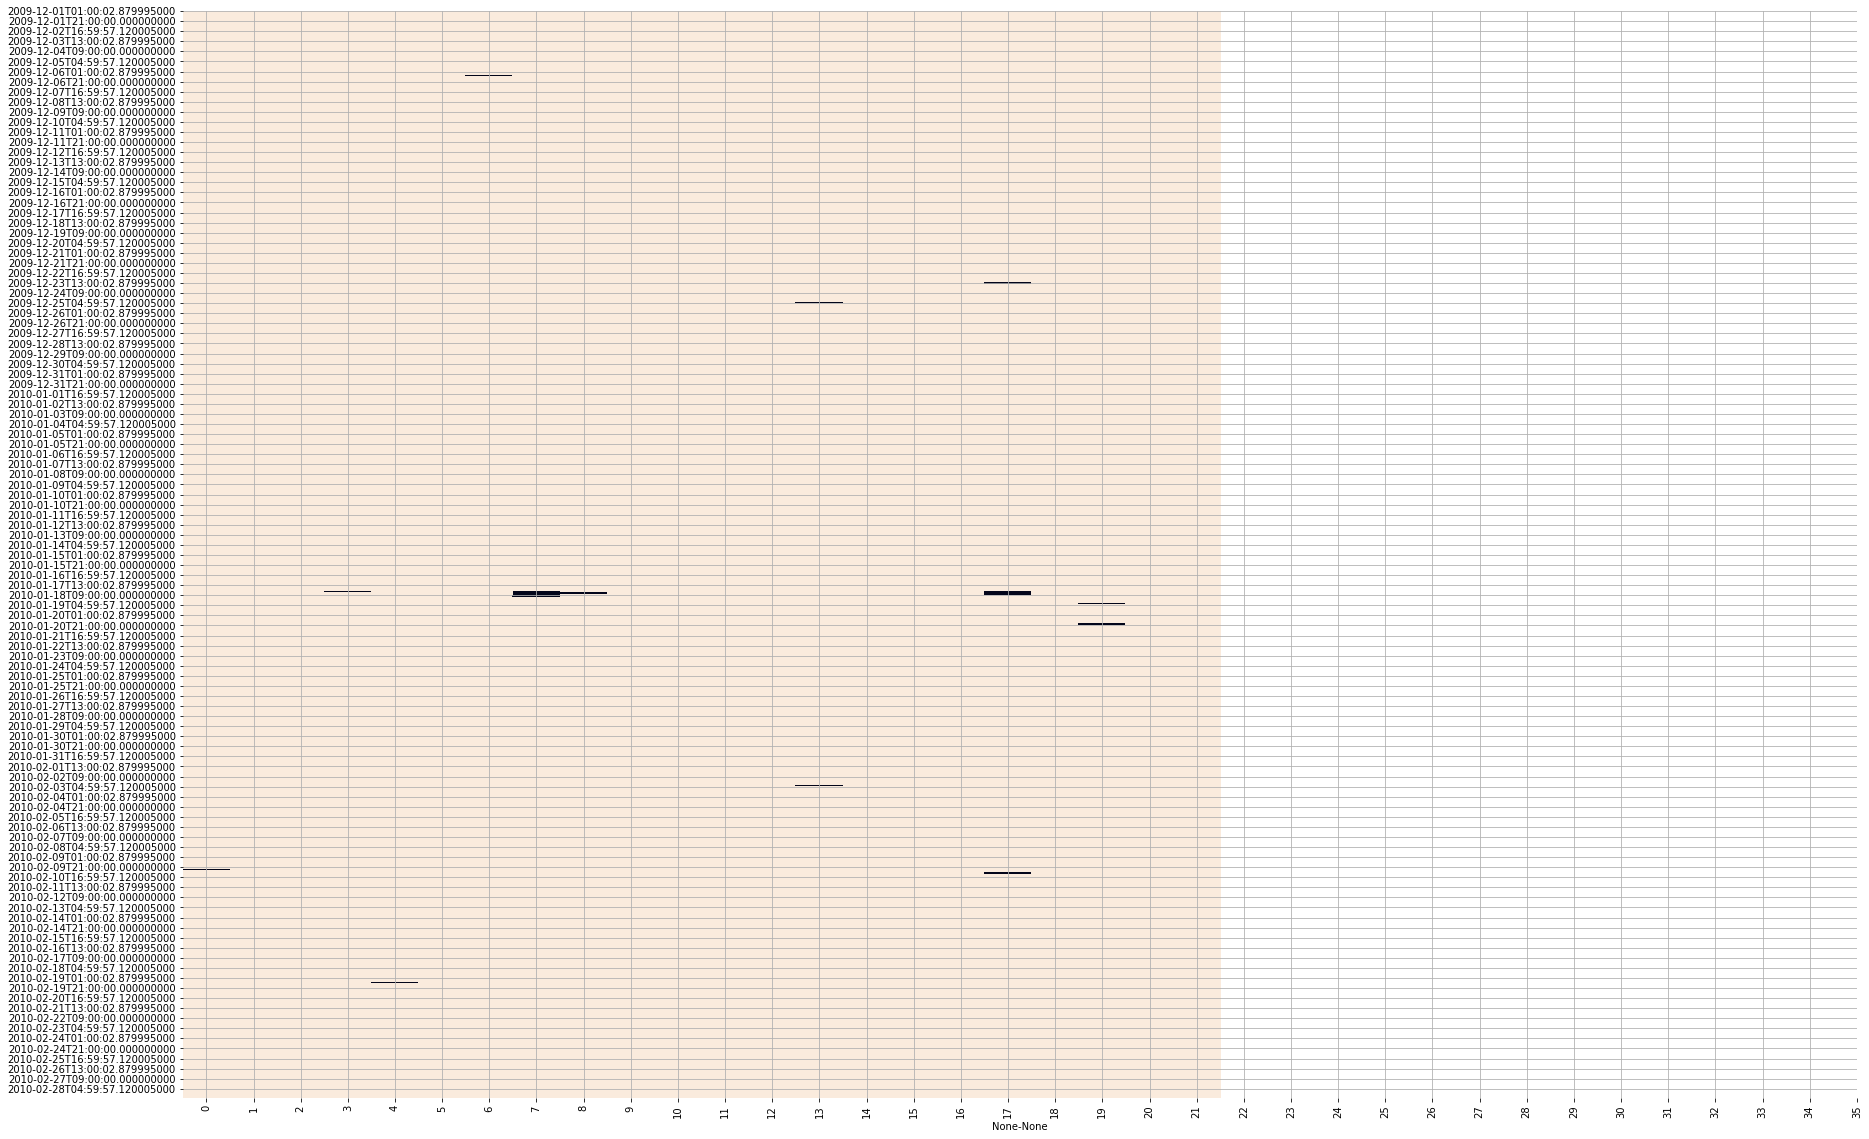

In [67]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~winter_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

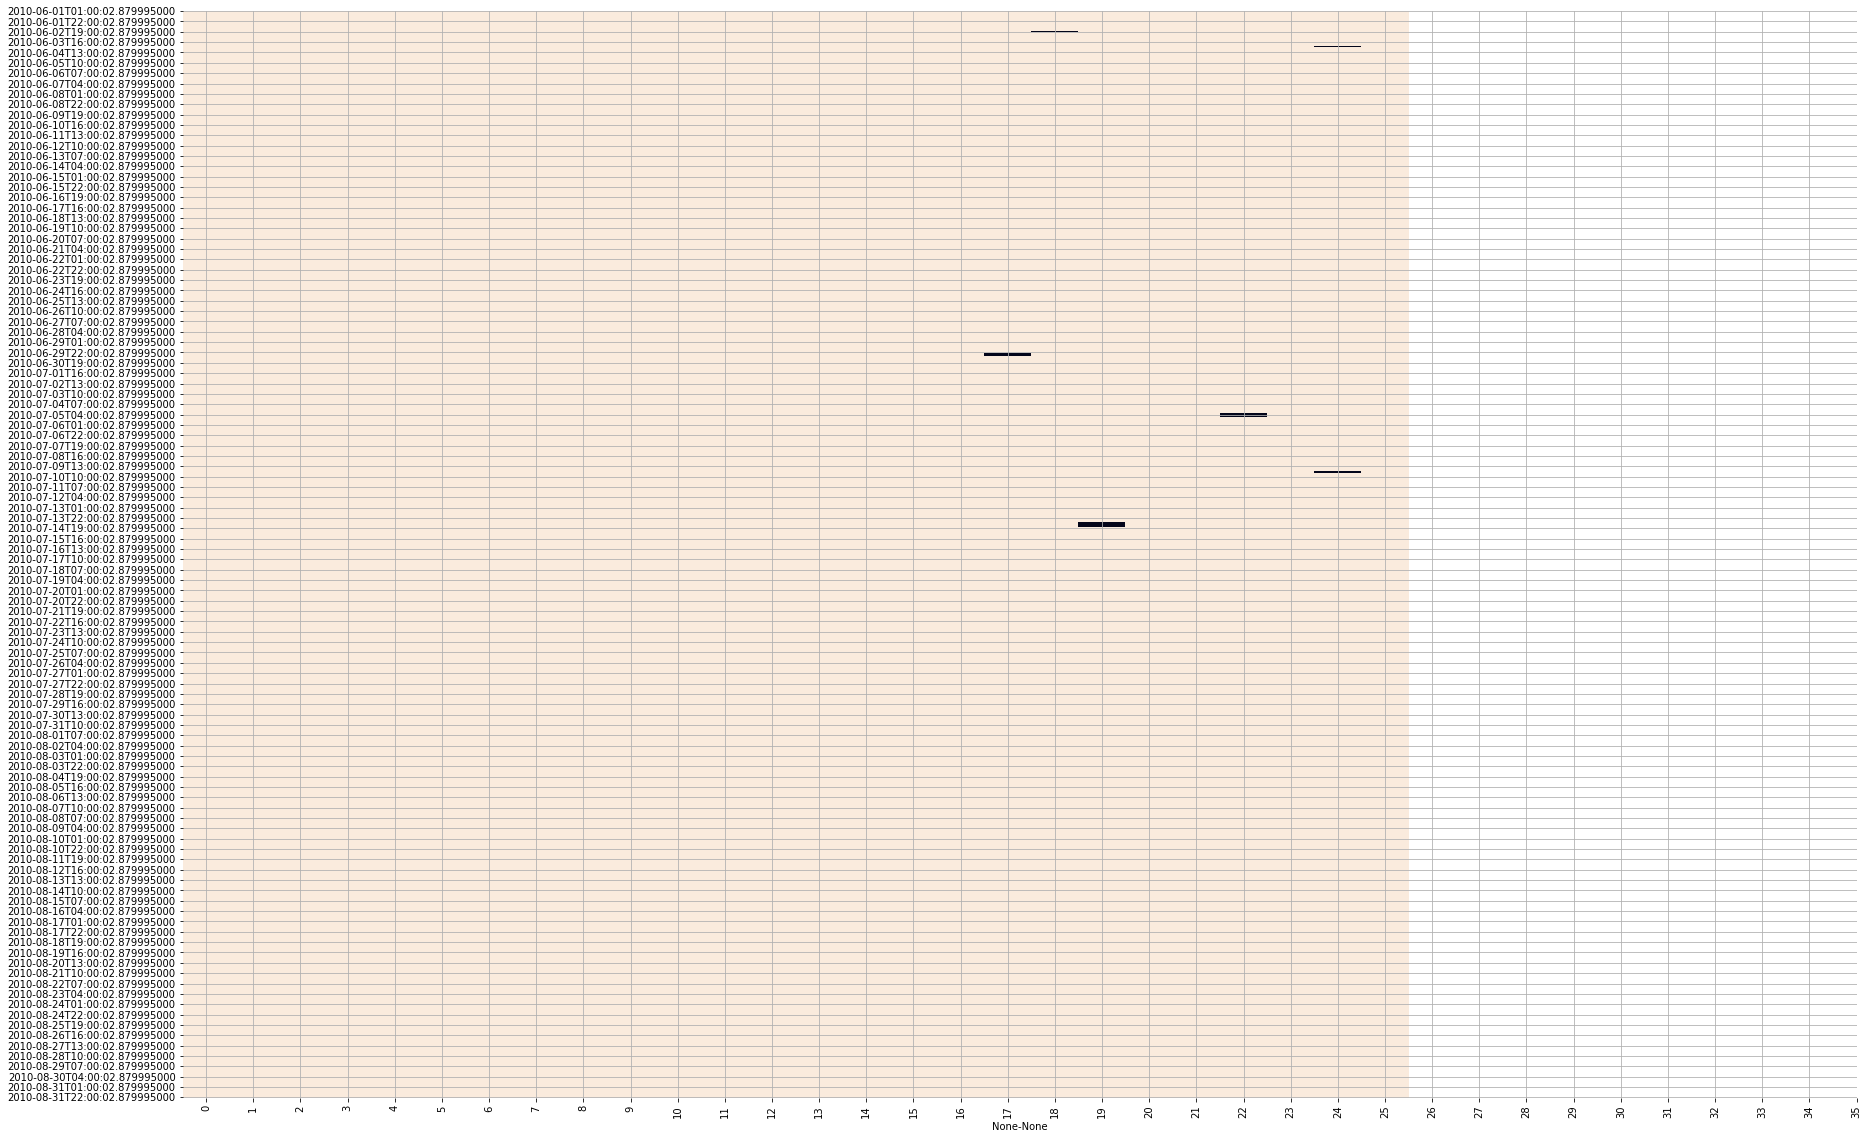

In [68]:
fig, ax = plt.subplots(figsize=(30, 20))

sns.heatmap(~summer_filt.isnull(), cbar=False, ax=ax)
ax.grid()
plt.xticks(np.arange(36)+0.5, np.arange(0, 36, 1))

plt.show()

## Now Interpolate the DataFrames

In [69]:
winter_df = winter_filt.interpolate(method='cubic', axis=0)
summer_df = summer_filt.interpolate(method='cubic', axis=0)

## Save to CSV File

In [70]:
winter_df.to_pickle('Dataframes/winter_2010.pkl')
summer_df.to_pickle('Dataframes/summer_2010.pkl')